In [2]:
# Standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [4]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
# Load dataset
df = pd.read_excel('Dry_Bean_Dataset2025.xlsx', sheet_name=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13610 non-null  float64
 9   Solidity         13610 non-null  float64
 10  roundness        13607 non-null  float64
 11  Compactness      13609 non-null  object 
 12  ShapeFactor1     13609 non-null  float64
 13  ShapeFactor2     13608 non-null  float64
 14  ShapeFactor3     13610 non-null  object 
 15  ShapeFactor4     13611 non-null  float64
 16  ShapeFactor5     13611 non-null  float64
 17  Class       

In [15]:
df.shape

(13611, 20)

In [16]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13610.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.750318   
std        0.246678      0.092002   29774.915817      59.177120      0.084552   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718633   
50%        1.551124      0.764441   45178.000000     238.438026      0.759853   
75%        1.707109      0.810466   62294.000000     279.446467      0.786861   
max        2.430306      0.911423  263261.000000     569.374358      8.781243   

           Solidity     roundness  ShapeFactor1  ShapeFactor2  ShapeFactor4  \
count  13610.000000  13607.000000  13609.000000  13608.000000  13611.000000   
mean       0.987142      0.873267      0.006564      0.001716      0.995063   
std        0.004660      0.059511      0.001128      0.000596      0.004366   
min        0.919246      0.489618      0.002778      0.000564      0.947687   
25%        0.985670      0.832096      0.005900      0.001153      0.993703   
50%        0.988283      0.883137      0.006646      0.001694      0.996386   
75%        0.990013      0.916856      0.007272      0.002170      0.997883   
max        0.994677      0.990685      0.010451      0.003665      0.999733   

       ShapeFactor5  ShapeFactor5.1  
count  13611.000000         13611.0  
mean       1.990127             0.0  
std        0.008733             0.0  
min        1.895375             0.0  
25%        1.987406             0.0  
50%        1.992772             0.0  
75%        1.995765             0.0  
max        1.999465             0.0

Phân tích mối tương quan giữa các cột số trong một DataFrame

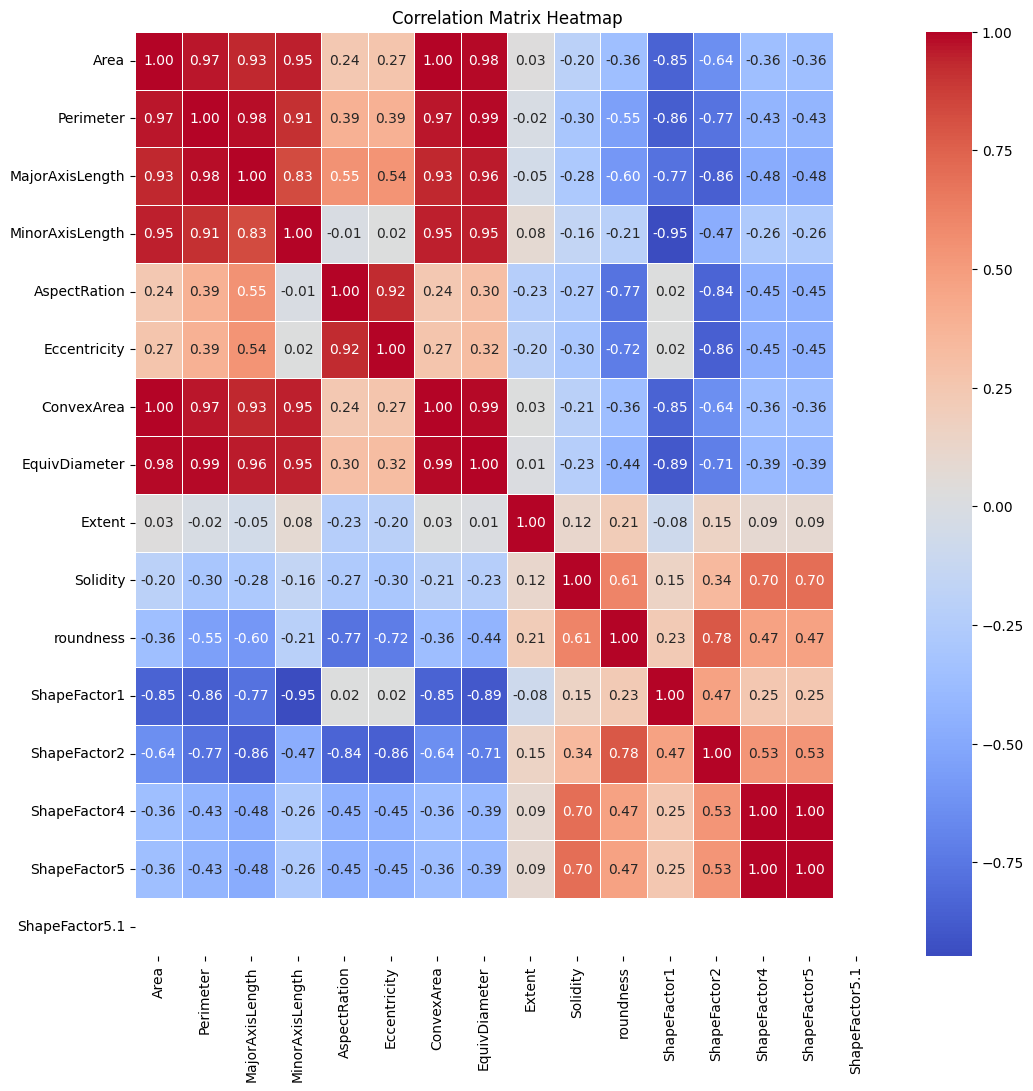

In [17]:
# Select only numeric columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Tìm cặp biến số có tương quan Pearson cao nhất (trên 0.9) để kiểm tra hiện tượng đa cộng tuyến hoặc mối quan hệ mạnh giữa các đặc trưng.
Các bước thực hiện
- Lọc cột số: Giữ lại các cột kiểu float64 và int64.
- Tính ma trận tương quan: Dùng hệ số tương quan Pearson giữa các cột số.
- Lọc cặp có tương quan cao: Chỉ giữ các cặp có correlation > 0.9 nhưng < 1 (loại trừ tự tương quan).
- Sắp xếp và chọn cặp mạnh nhất: Sắp xếp theo độ lớn tương quan giảm dần và chọn cặp đầu tiên.
- Hiển thị kết quả: In tên hai biến và giá trị tương quan.
- Vẽ biểu đồ KDE: Trực quan hóa phân phối của hai biến để xem chúng có hình dạng tương tự không


Most highly correlated feature pair: Area & ConvexArea (correlation = 1.00)


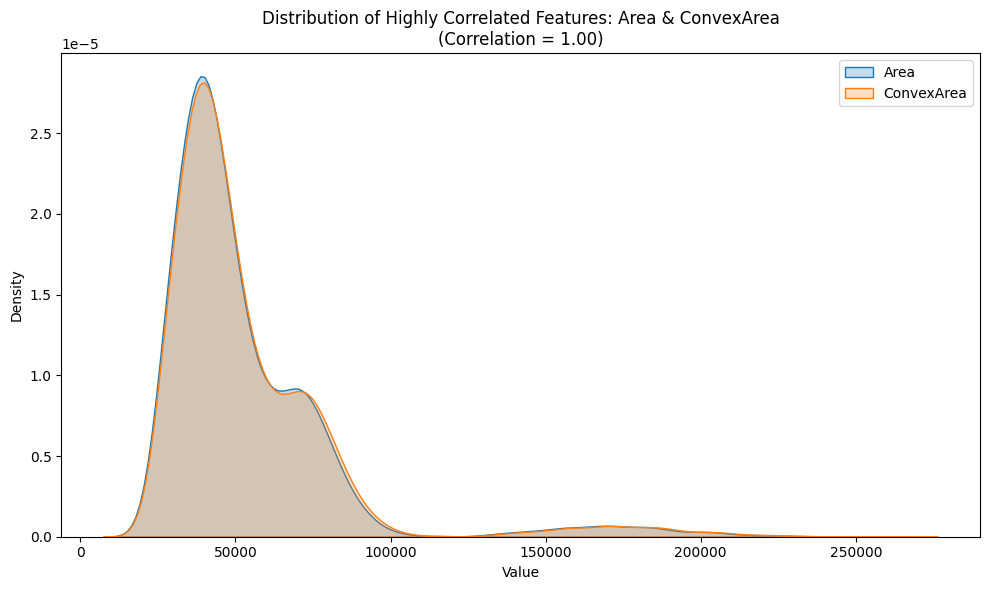

In [18]:
# Select only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute Pearson correlation
corr_matrix = numeric_df.corr()

# High correlation threshold
threshold = 0.9

# Find pairs of features with high correlation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold and abs(corr_val) < 1:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

# Sort pairs by highest correlation
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)

# Display the top 1 most correlated feature pair
if high_corr_pairs:
    feat1, feat2, corr_val = high_corr_pairs[0]
    print(f"Most highly correlated feature pair: {feat1} & {feat2} (correlation = {corr_val:.2f})")

    # Plot distribution (KDE)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(numeric_df[feat1], label=feat1, fill=True)
    sns.kdeplot(numeric_df[feat2], label=feat2, fill=True)
    plt.title(f'Distribution of Highly Correlated Features: {feat1} & {feat2}\n(Correlation = {corr_val:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("No feature pairs with correlation > 0.9 found")

In [22]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

np.int64(0)

In [21]:
df_unique = df.drop_duplicates()
df_unique

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

      Compactness  ShapeFactor1  ShapeFactor2 ShapeFactor3  ShapeFactor4  \
0        0.913358      0.007332      0.003147     0.834222      0.998724   
1        0.953861      0.006979      0.003564     0.909851      0.998430   
2        0.908774      0.007244      0.003048     0.825871      0.999066   
3        0.928329      0.007017      0.003215     0.861794      0.994199   
4        0.970516      0.006697      0.003665       0.9419      0.999166   
...           ...           ...           ...          ...           ...   
13606    0.801865      0.006858      0.001749     0.642988      0.998385   
13607    0.822252      0.006688      0.001886     0.676099      0.998219   
13608     0.82273      0.006681      0.001888     0.676884      0.996767   
13609    0.817457      0.006724      0.001852     0.668237      0.995222   
13610    0.784997      0.007001      0.001640     0.616221      0.998180   

       ShapeFactor5     Class  ShapeFactor5.1    Name  
0          1.997448     SEKER               0      B1  
1          1.996861     SEKER               0      B2  
2          1.998132     SEKER               0      B3  
3          1.988398     SEKER               0      B4  
4          1.998332     SEKER               0      B5  
...             ...       ...             ...     ...  
13606      1.996770  DERMASON               0  B13607  
13607      1.996437  DERMASON               0  B13608  
13608      1.993535  DERMASON               0  B13609  
13609      1.990445  DERMASON               0  B13610  
13610      1.996359  DERMASON               0  B13611  

[13611 rows x 20 columns]

Phân phối dữ liệu của từng biến số (numeric feature) — xem dữ liệu có lệch, chuẩn, hay phân bố bất thường.
Các bước chính
- Lọc cột số: Chỉ chọn các cột kiểu float64 và int64.
- Loại bỏ dòng NaN: Tránh lỗi khi vẽ biểu đồ.
- Tính số lượng cột: Để xác định số hàng và cột cho biểu đồ con (subplot).
- Vẽ biểu đồ: Dùng sns.histplot để vẽ histogram + KDE cho từng biến số.
- Xử lý lỗi: Nếu có lỗi khi vẽ, hiển thị thông báo trong biểu đồ và in lỗi ra console.


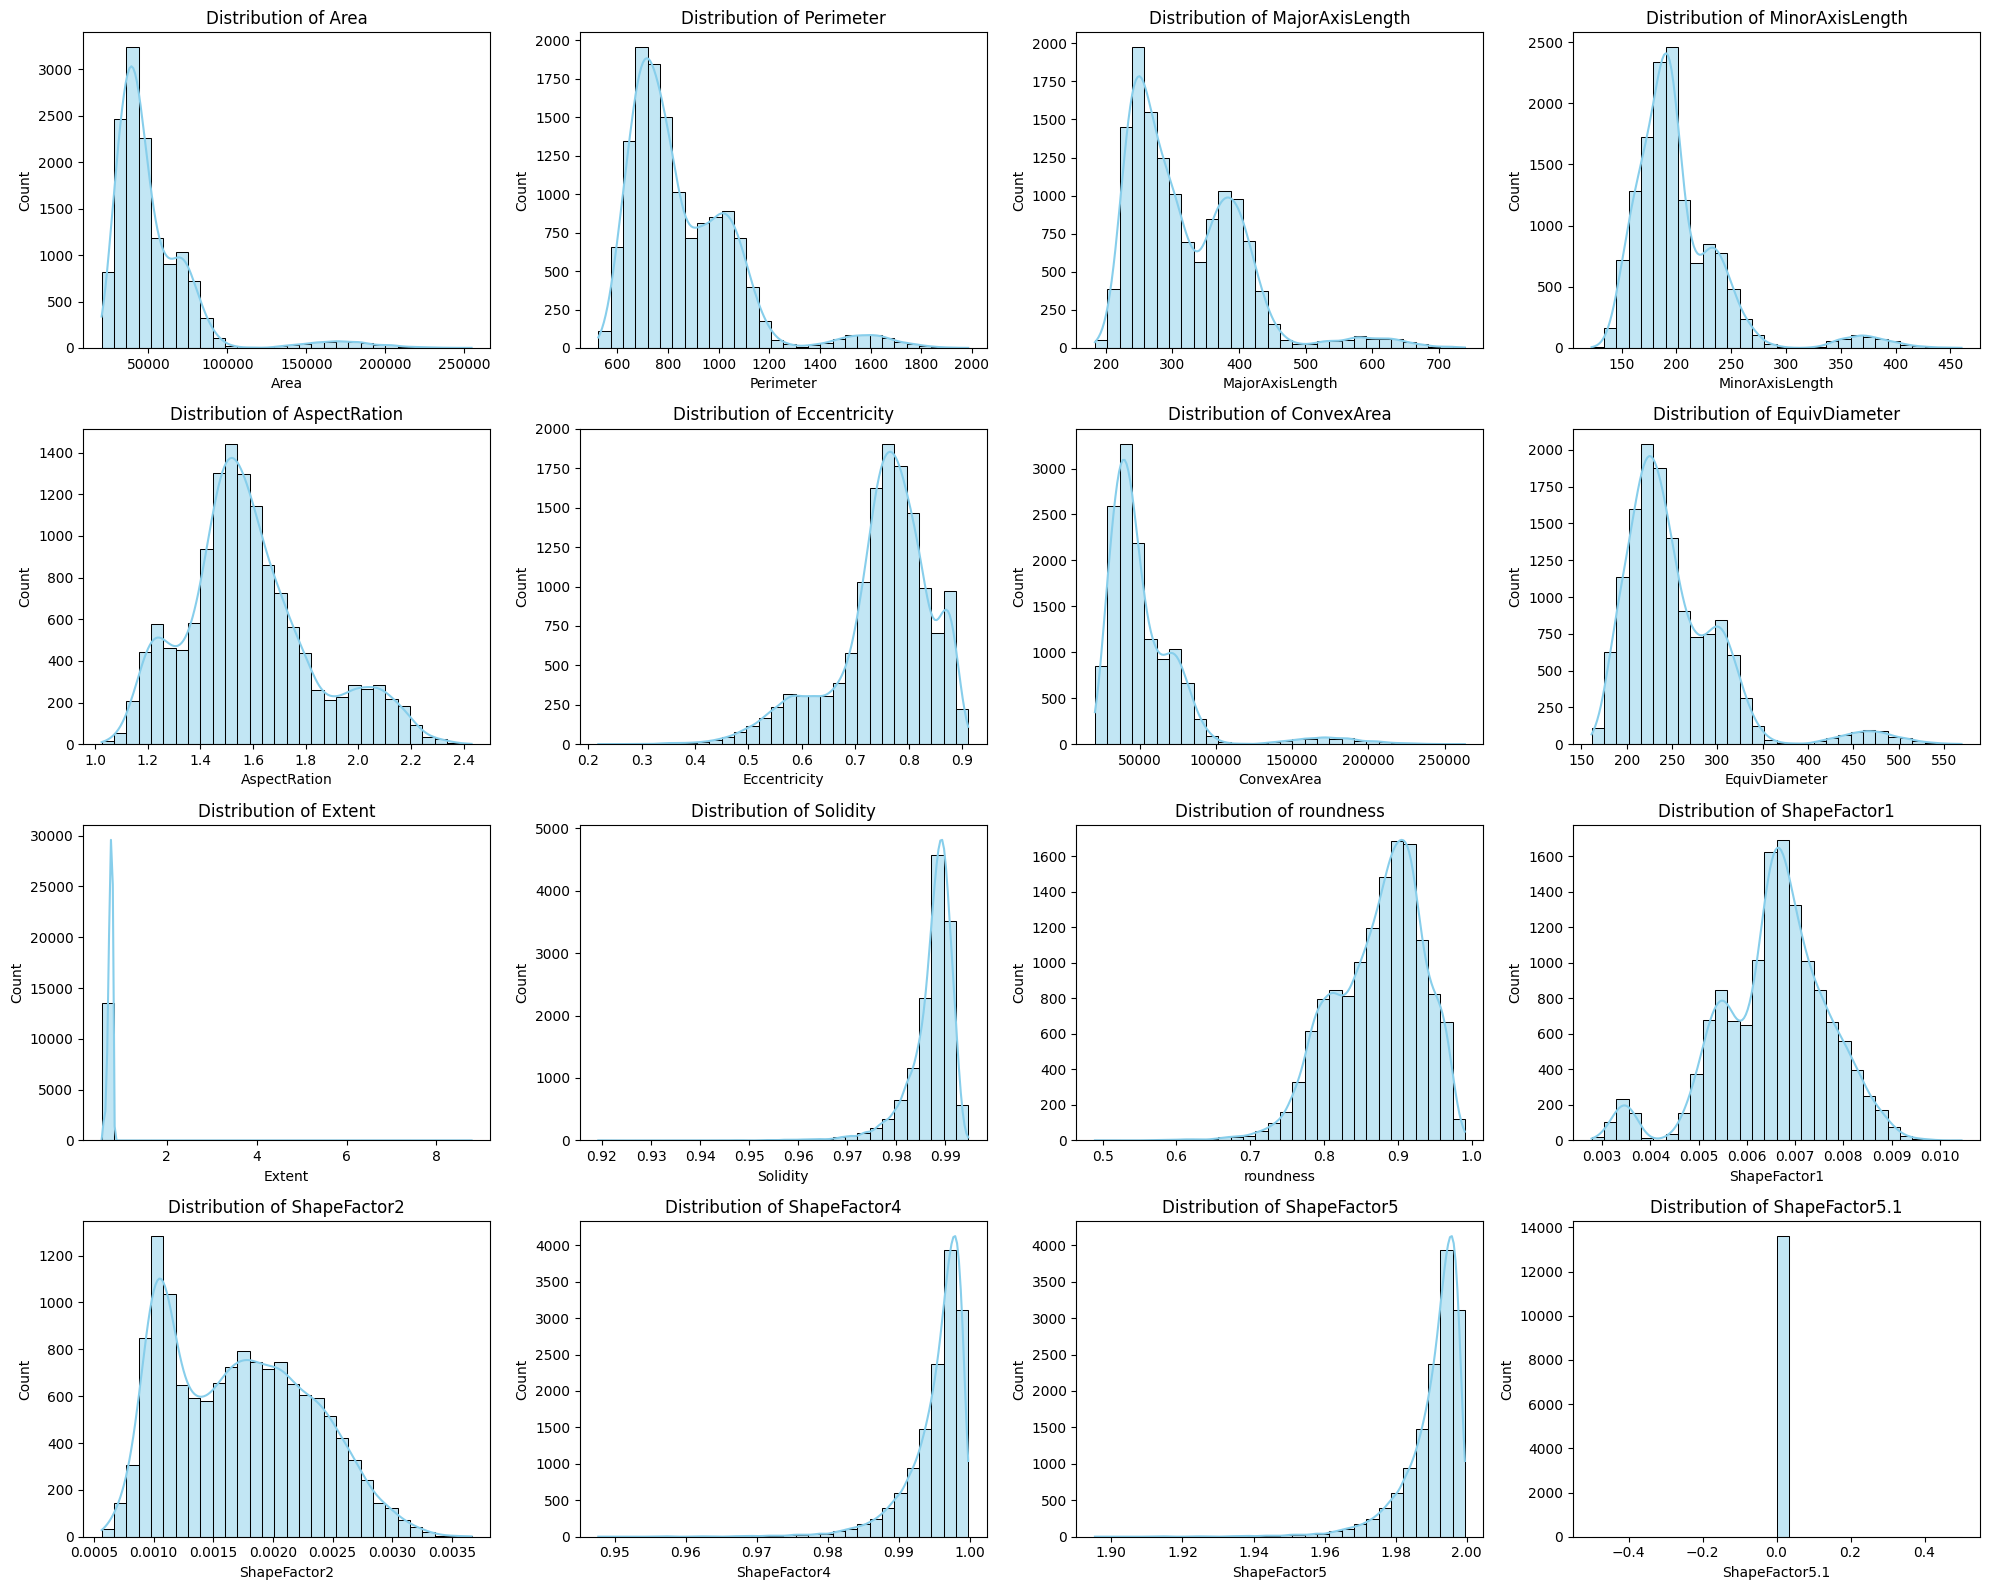

In [23]:
# Select numeric features
numeric_features = df_unique.select_dtypes(include=['float64', 'int64']).columns

# Drop NaN rows from numeric features to avoid errors
df_numeric = df_unique[numeric_features].dropna()

# Count the number of columns
n_features = len(numeric_features)

# Determine the number of rows and columns for subplots
n_cols = 4
n_rows = int(np.ceil(n_features / n_cols))

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, col in enumerate(numeric_features):
    plt.subplot(n_rows, n_cols, i + 1)
    try:
        sns.histplot(df_numeric[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
    except Exception as e:
        plt.text(0.5, 0.5, f'Error plotting {col}', ha='center')
        print(f'Error plotting {col}: {e}')

plt.tight_layout()
plt.show()

Phát hiện và trực quan hóa các giá trị ngoại lai (outliers)


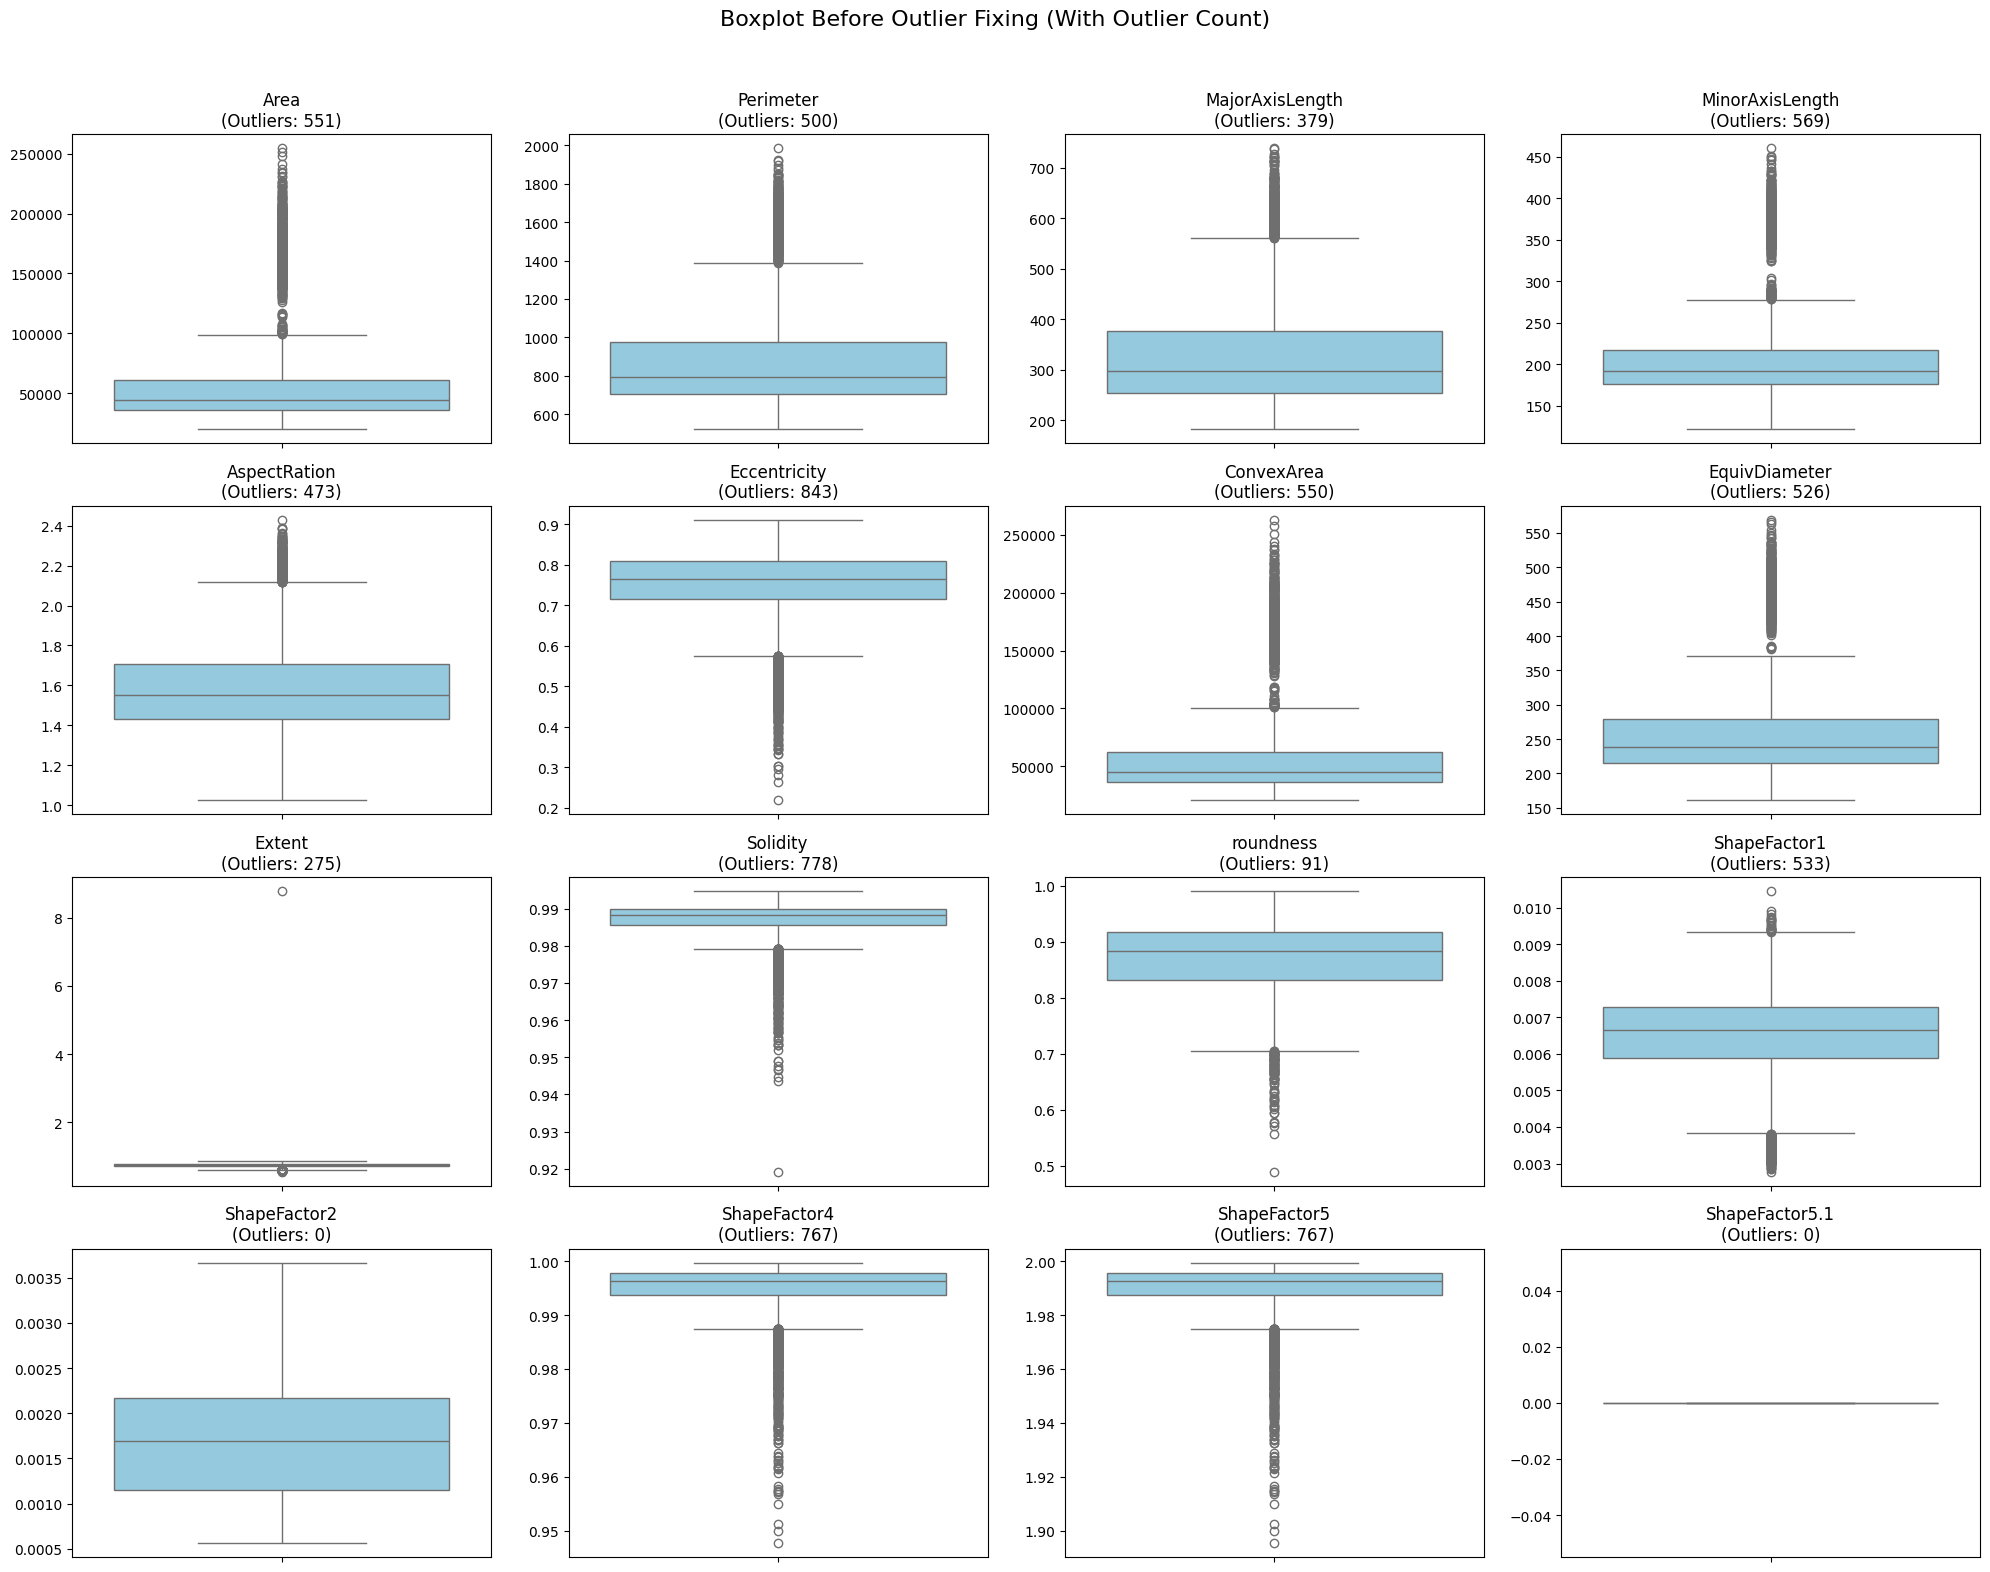

In [24]:
# Select only numeric columns
columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of subplots needed
n_features = len(columns)
n_cols = 4  # number of columns per row
n_rows = math.ceil(n_features / n_cols)

# Set overall figure size
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop to create boxplots and count outliers
for i, col in enumerate(columns):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"{col}\n(Outliers: {num_outliers})")
    plt.xlabel('')
    plt.ylabel('')

plt.suptitle("Boxplot Before Outlier Fixing (With Outlier Count)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

So sánh phân phối của các biến số theo từng lớp (class) trong tập dữ liệu, kiểm tra xem các đặc trưng số có phân phối khác nhau giữa các lớp hay không ?
Các bước chính
- Xác định biến mục tiêu: Đặt tên cột phân loại là 'Class'.
- Lọc các cột số: Chỉ chọn các cột kiểu float64 và int64.
- Tính số lượng biểu đồ con: Dựa vào số lượng biến số để chia thành nhiều hàng và cột.
- Vẽ biểu đồ hộp: Với mỗi biến số, vẽ boxplot phân theo lớp (Class) để thấy sự khác biệt về phân phối, trung vị, và outlier giữa các lớp.

C:\Users\Nguyen Thi Tra My\AppData\Local\Temp\ipykernel_15080\1890246042.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
C:\Users\Nguyen Thi Tra My\AppData\Local\Temp\ipykernel_15080\1890246042.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
C:\Users\Nguyen Thi Tra My\AppData\Local\Temp\ipykernel_15080\1890246042.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
C:\Users\Nguyen Thi Tra My\AppD

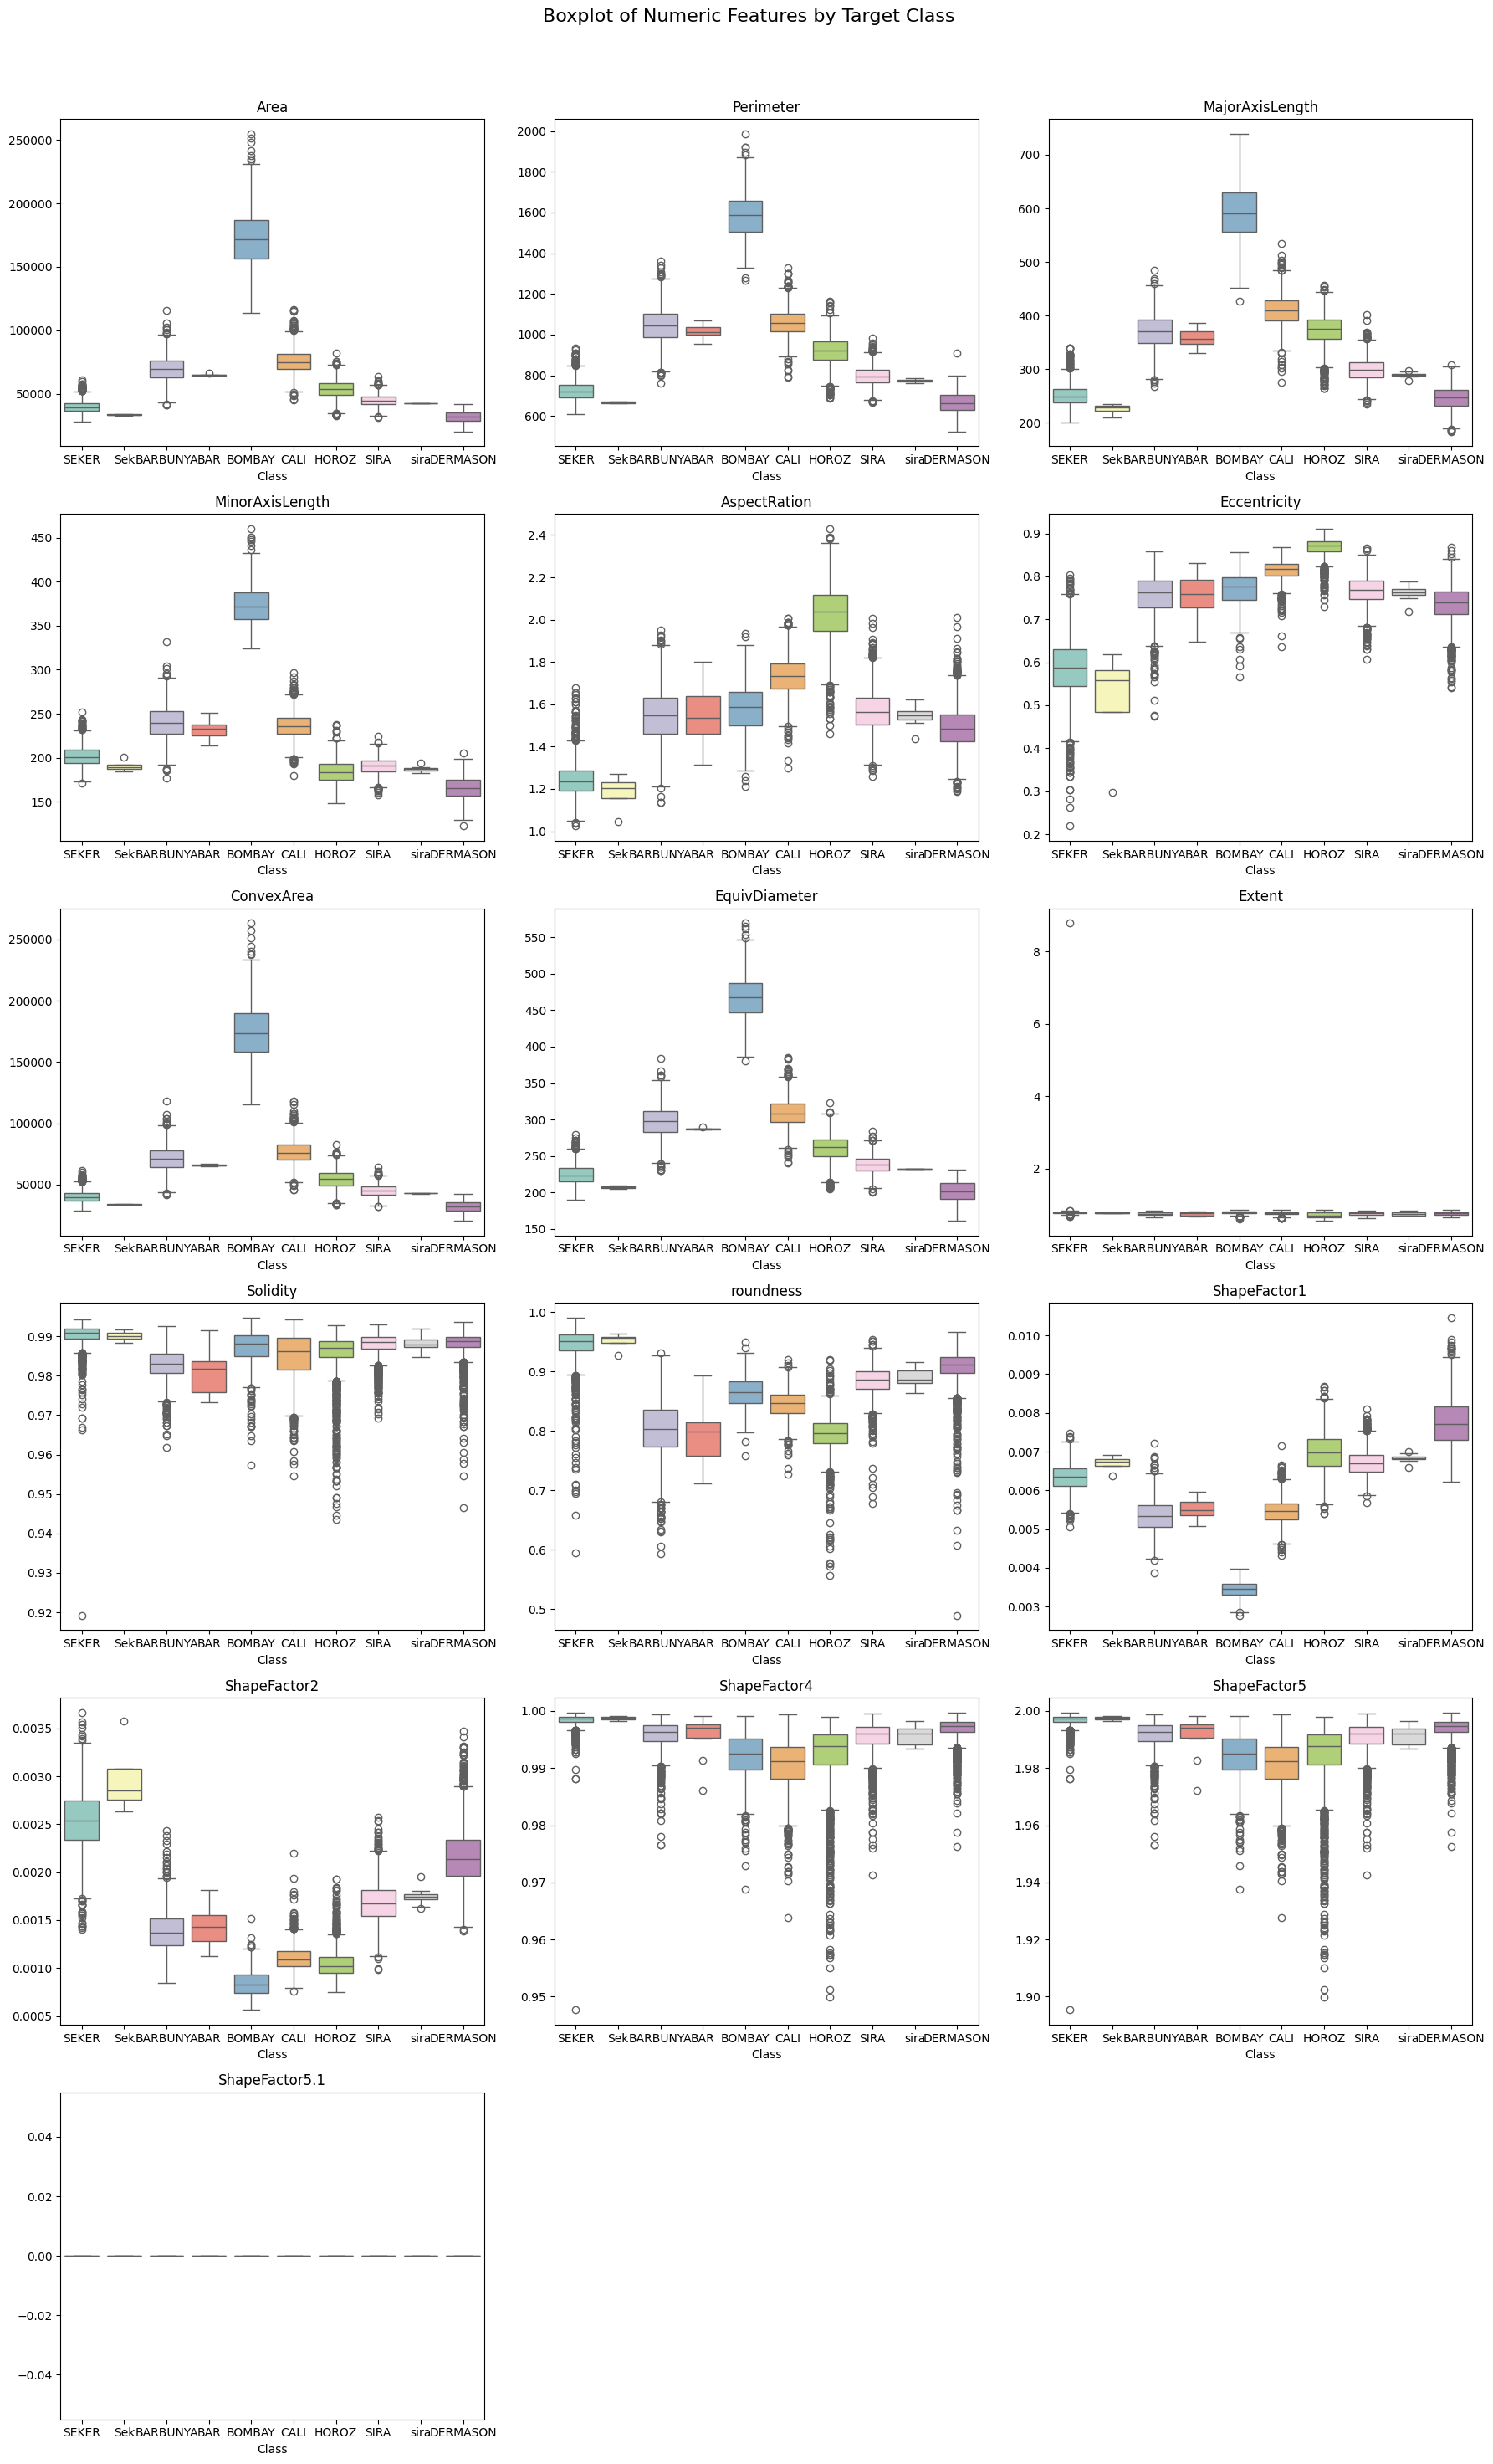

In [25]:
# Make sure the target variable is named 'Class' (adjust if different)
target_col = 'Class'  # change this to match the target column name in your dataset

# Select only numeric features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of subplots (e.g., 3 columns per row)
n_features = len(numeric_cols)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

# Create figure
plt.figure(figsize=(n_cols * 6, n_rows * 5))
plt.suptitle("Boxplot of Numeric Features by Target Class", fontsize=16)

# Loop through each feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=target_col, y=col, data=df, palette="Set3")
    plt.title(col)
    plt.xlabel("Class")
    plt.ylabel("")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Phân tích mối tương quan giữa các cặp biến số trong DataFrame và trực quan hóa phân phối của từng biến trong cặp bằng biểu đồ hộp
Các bước chính
- Lọc các cột số: Chỉ giữ lại các cột kiểu float64 và int64.
- Tính ma trận tương quan Pearson: Đo mức độ liên hệ tuyến tính giữa các cột số.
- Tạo danh sách cặp biến duy nhất: Tránh lặp lại và loại bỏ tự tương quan.
- Sắp xếp theo độ tương quan giảm dần: Ưu tiên các cặp có tương quan mạnh nhất.
- Vẽ biểu đồ hộp cho từng cặp:
- Mỗi cặp được vẽ song song để dễ so sánh.
- Tiêu đề hiển thị tên biến và hệ số tương quan r.


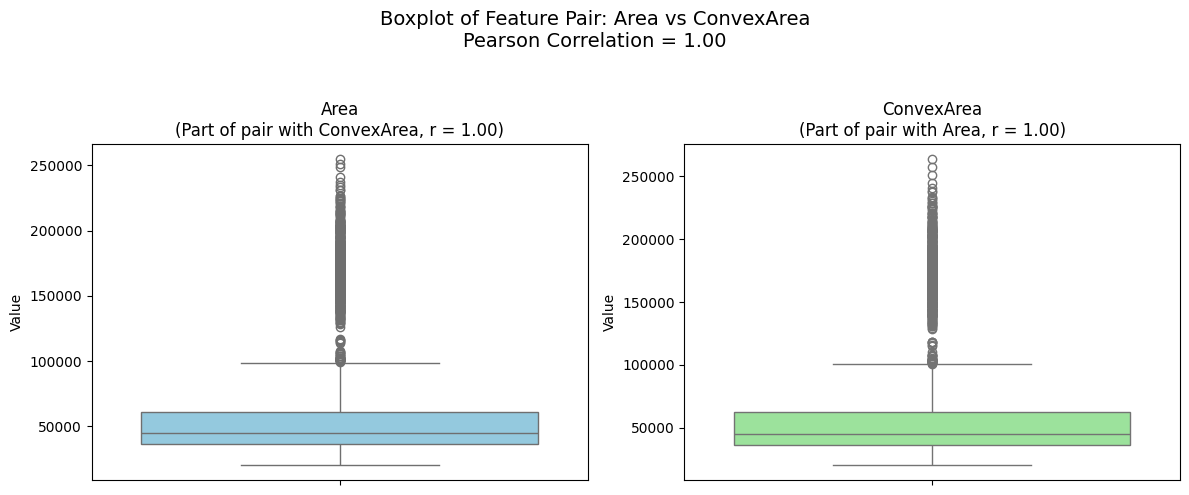

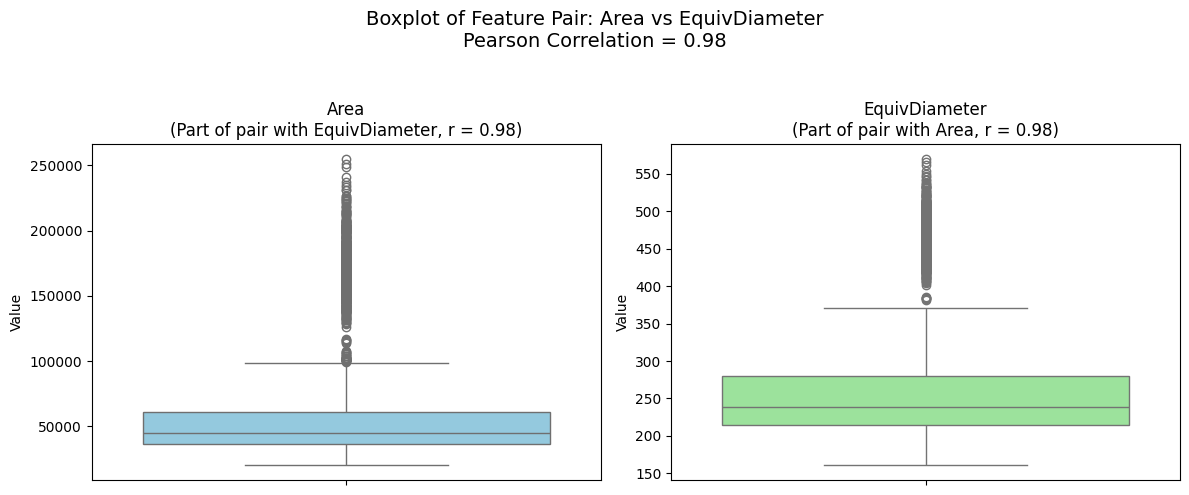

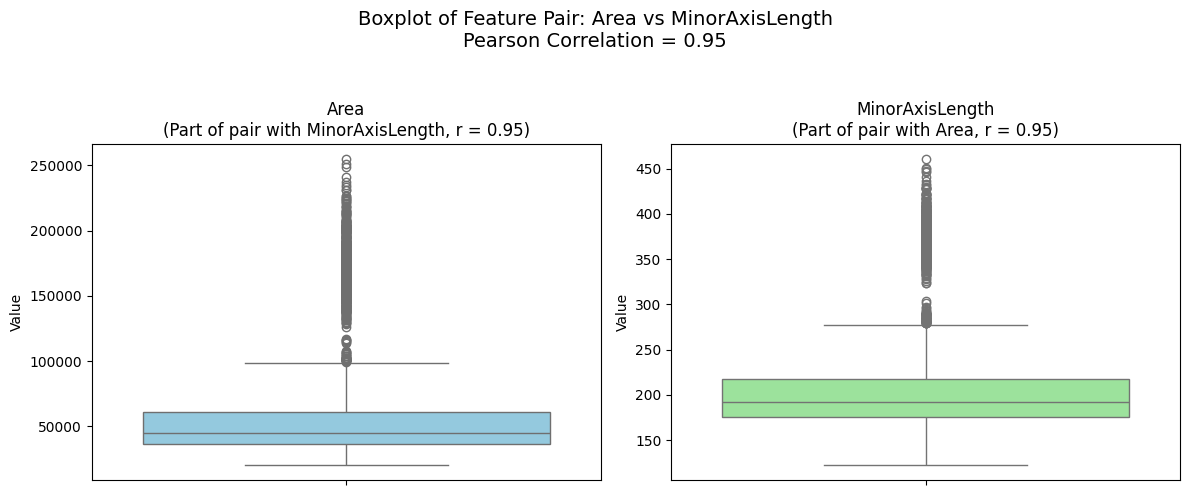

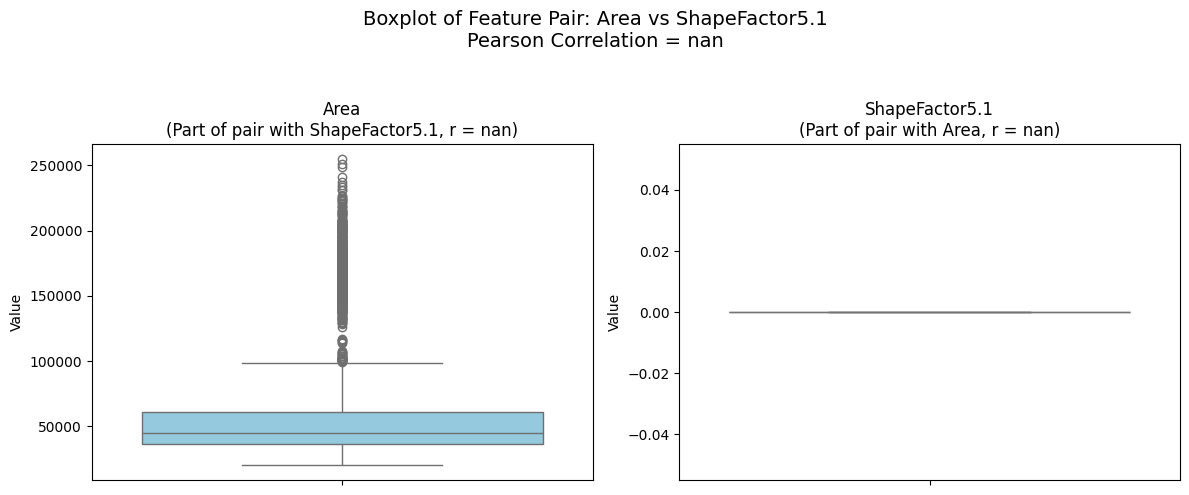

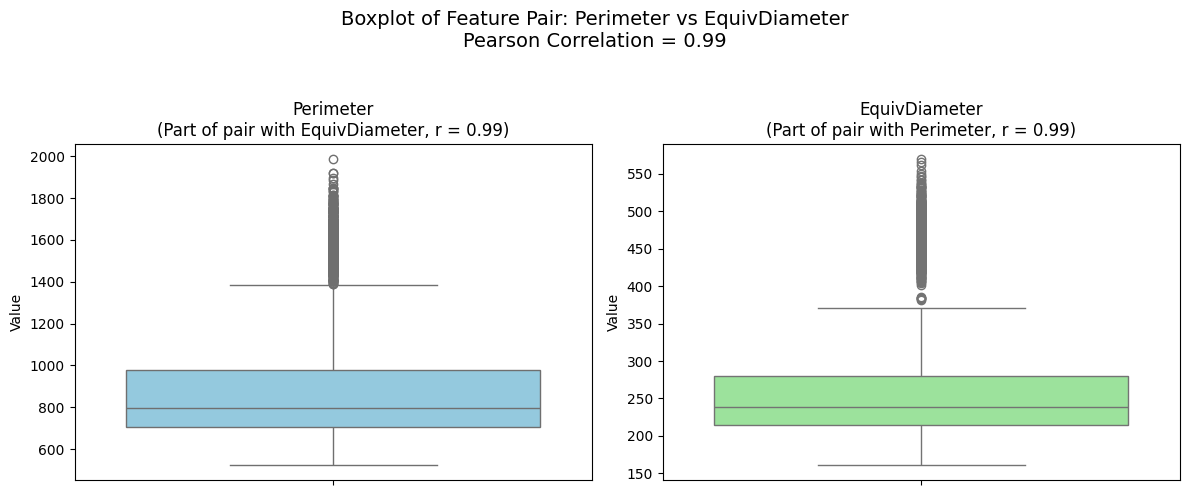

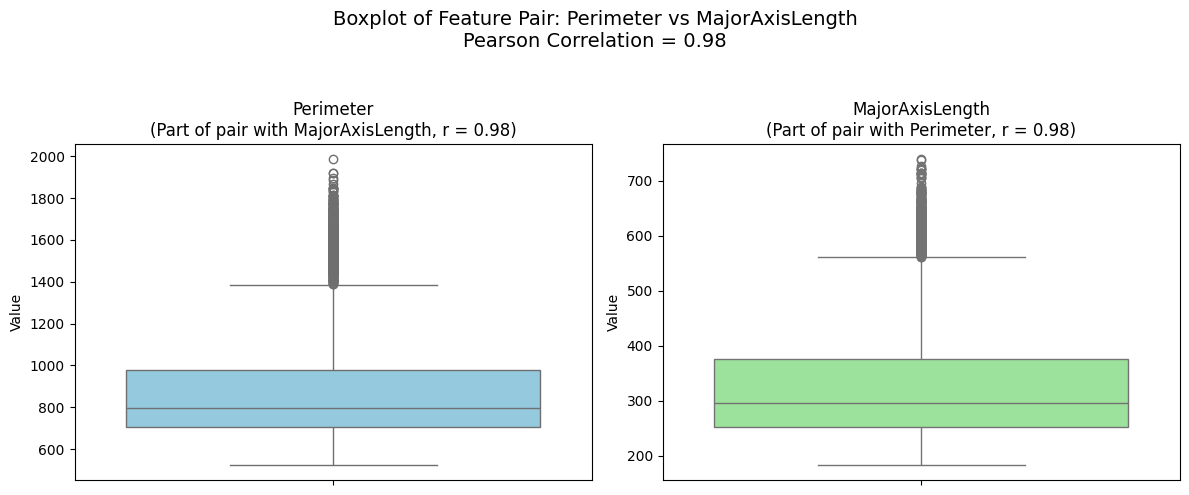

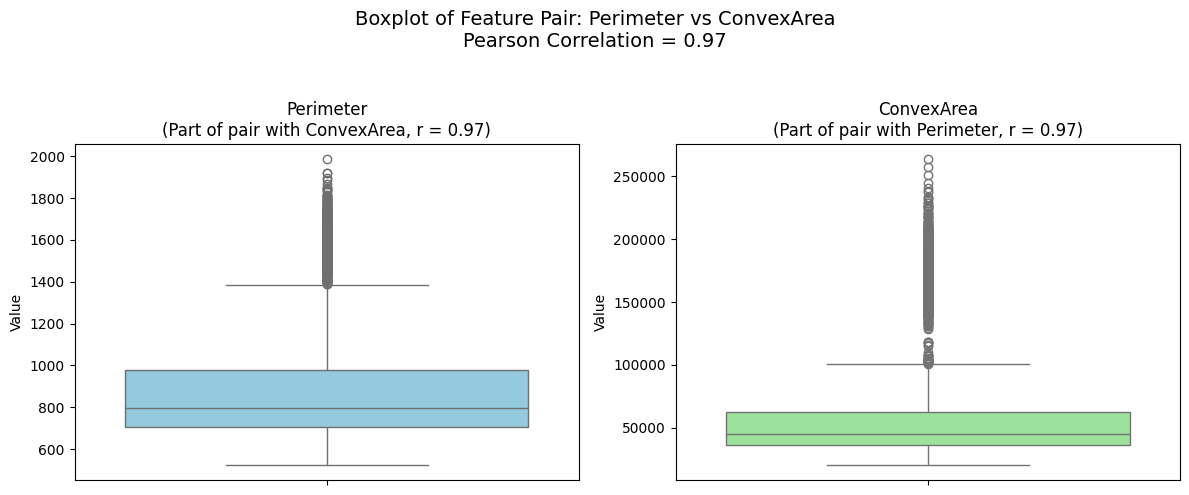

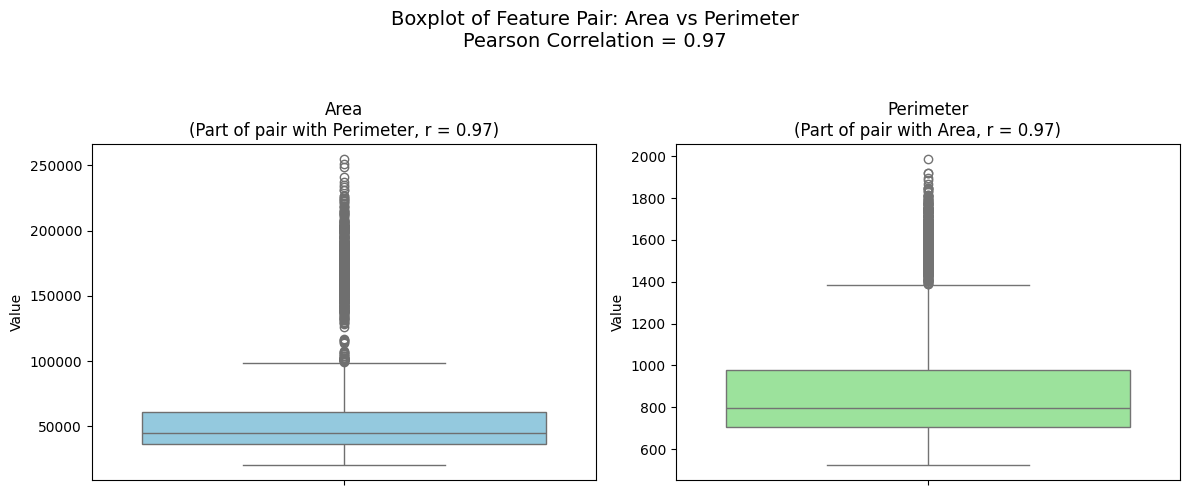

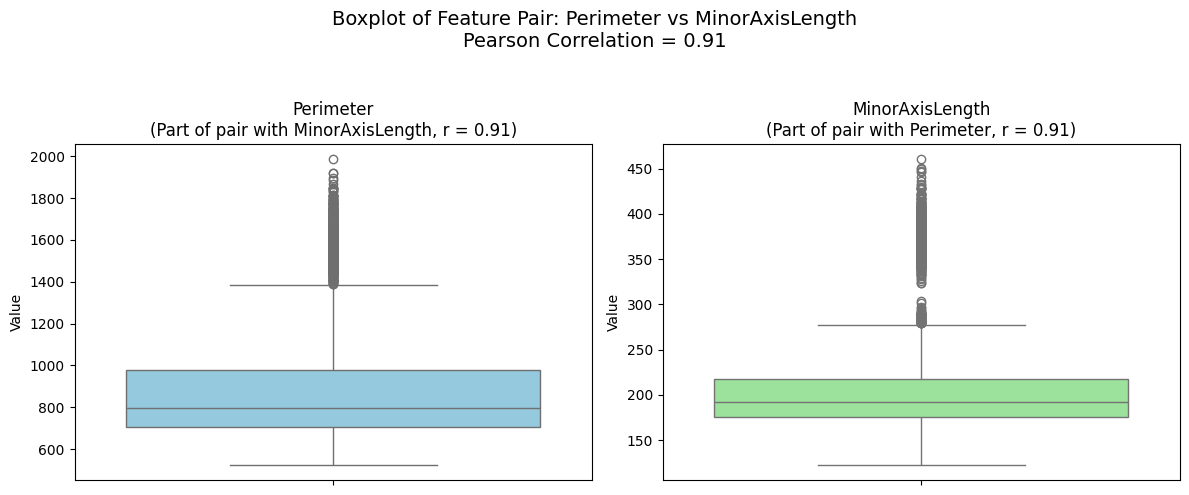

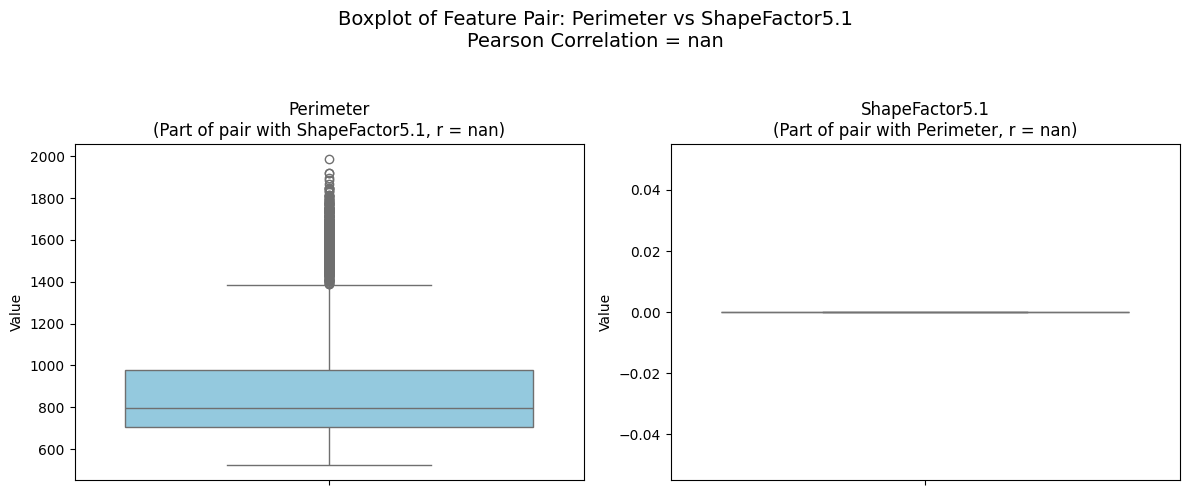

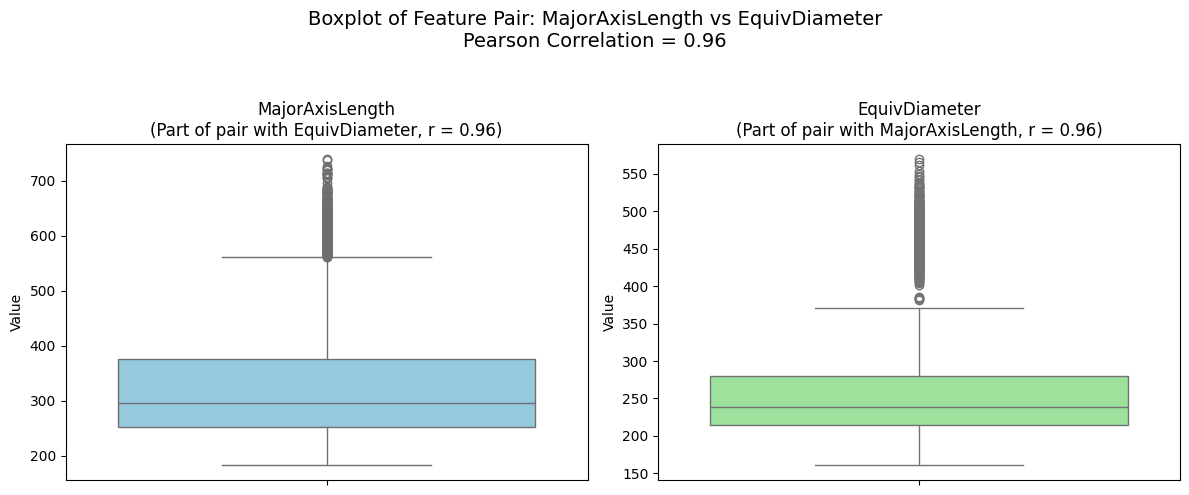

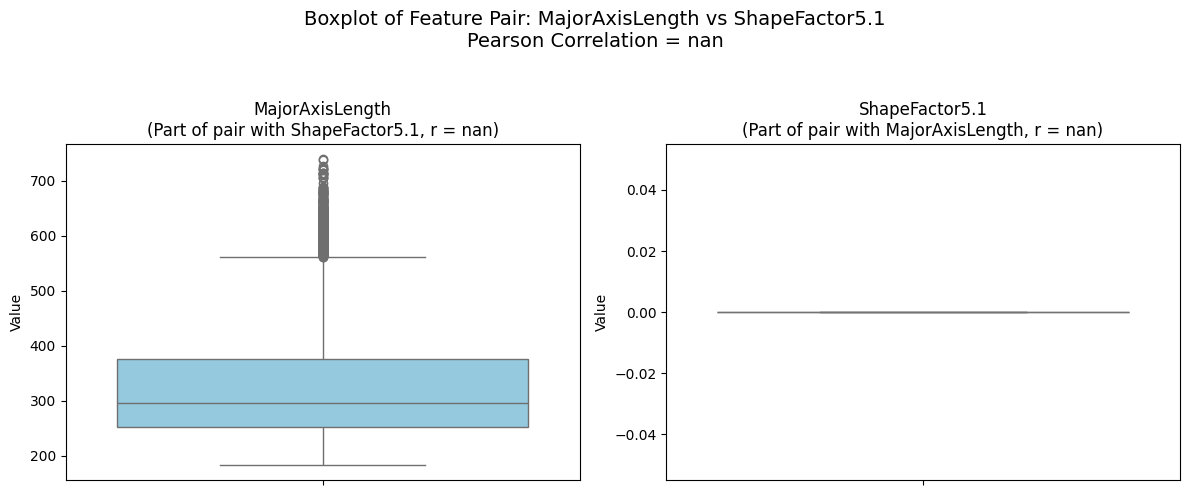

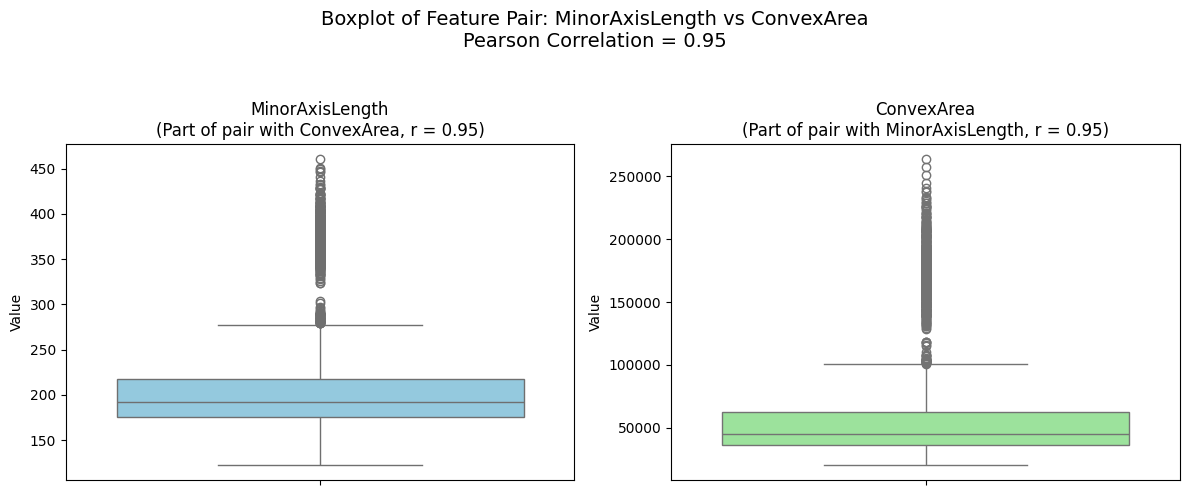

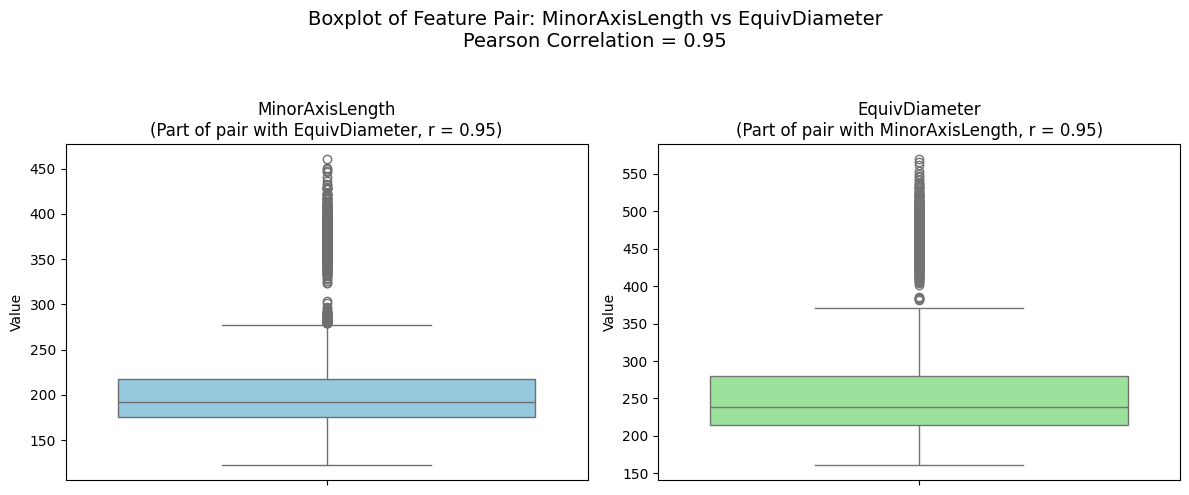

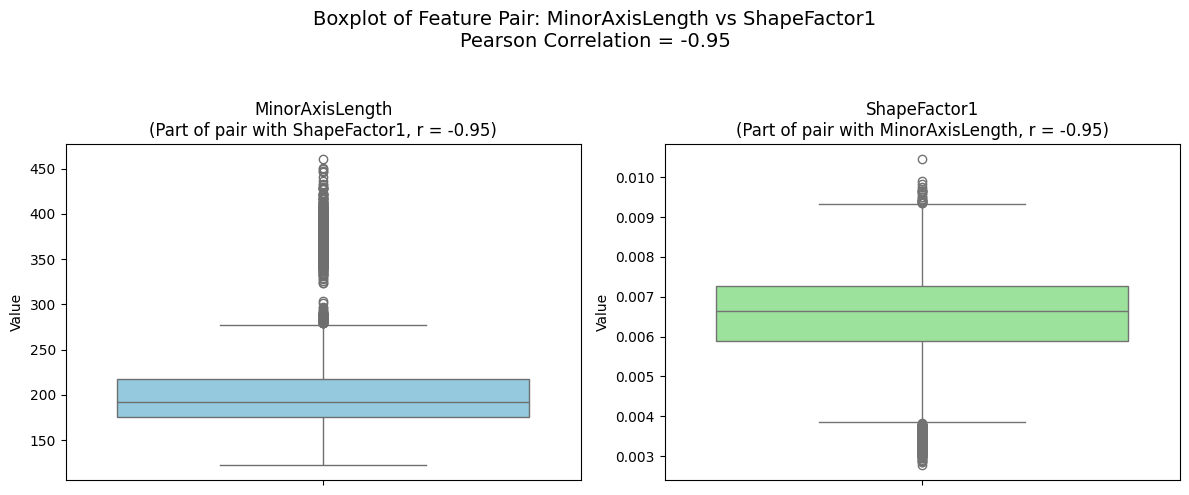

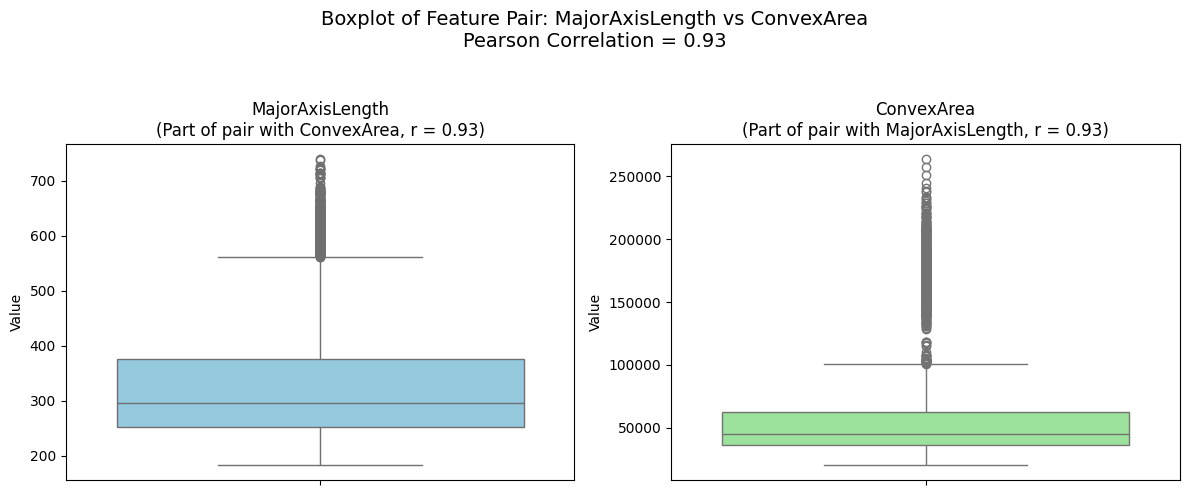

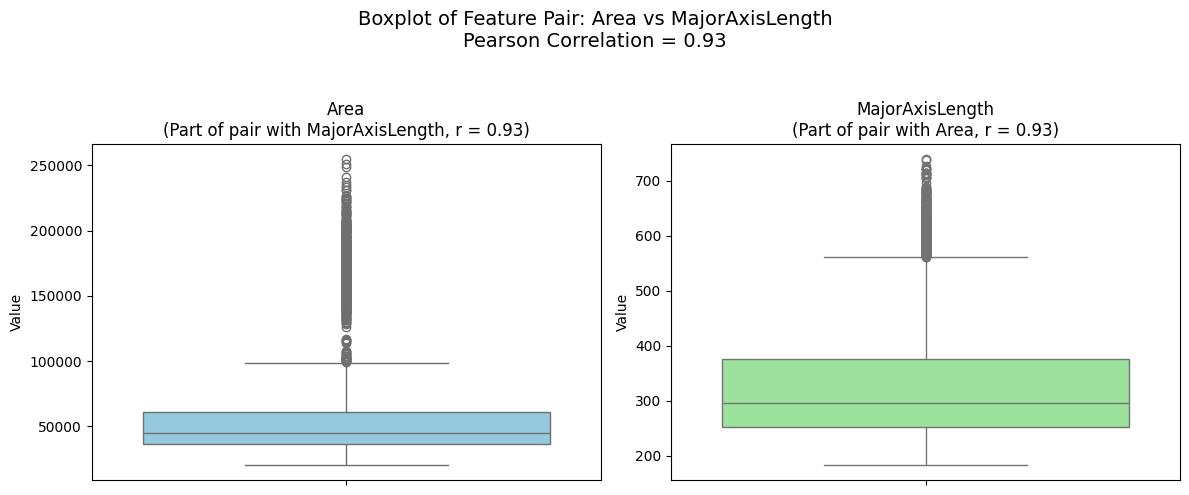

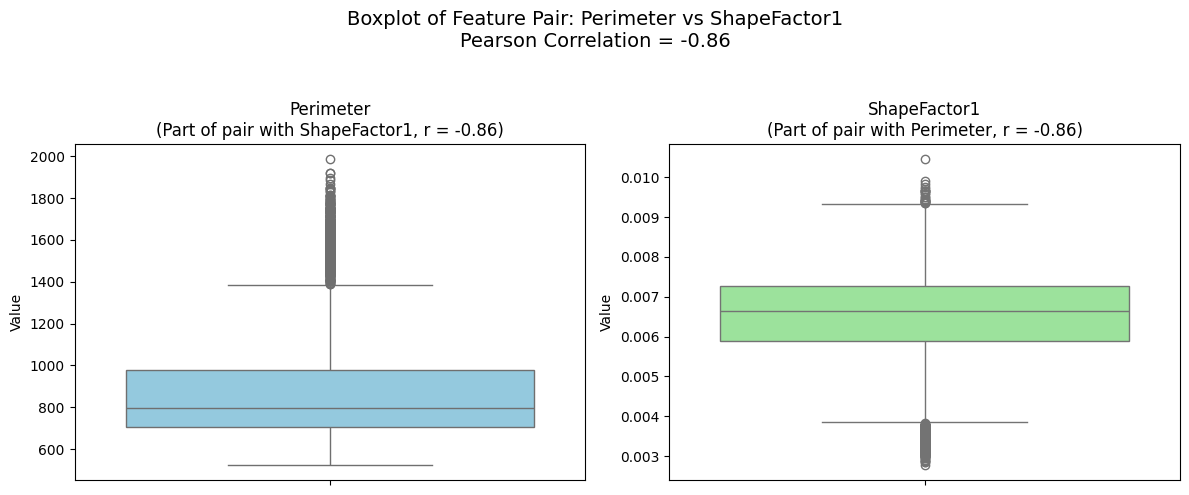

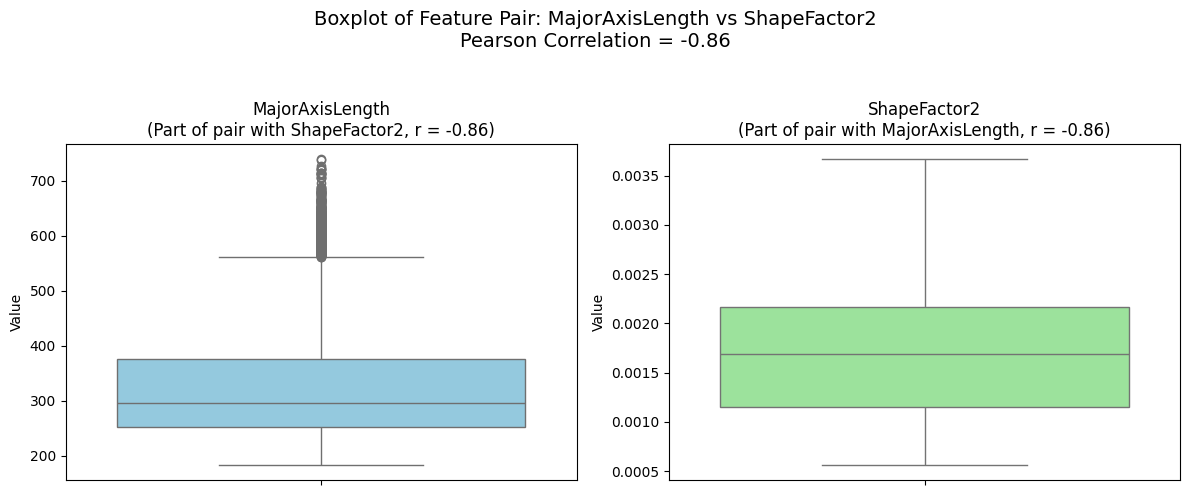

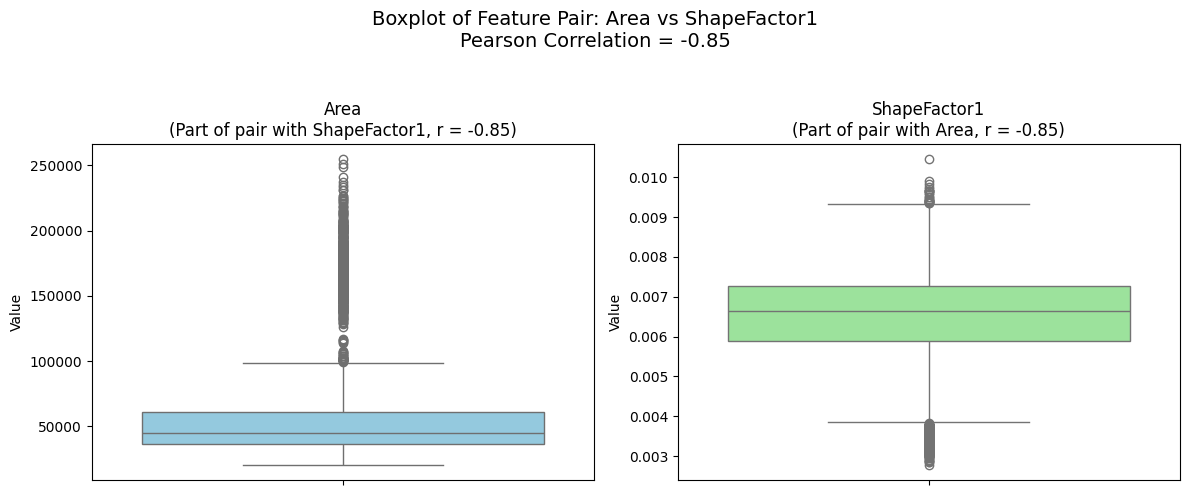

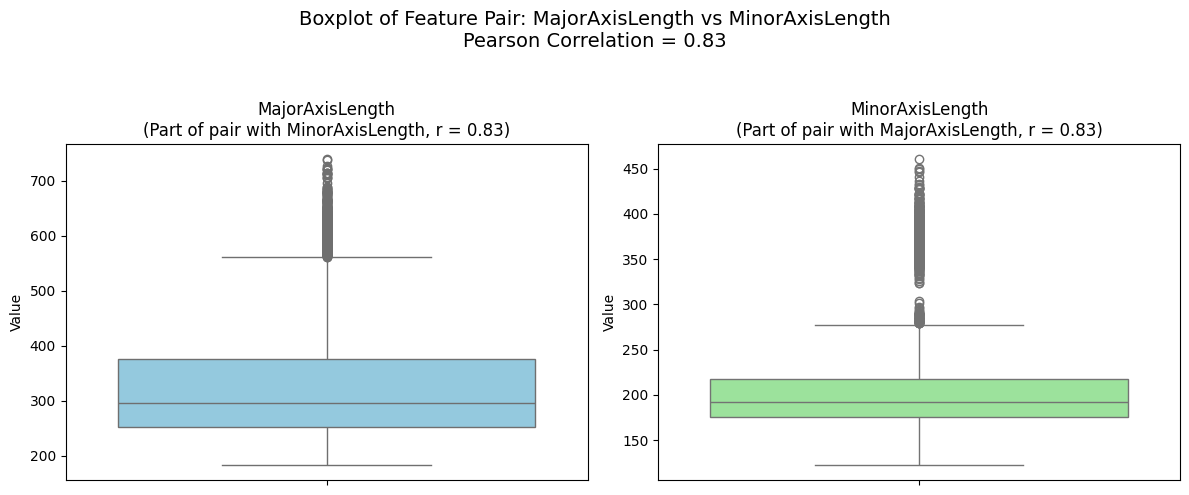

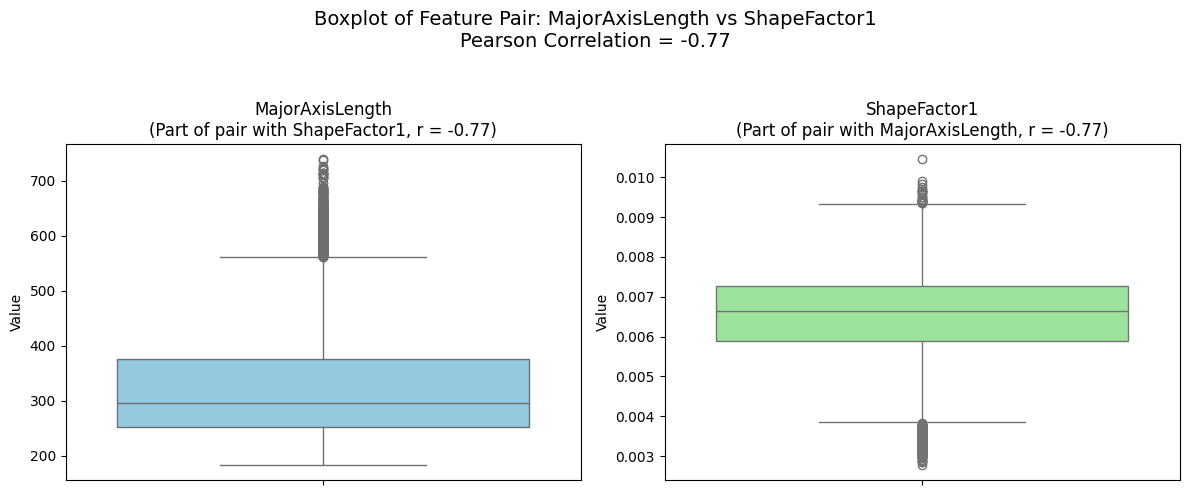

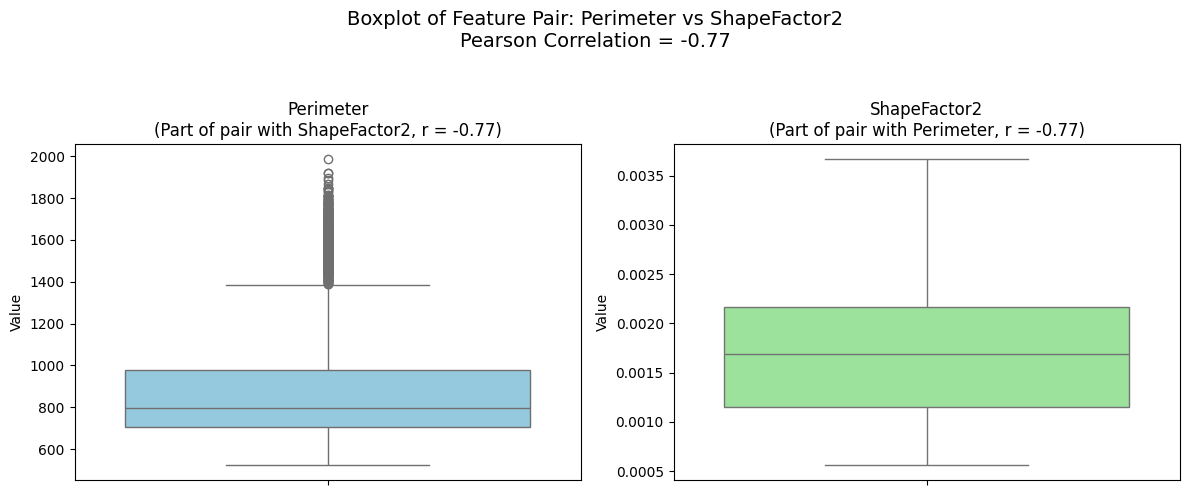

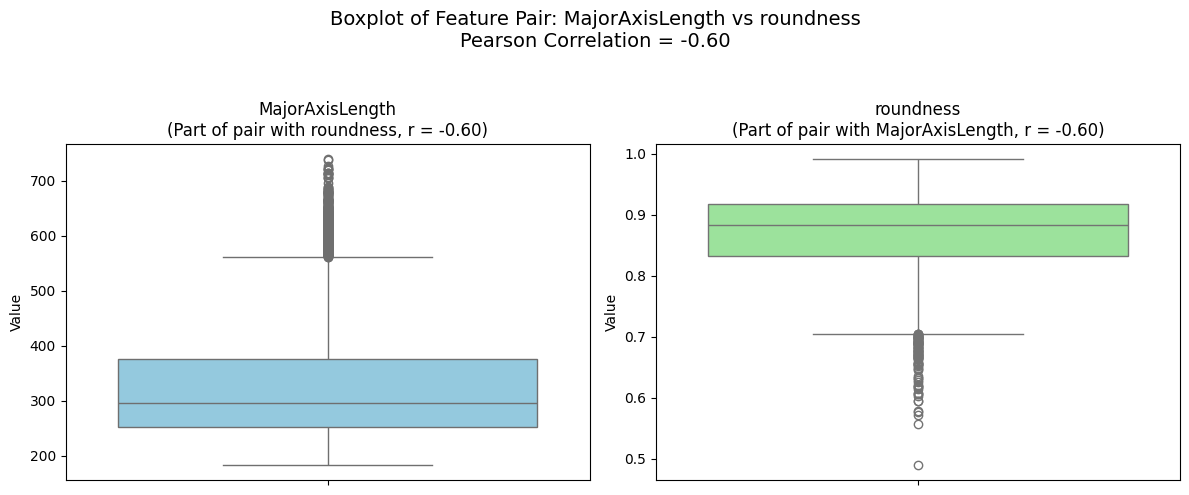

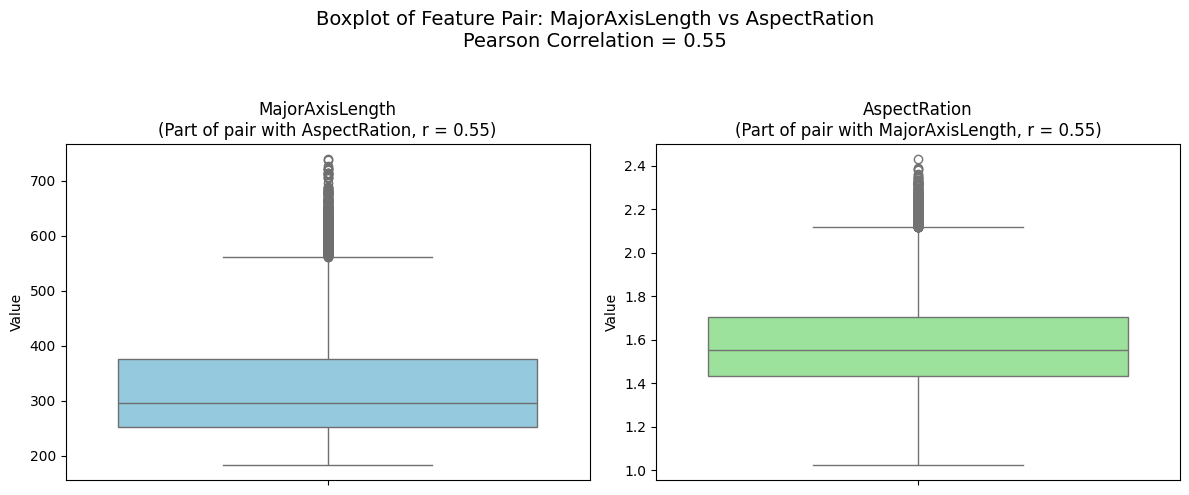

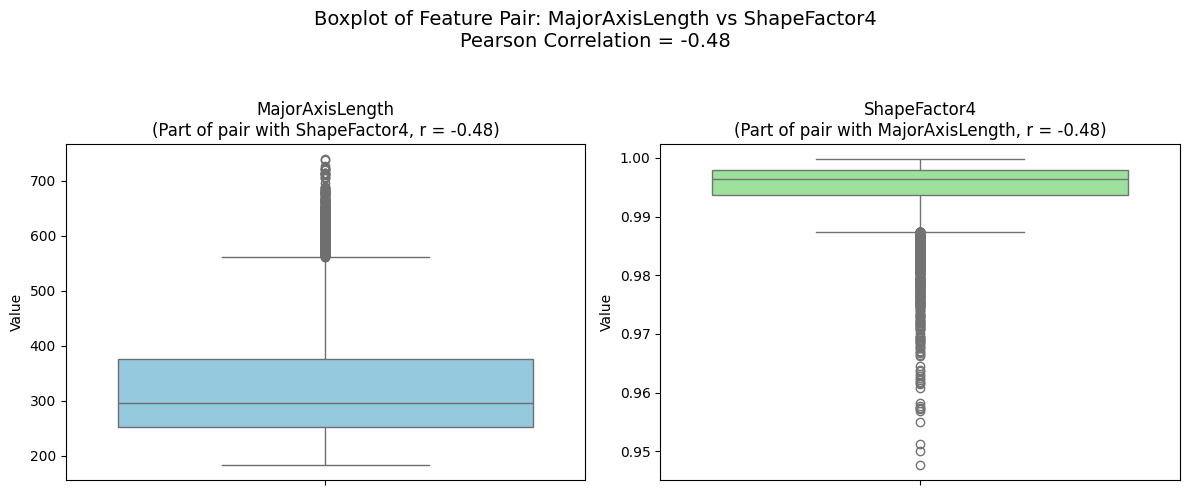

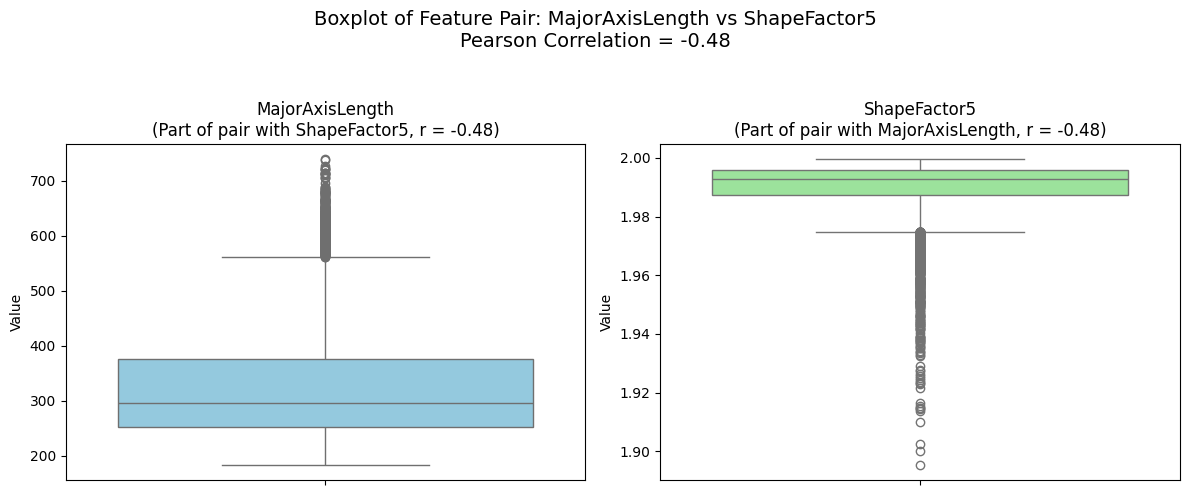

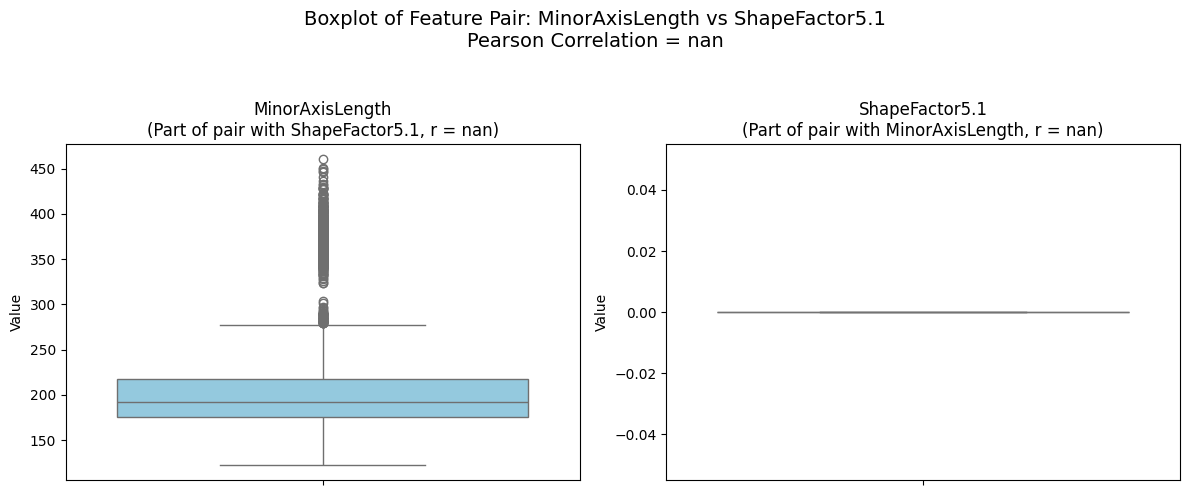

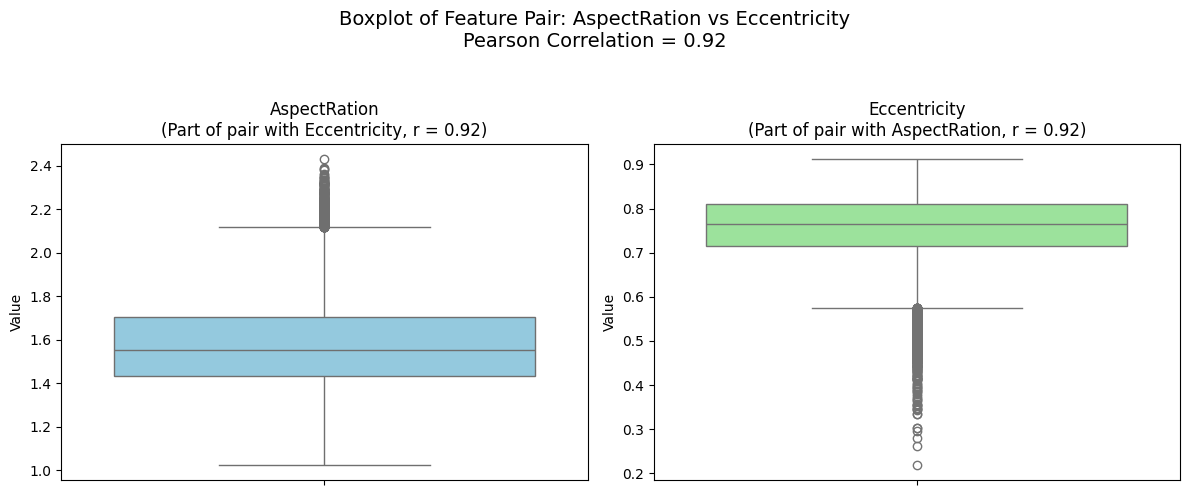

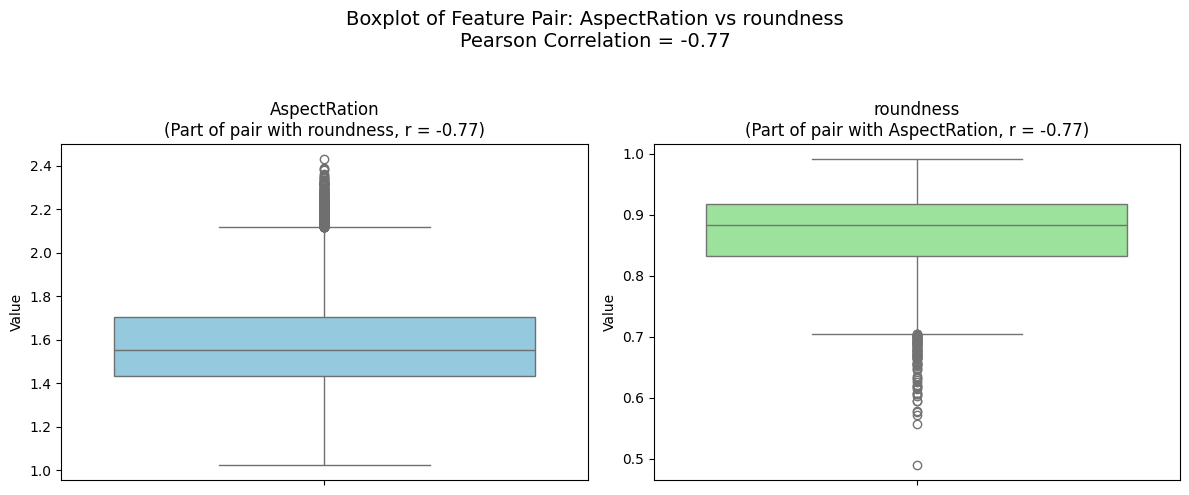

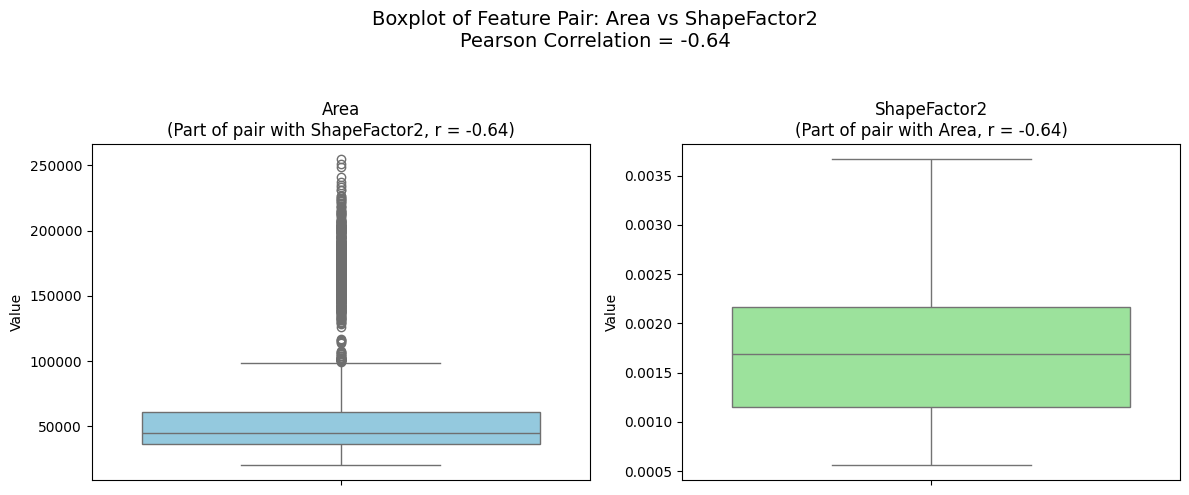

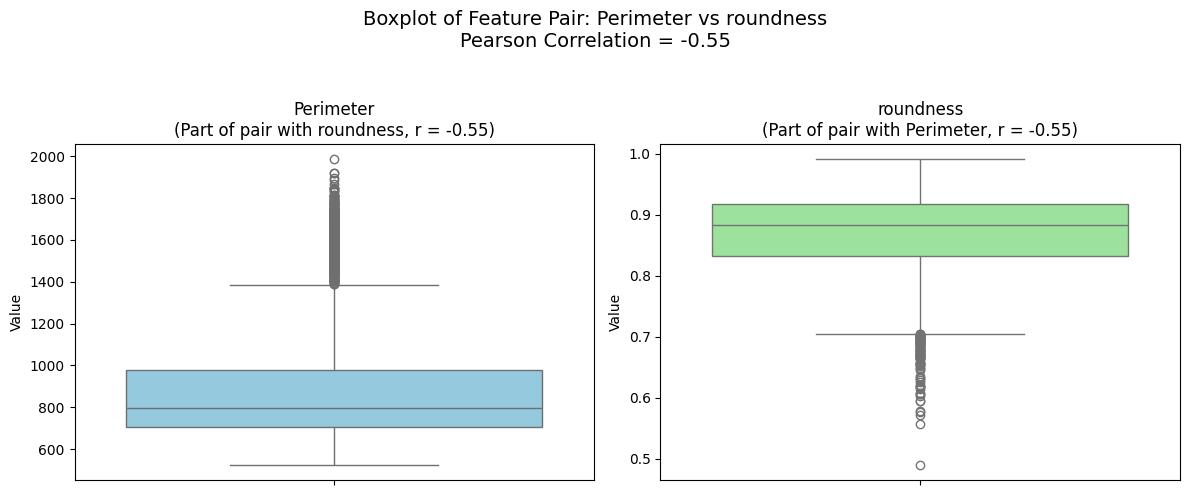

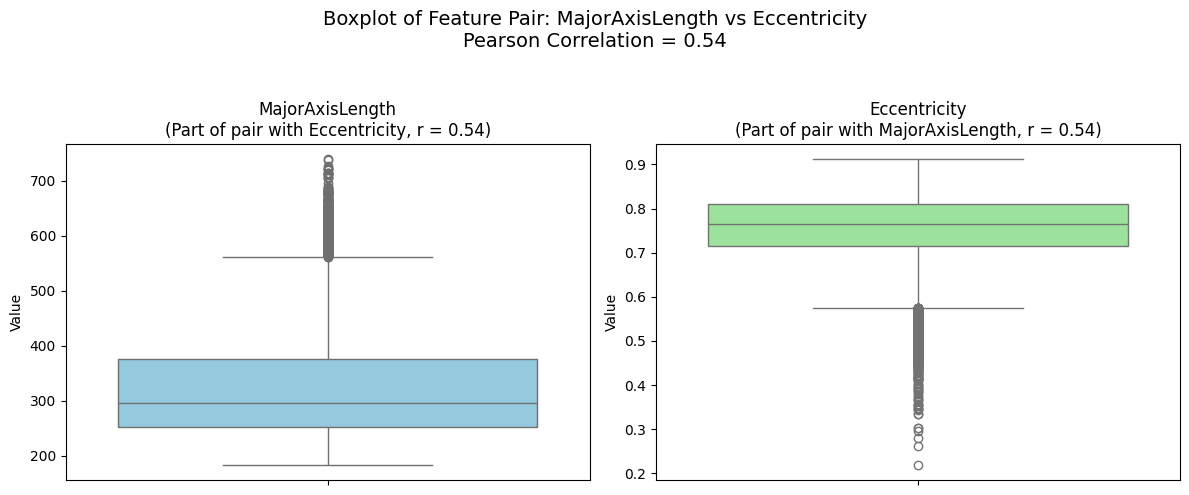

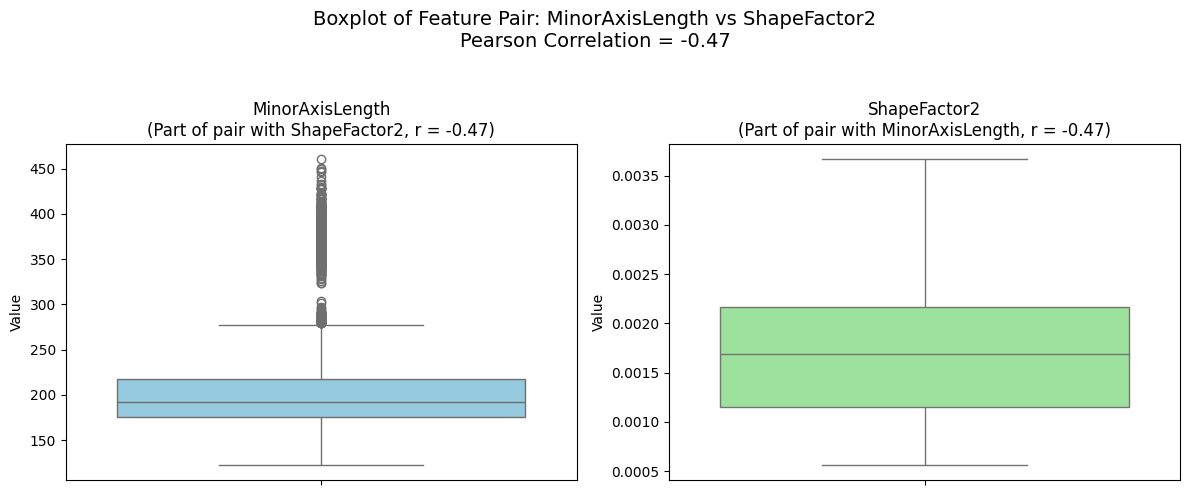

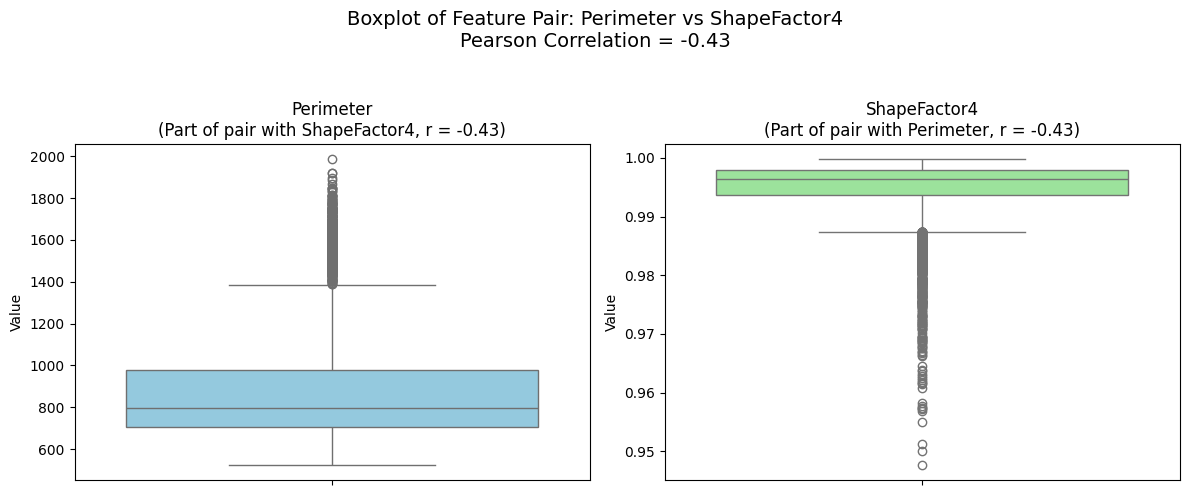

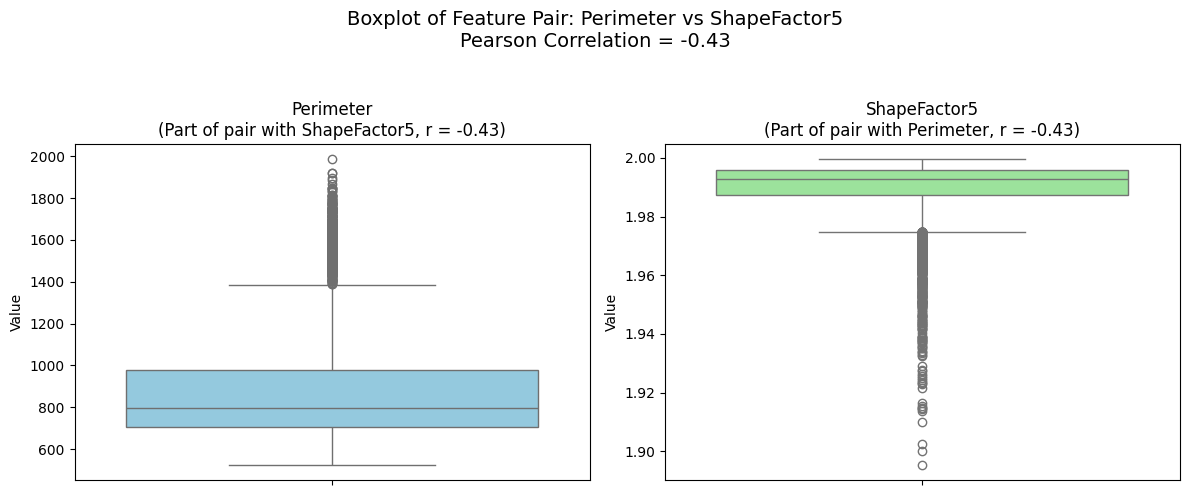

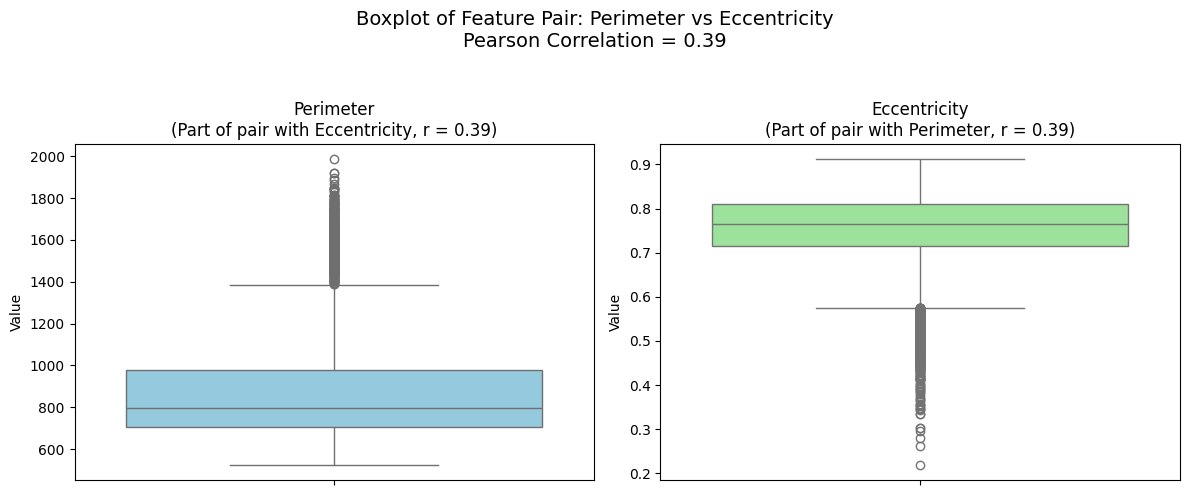

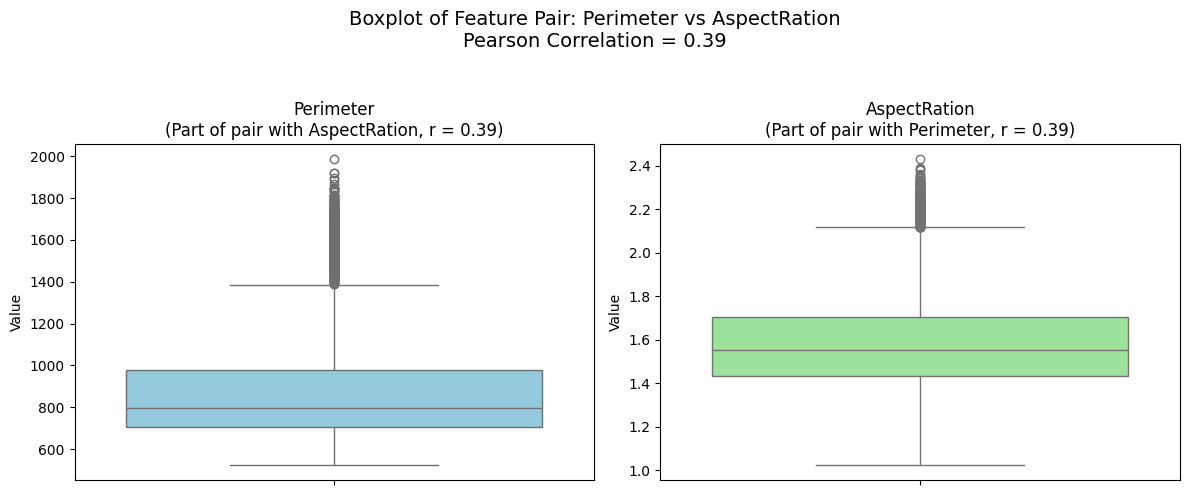

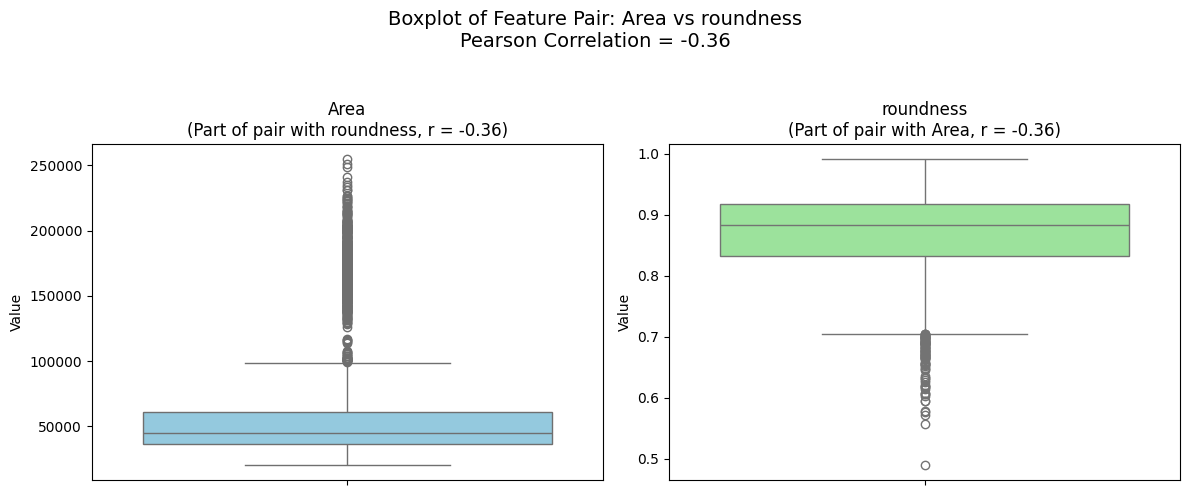

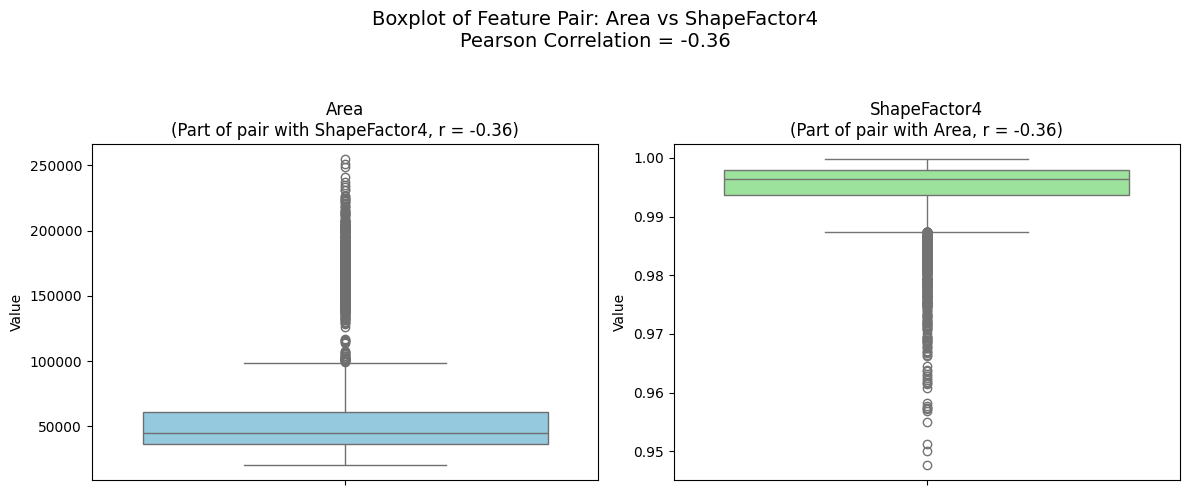

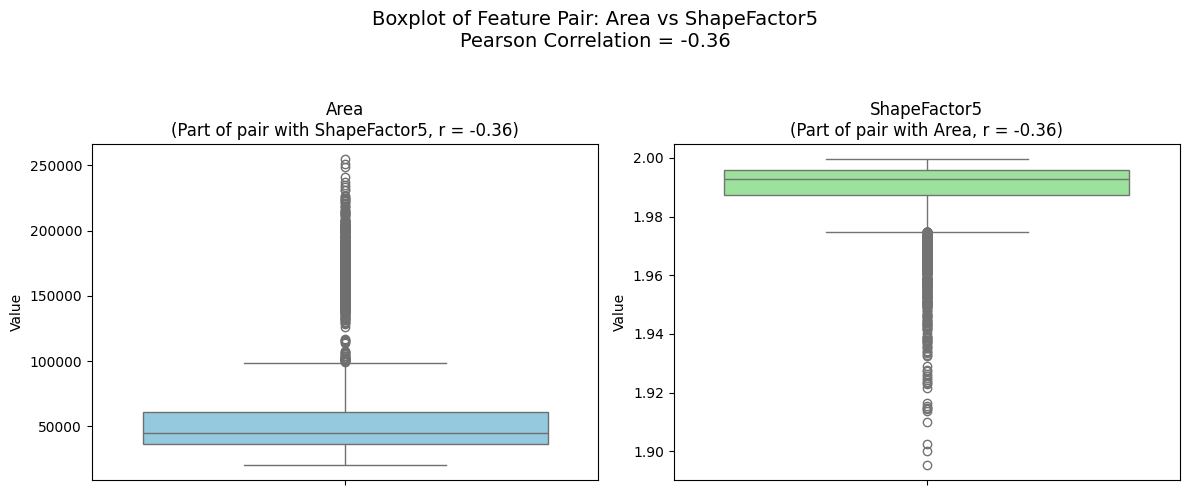

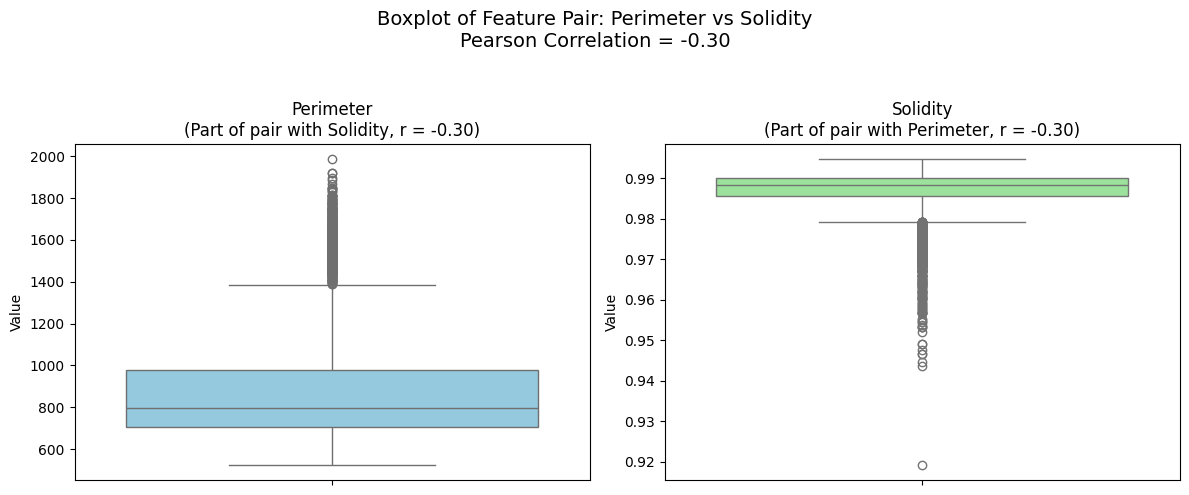

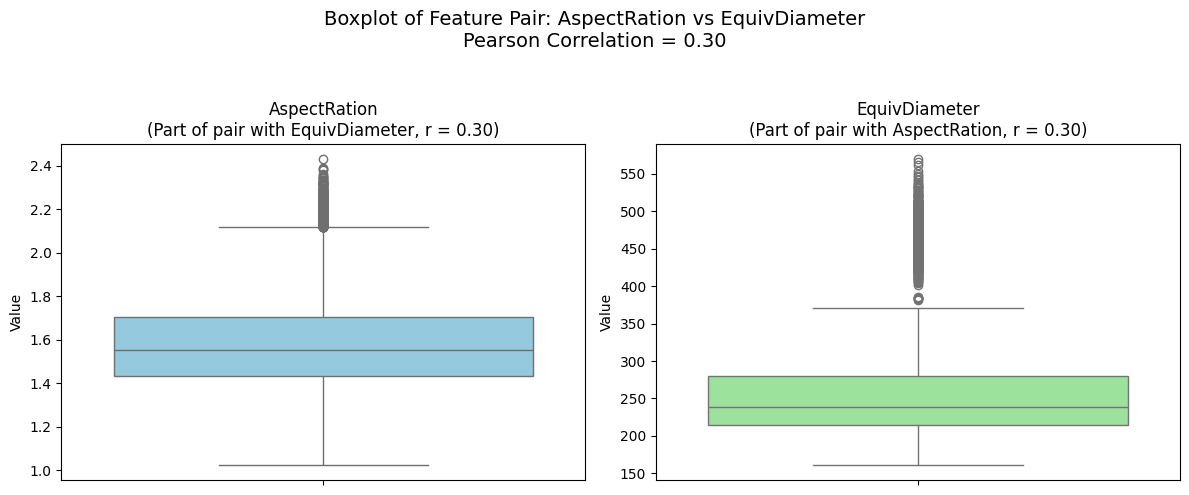

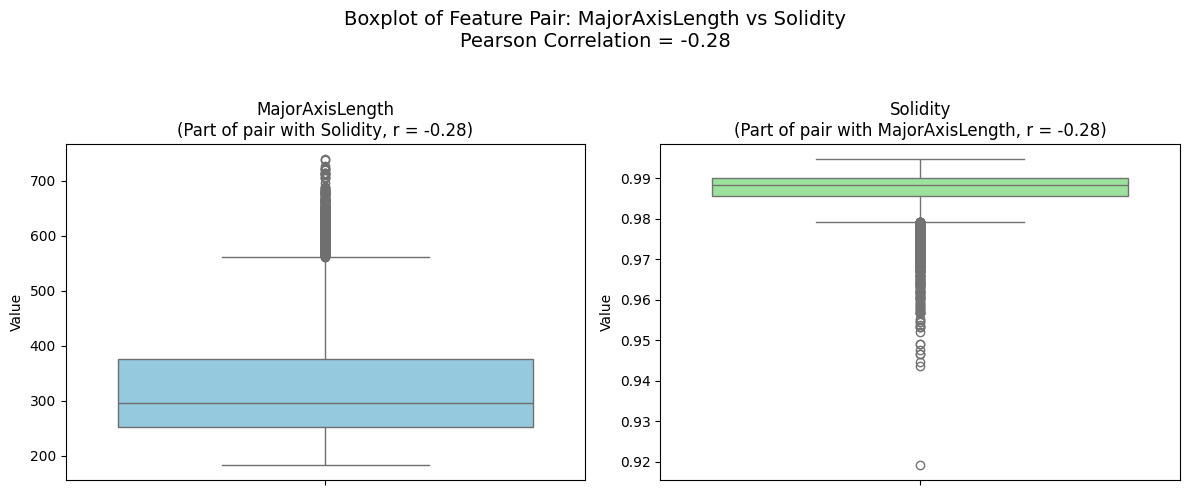

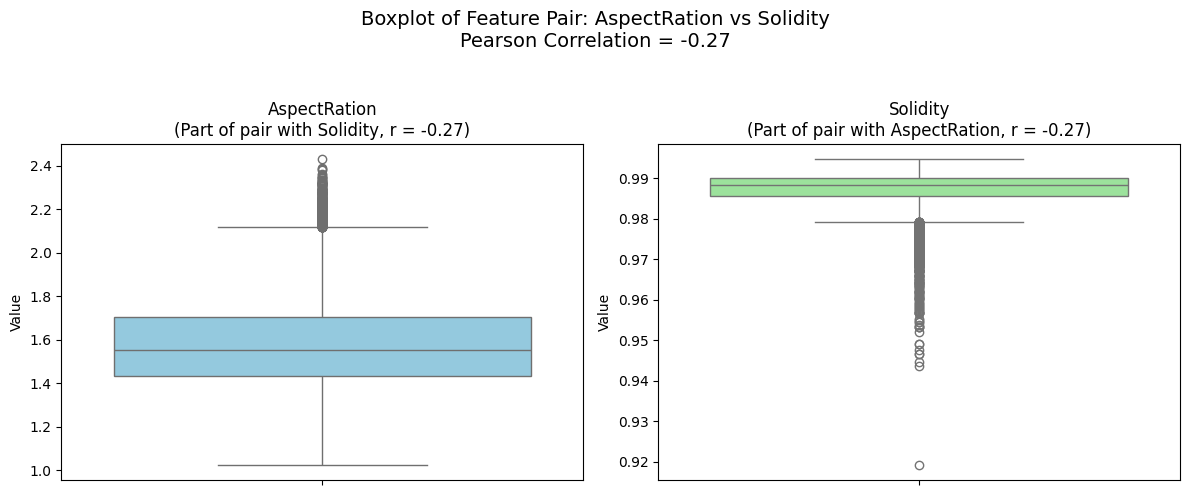

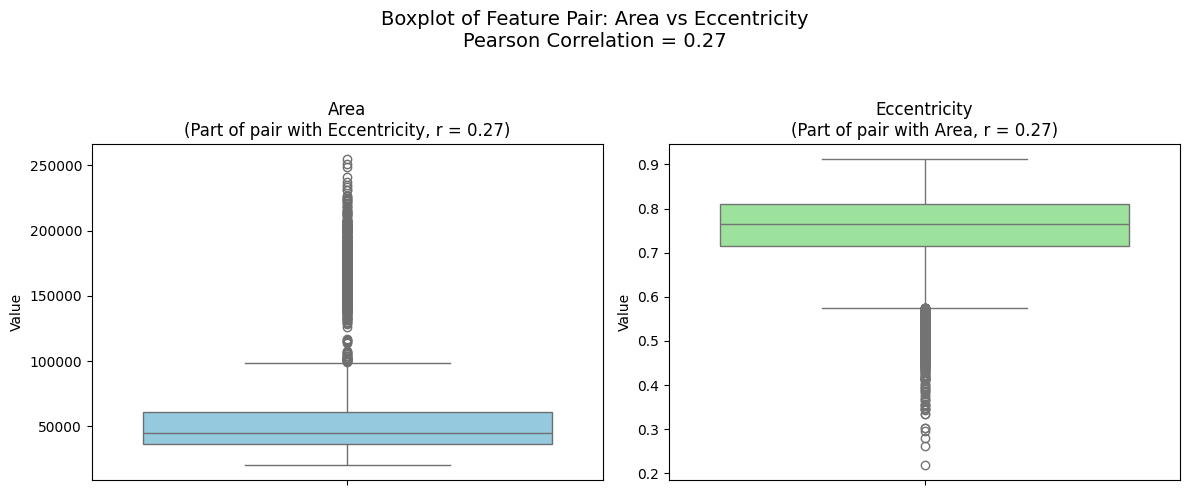

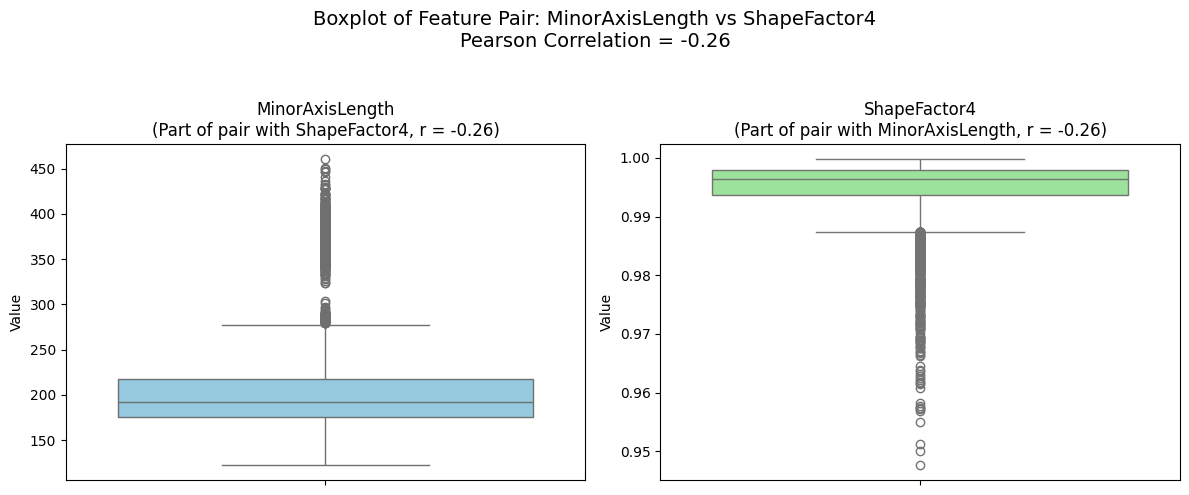

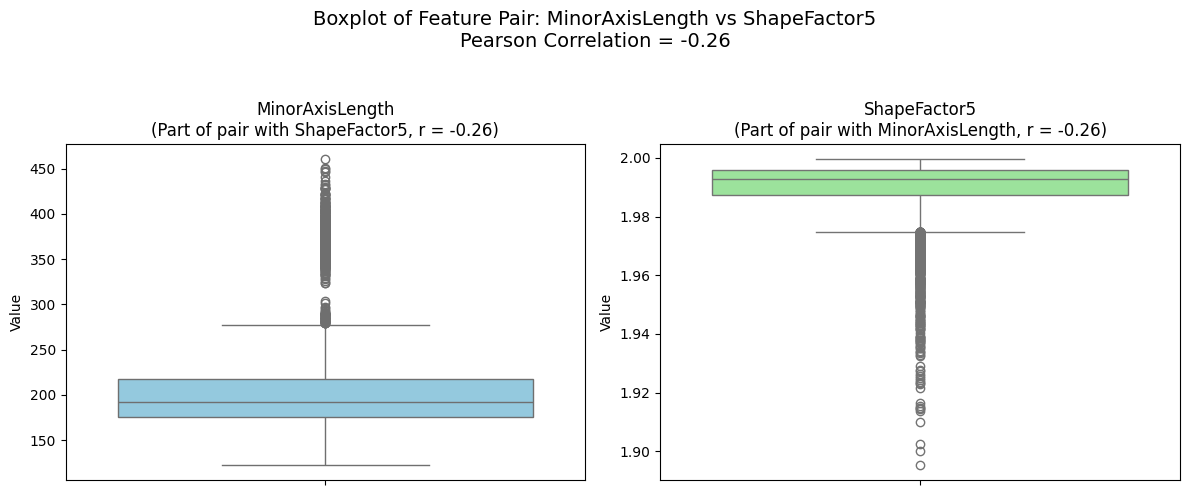

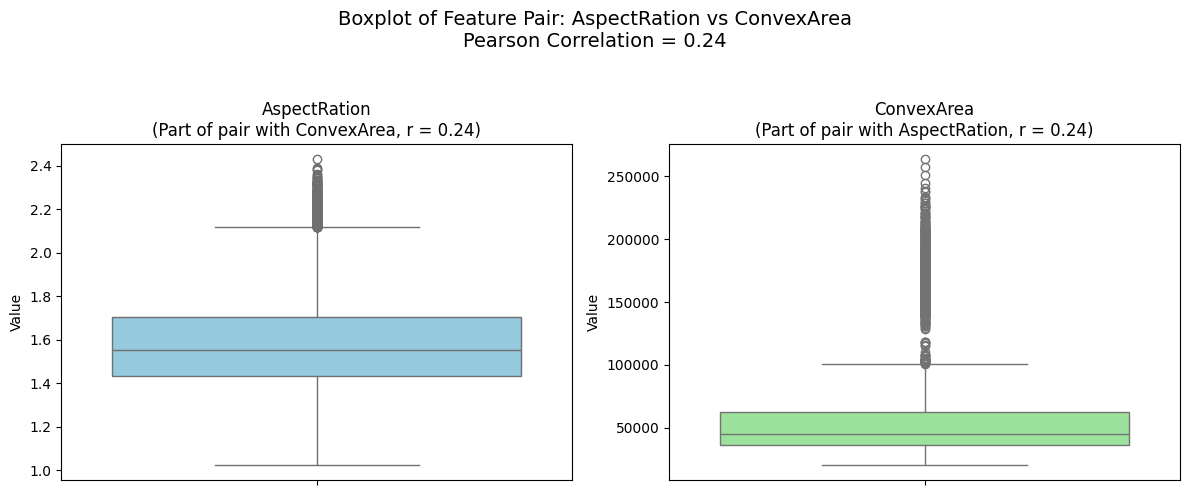

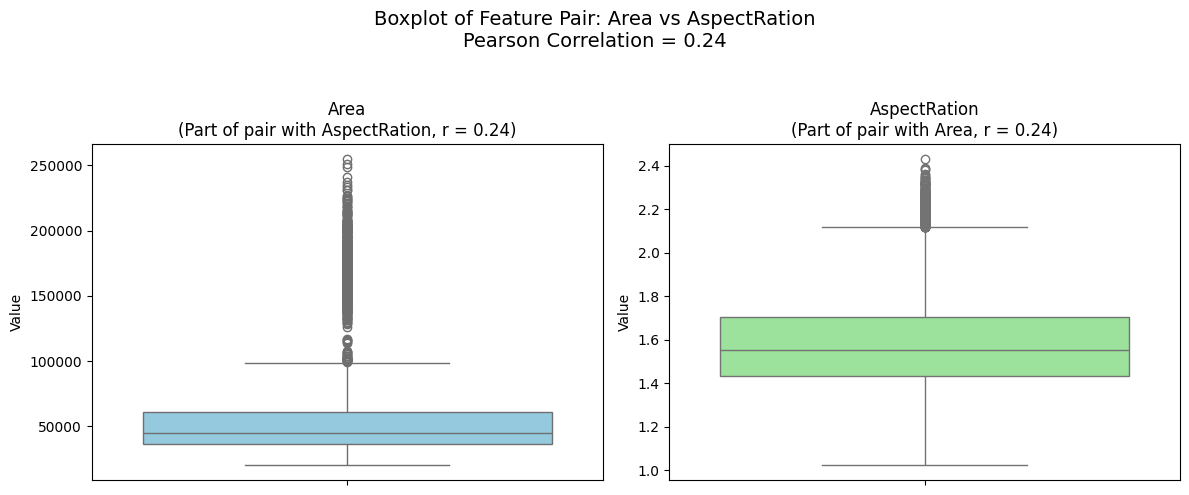

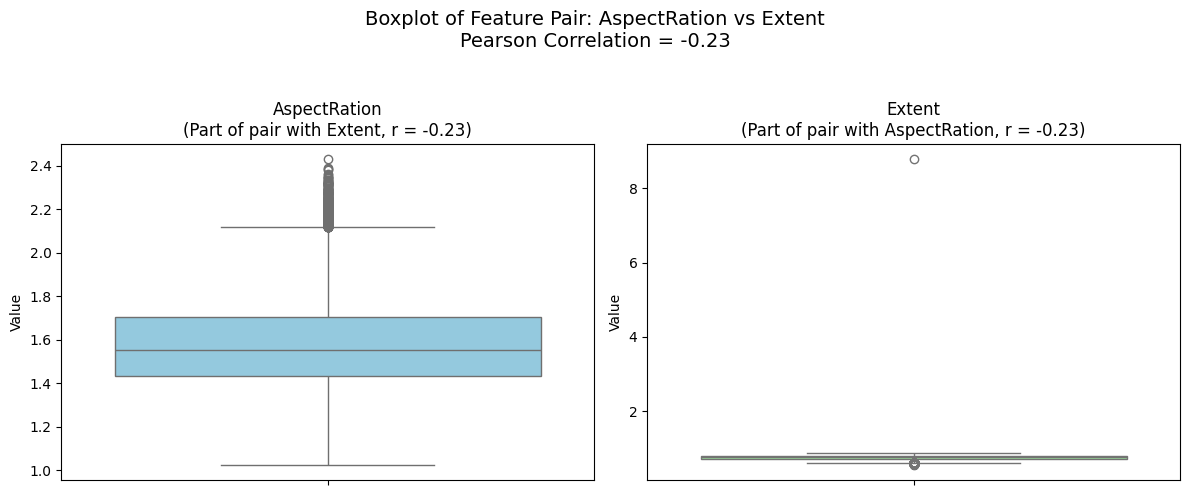

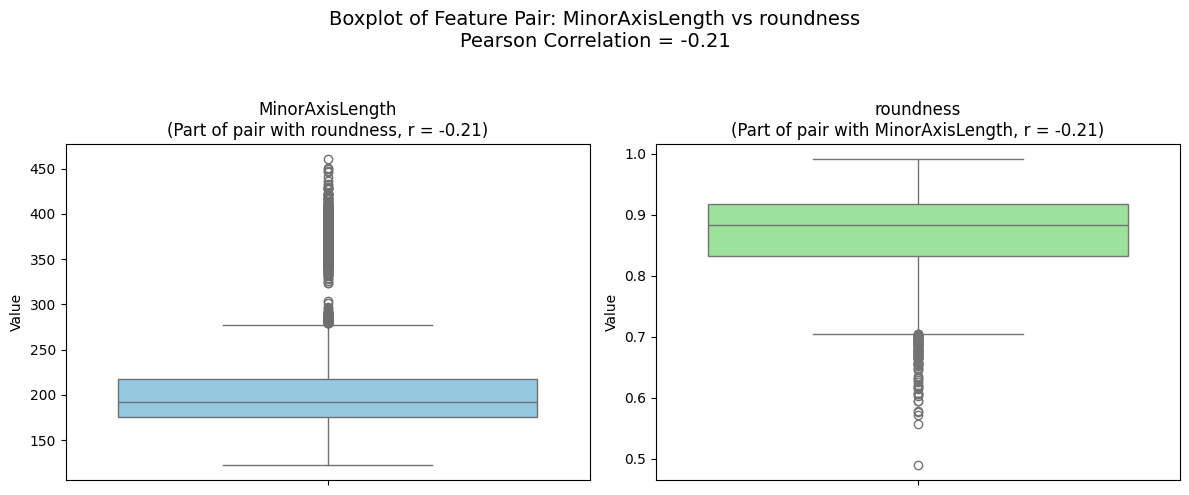

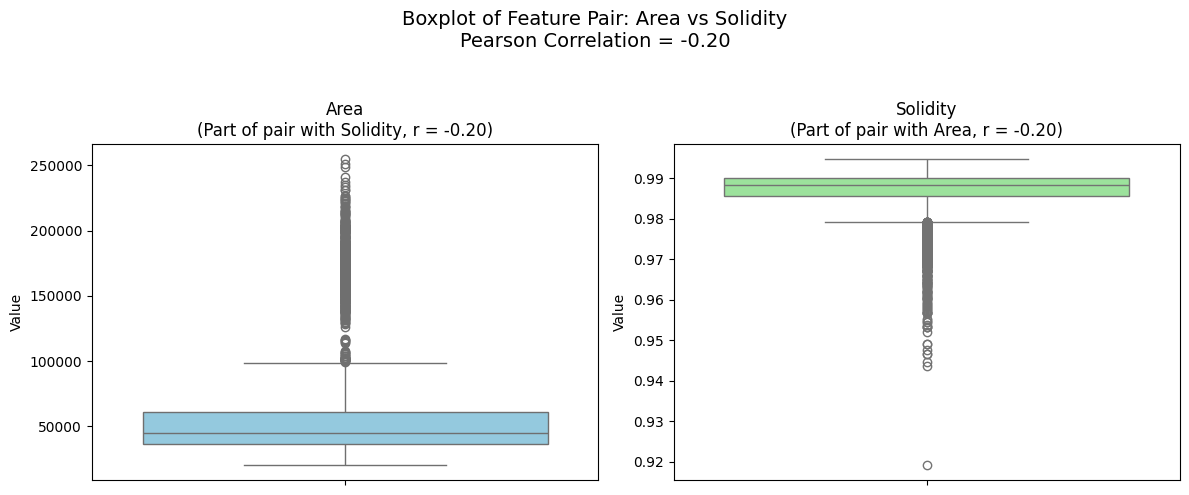

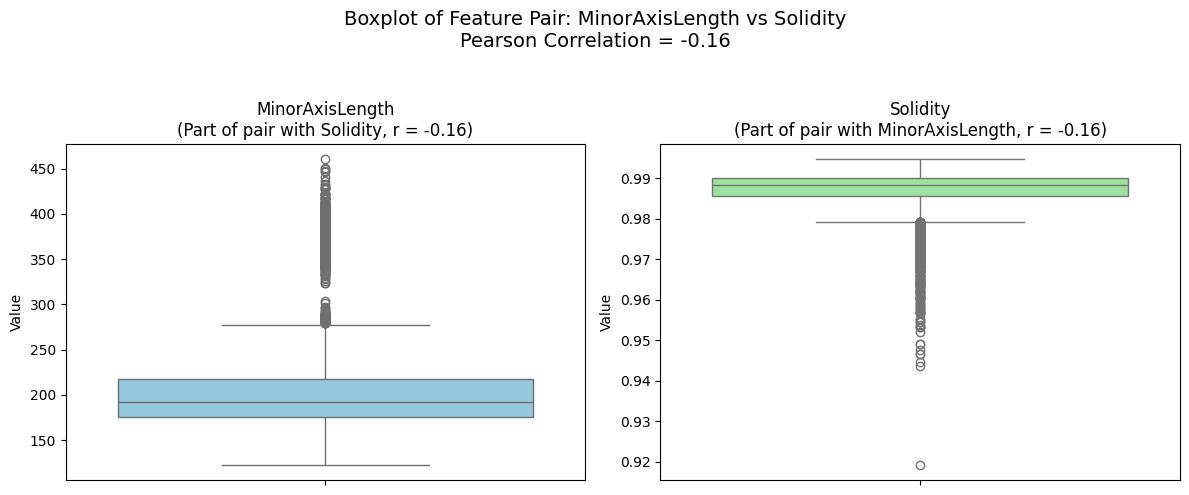

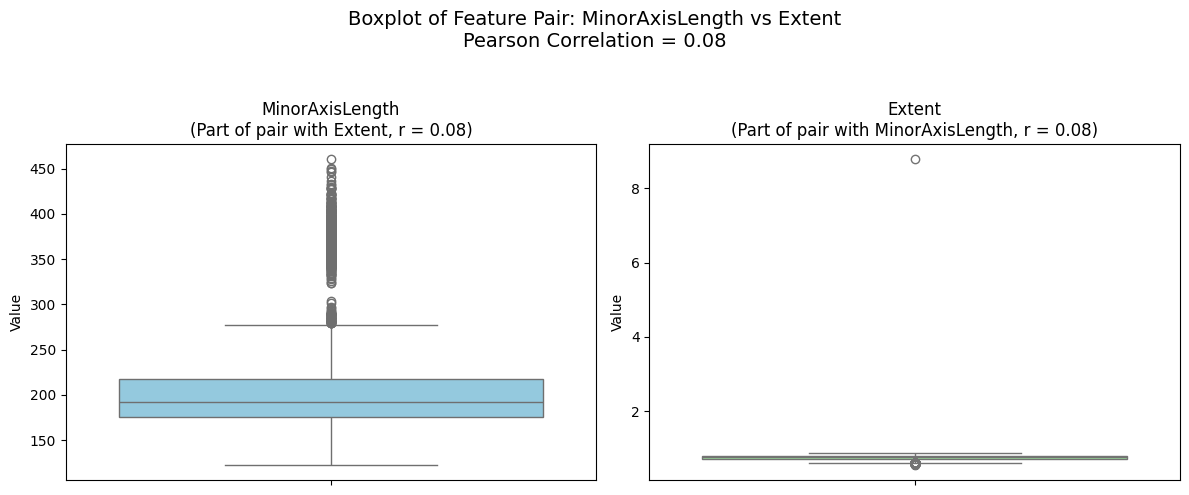

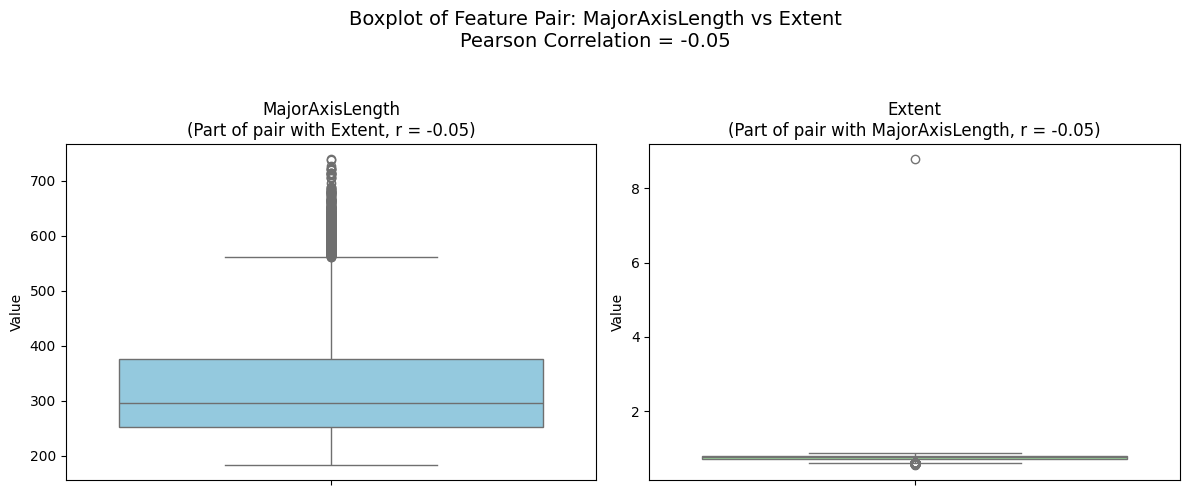

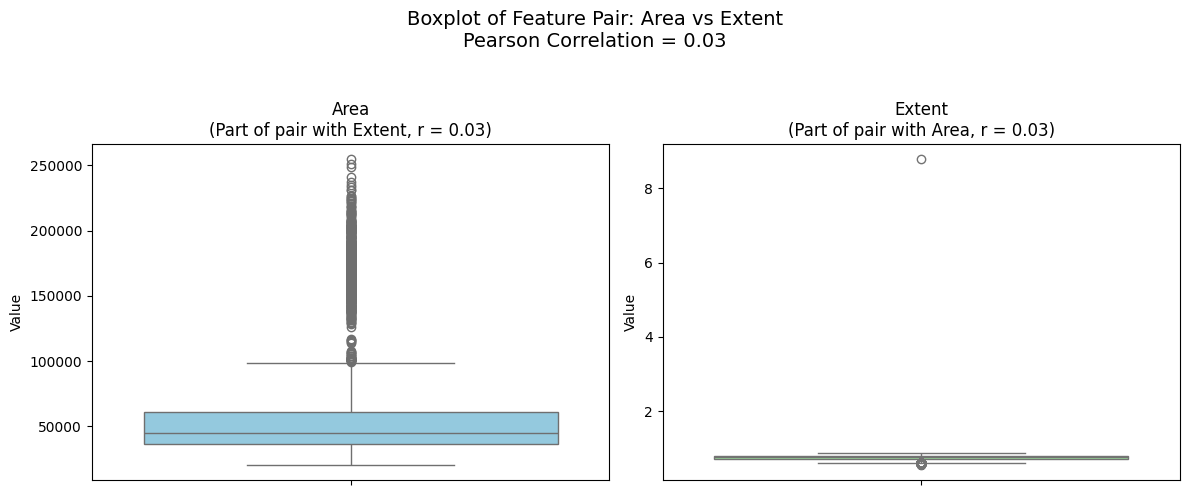

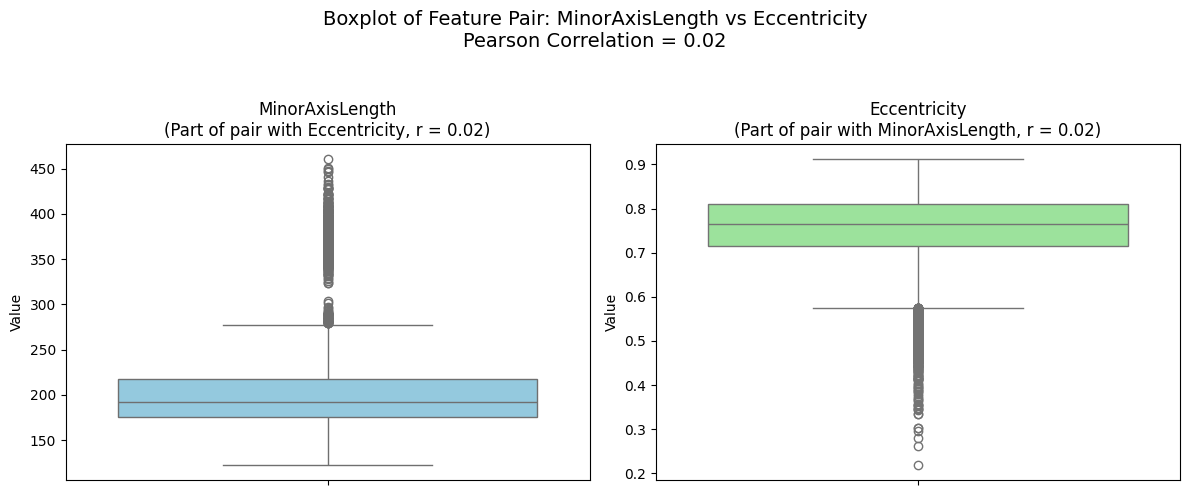

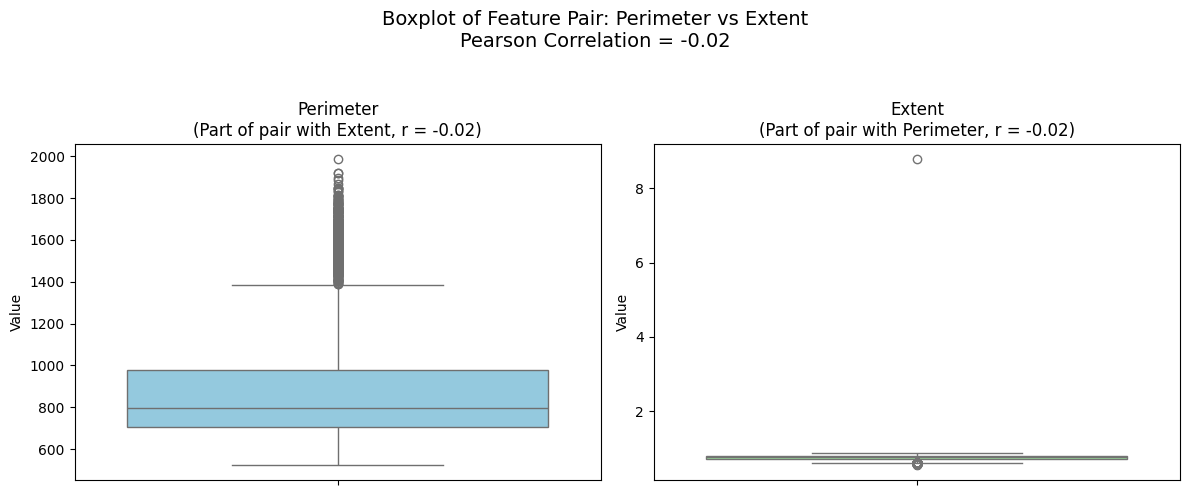

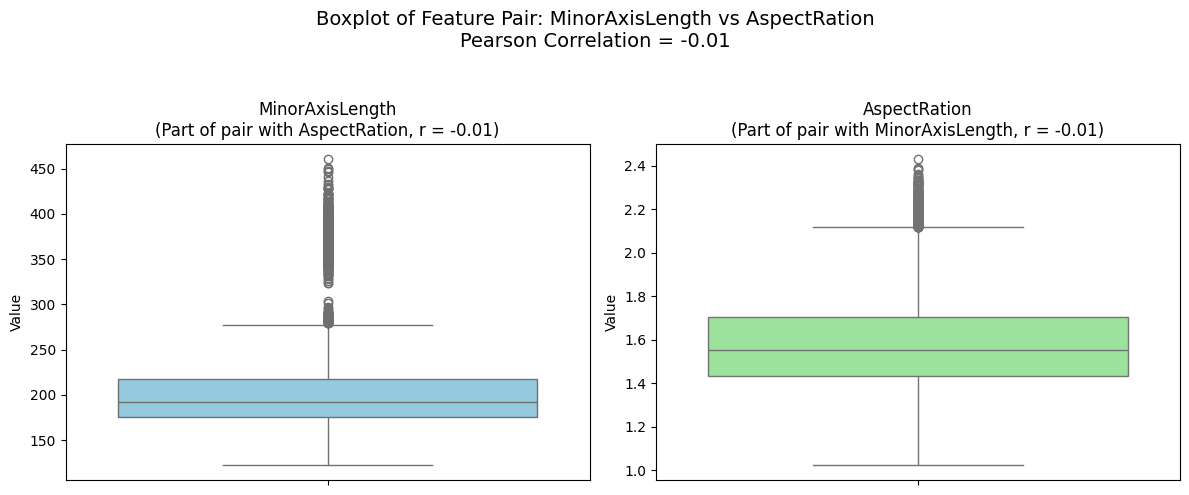

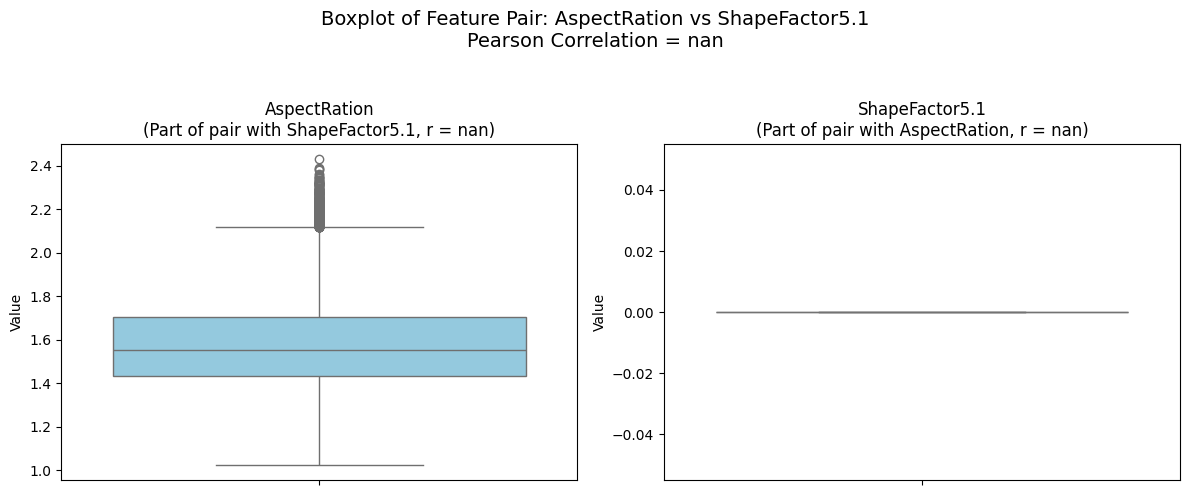

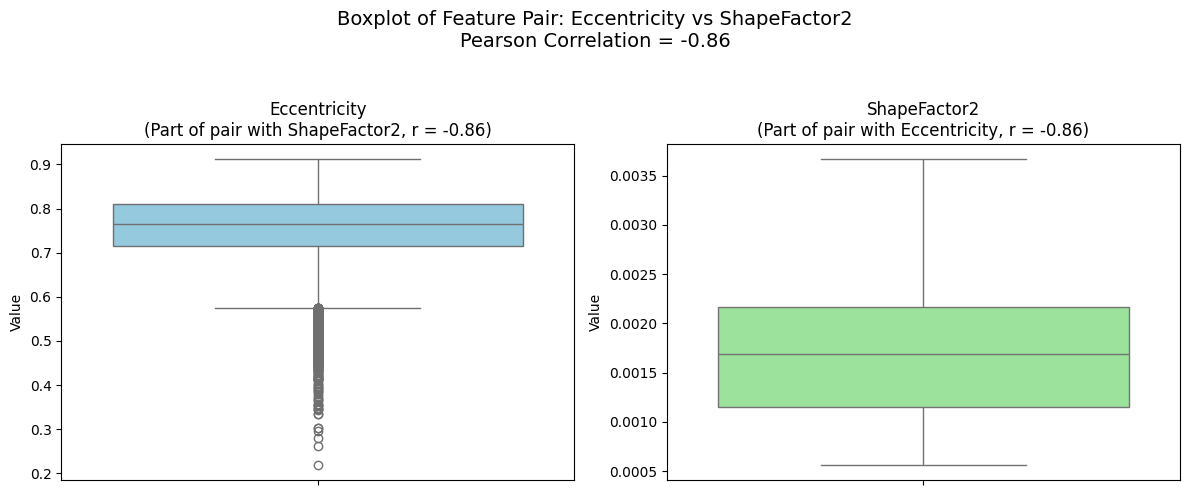

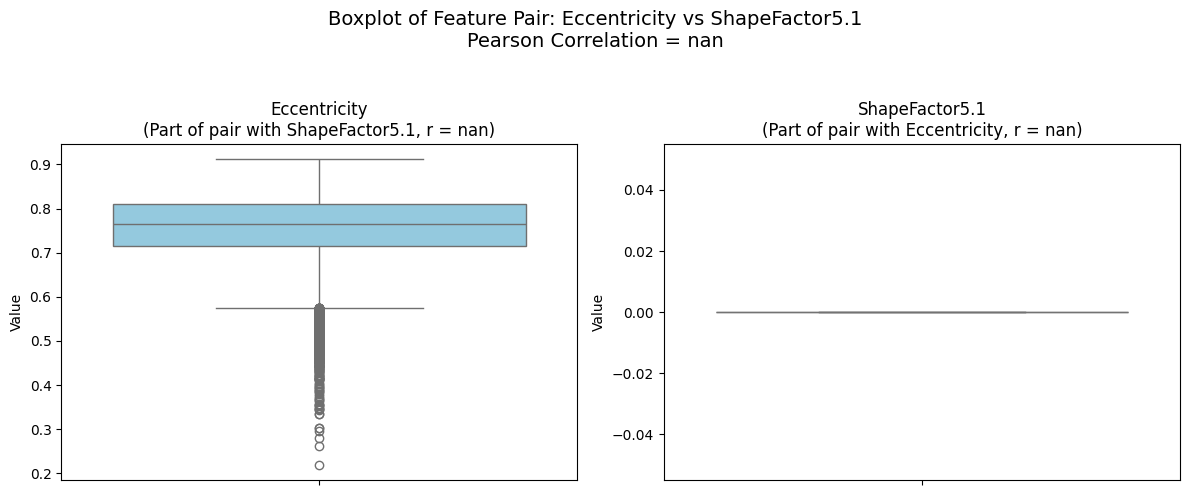

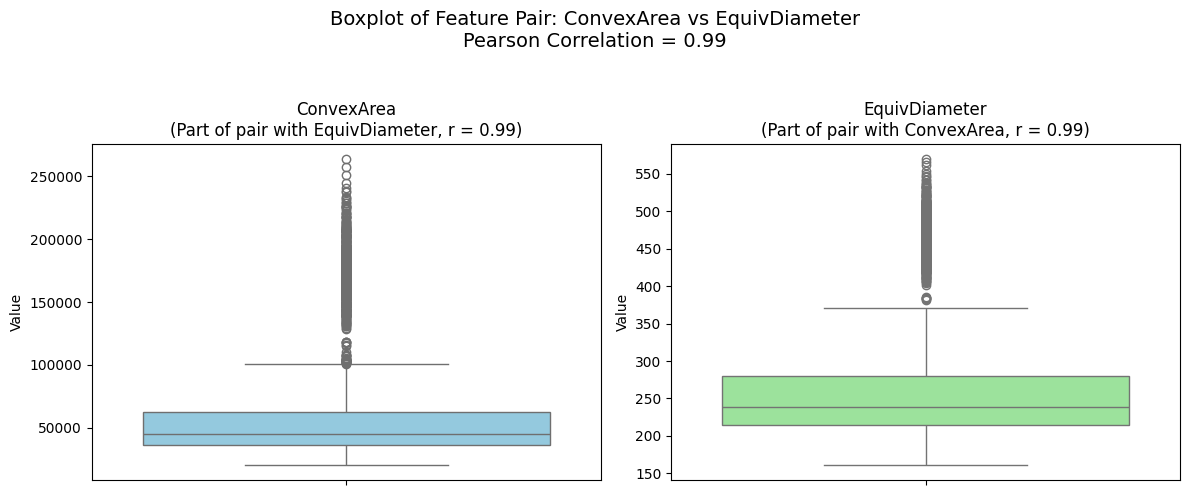

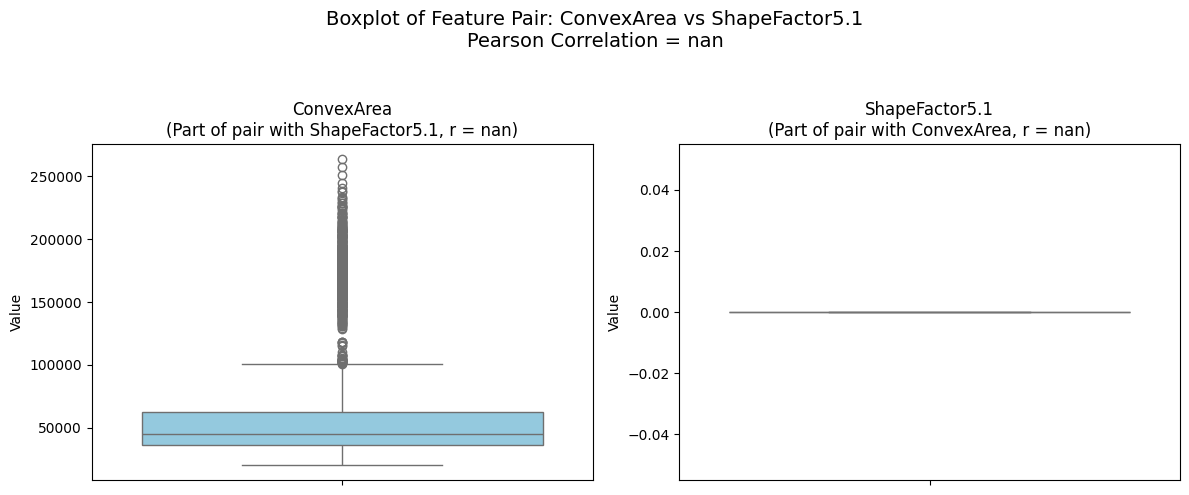

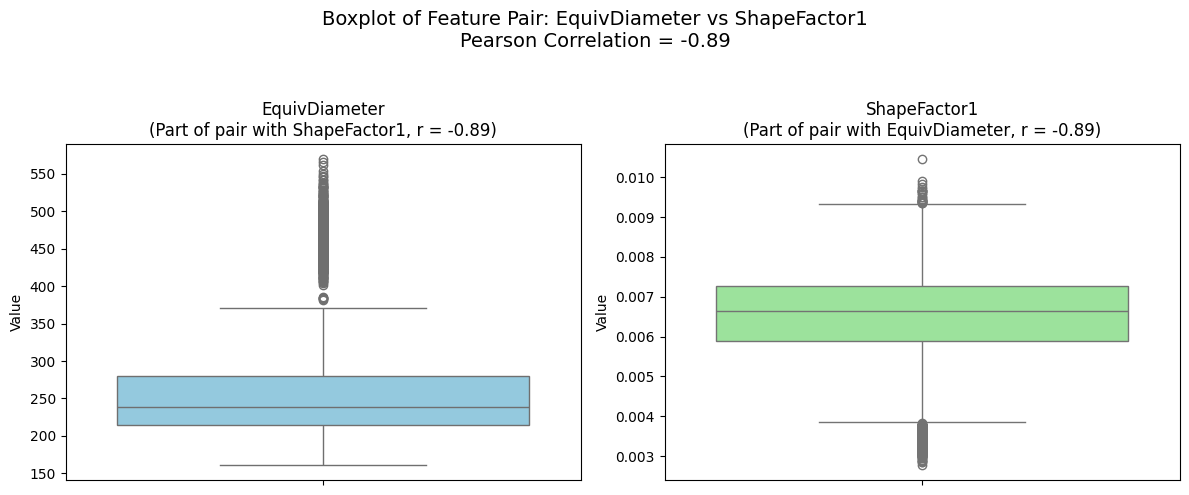

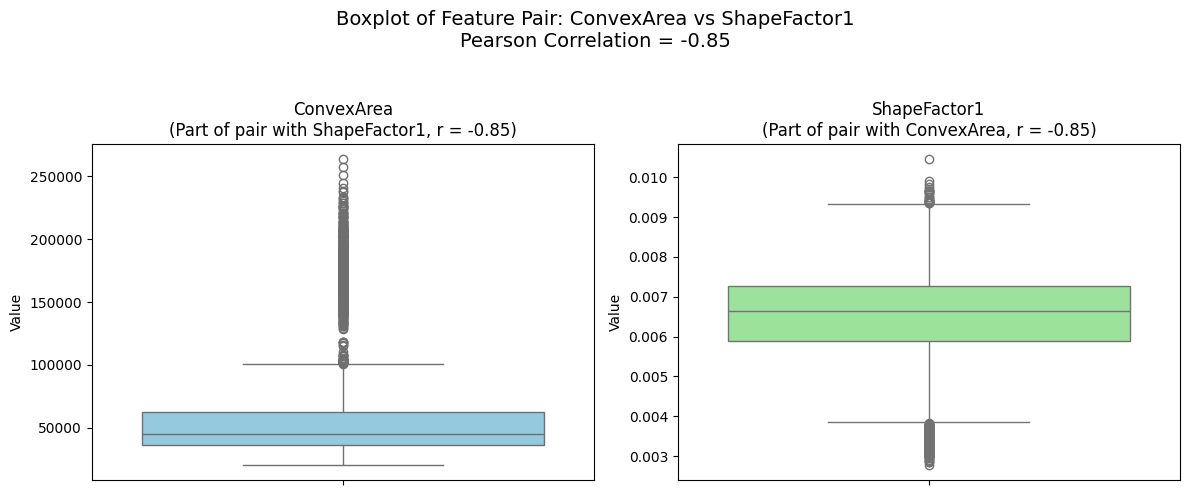

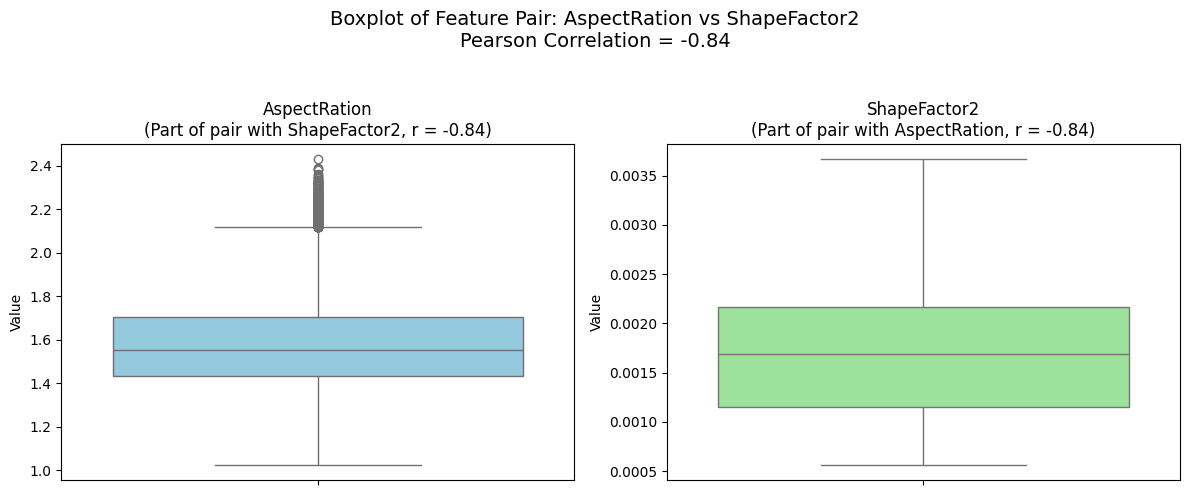

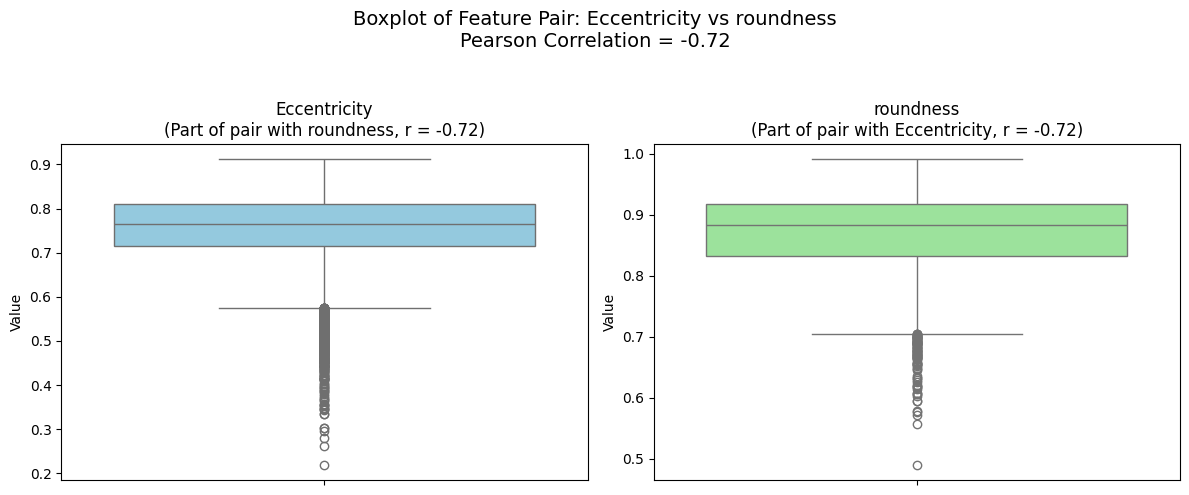

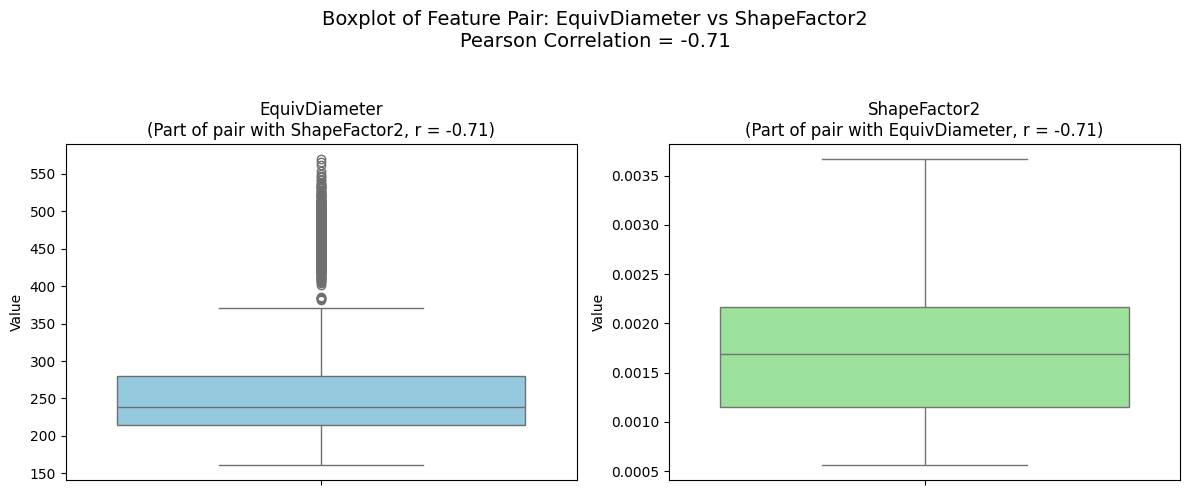

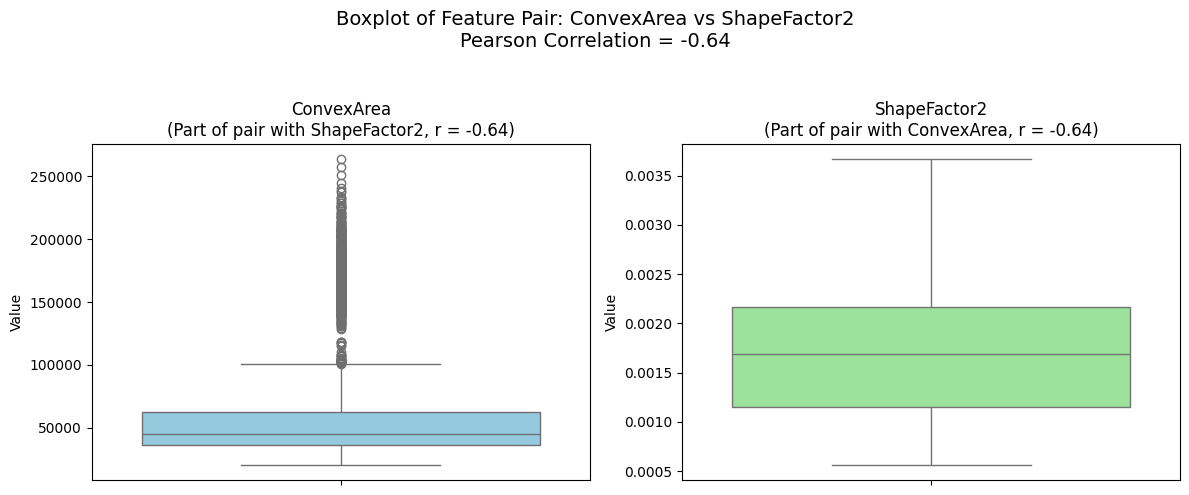

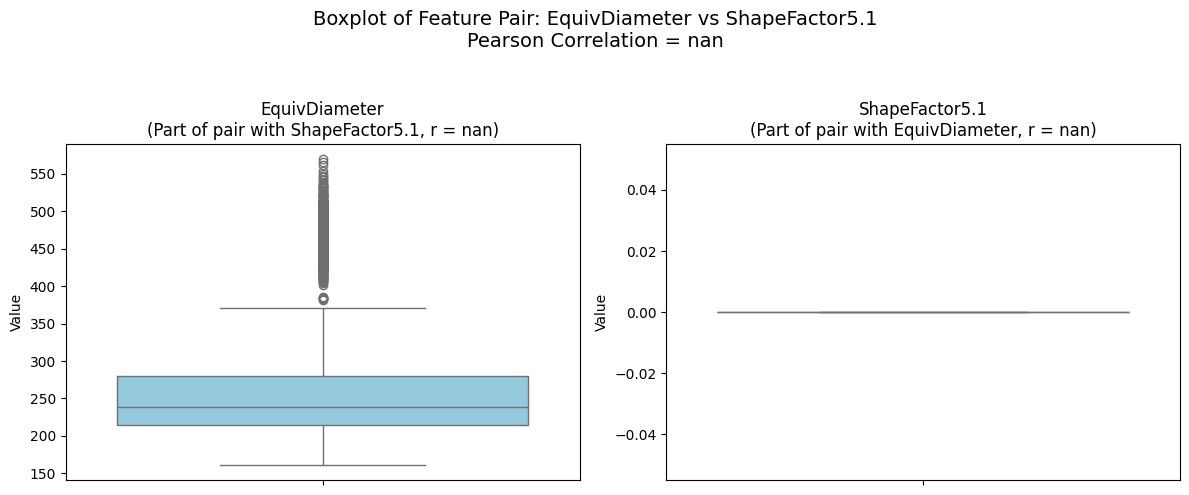

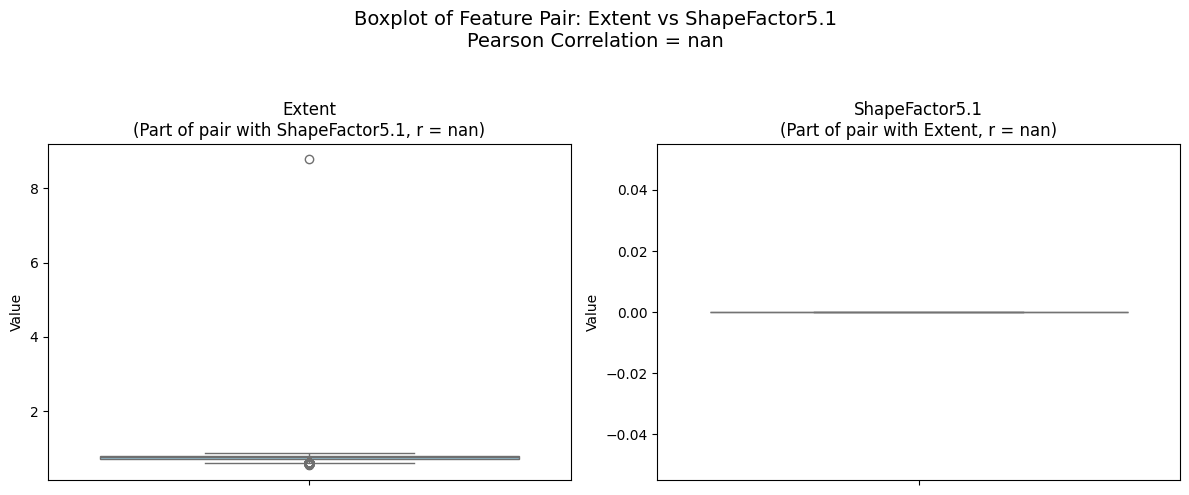

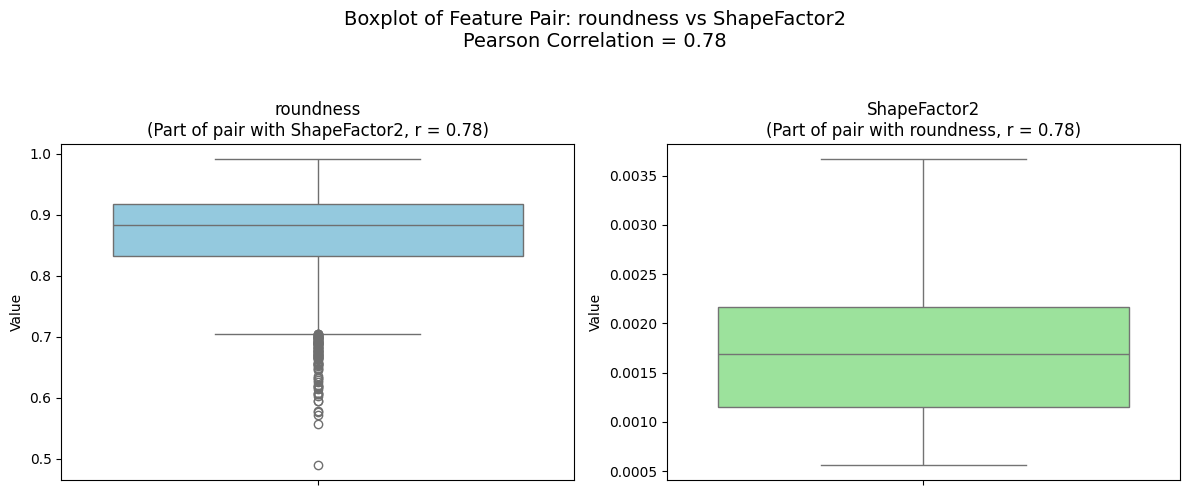

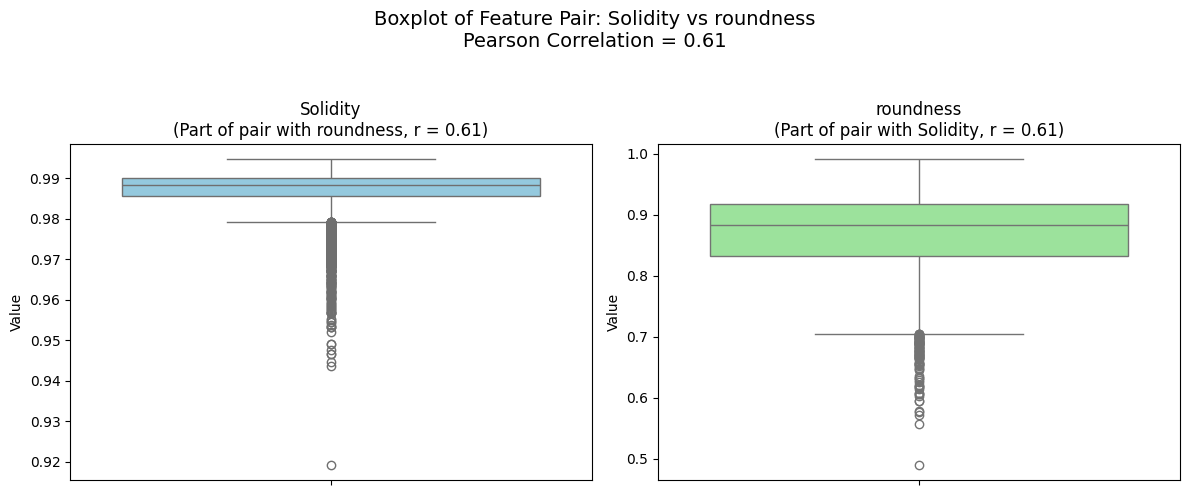

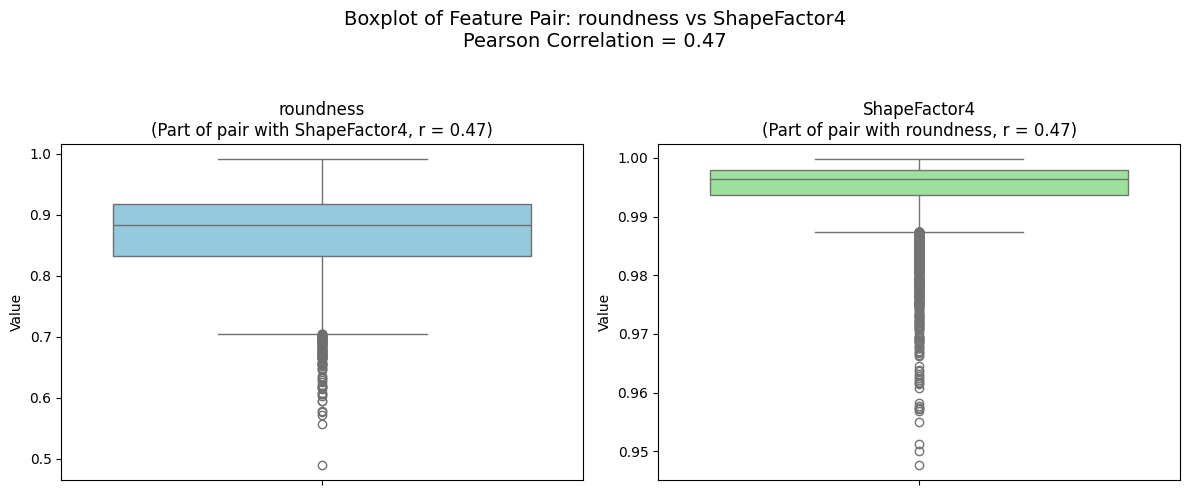

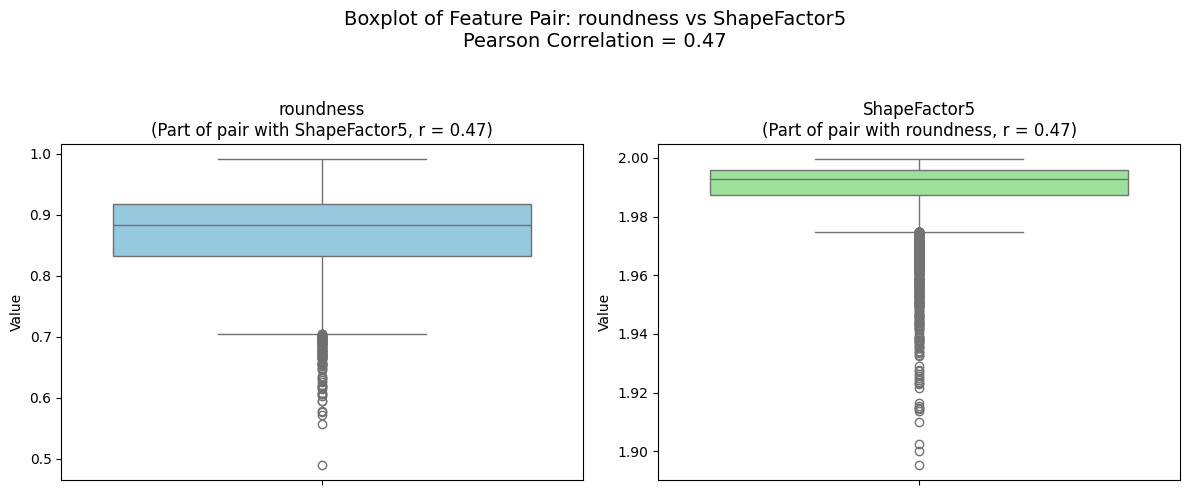

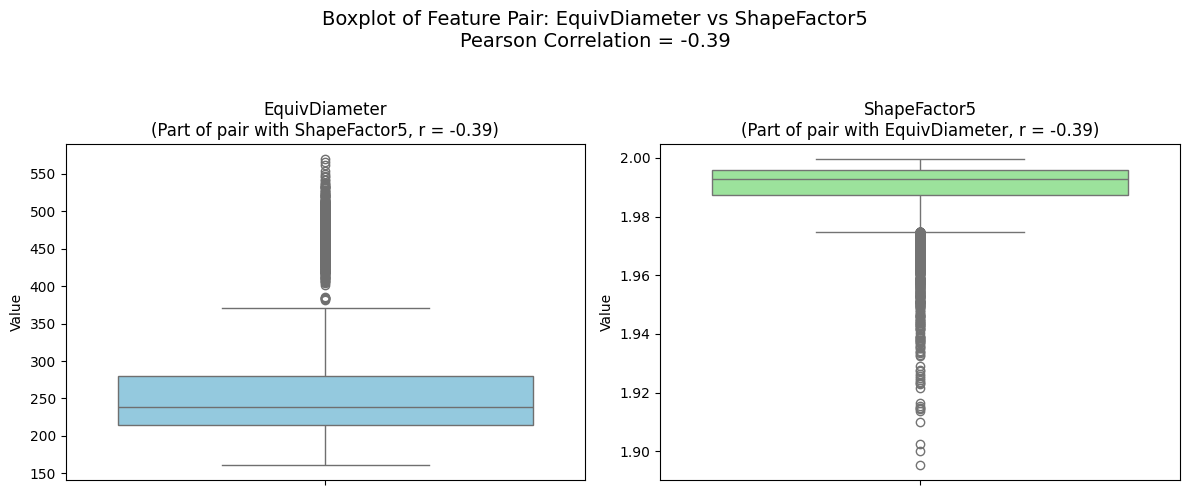

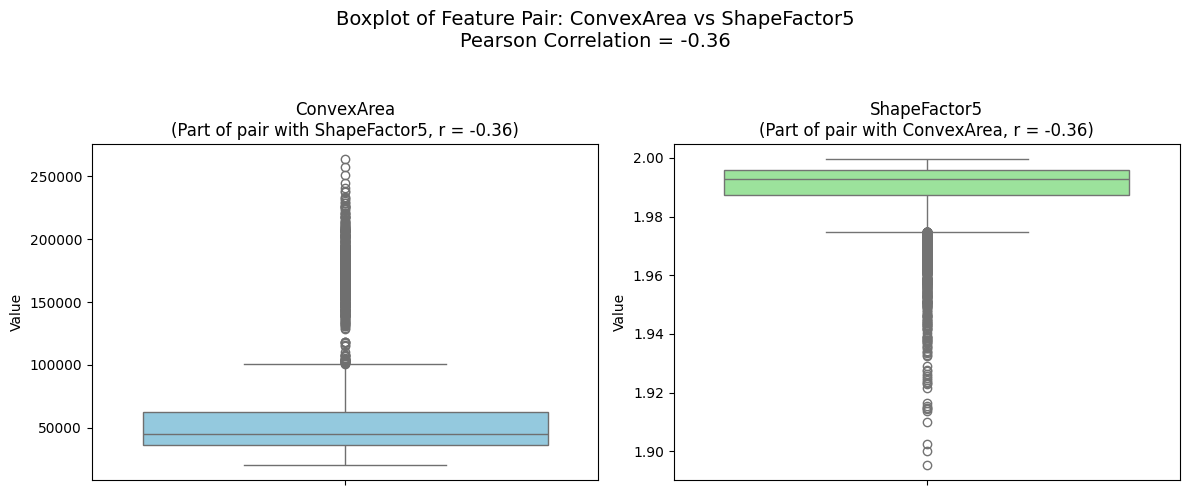

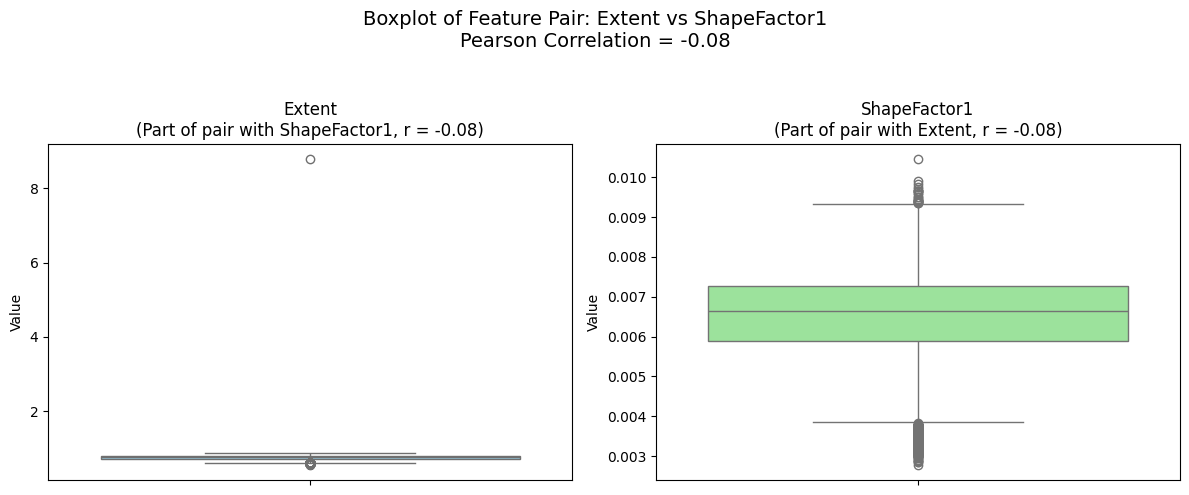

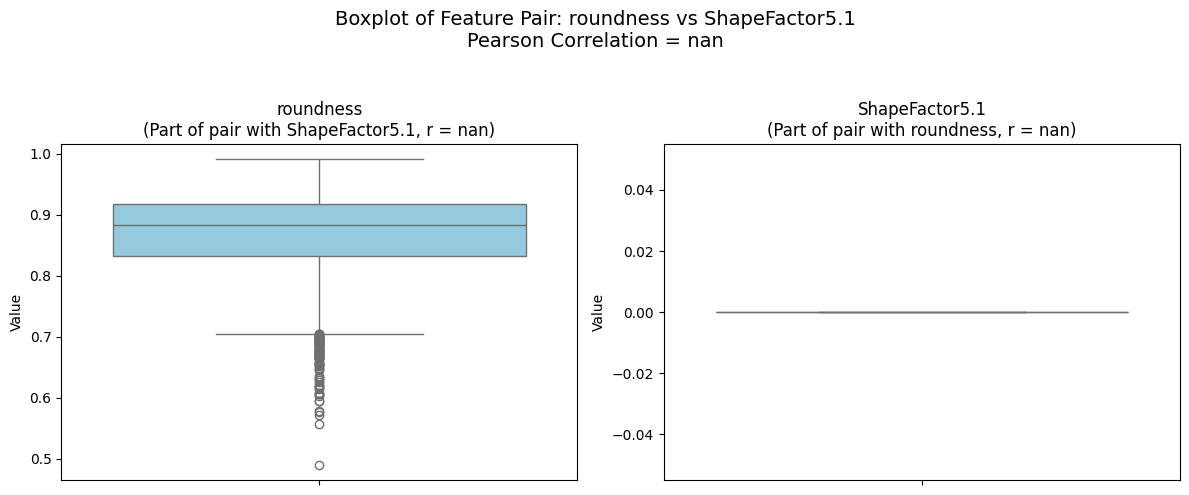

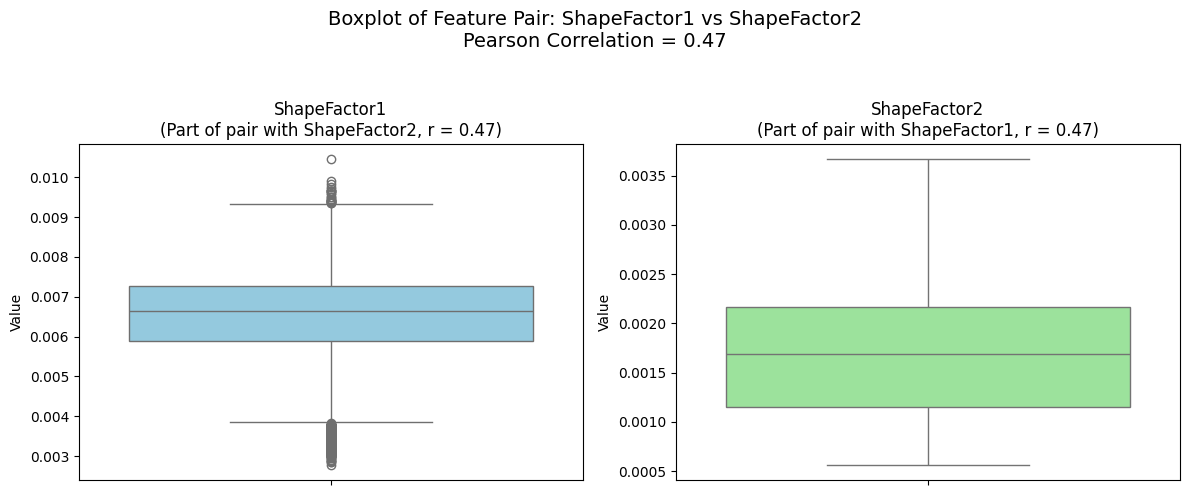

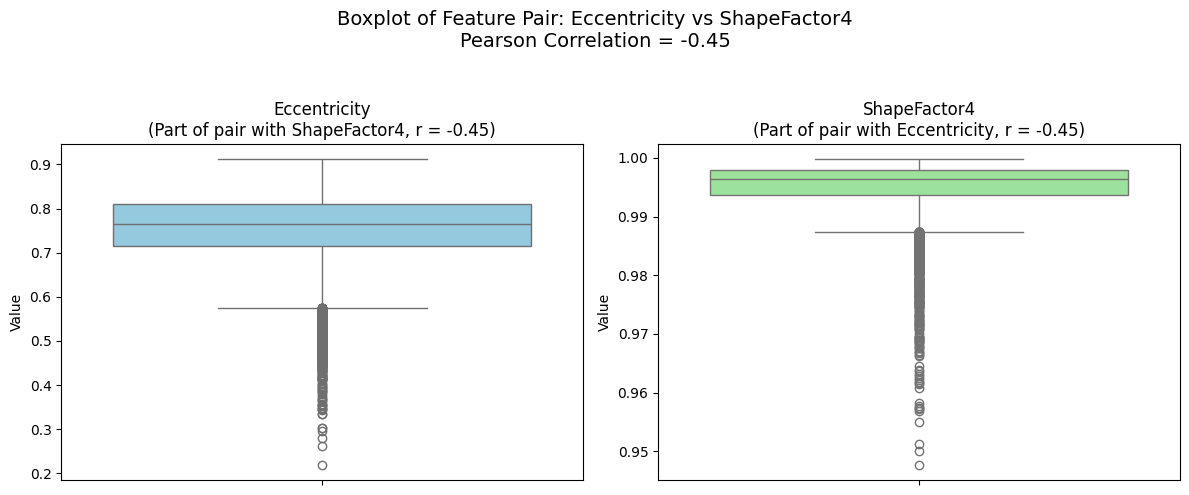

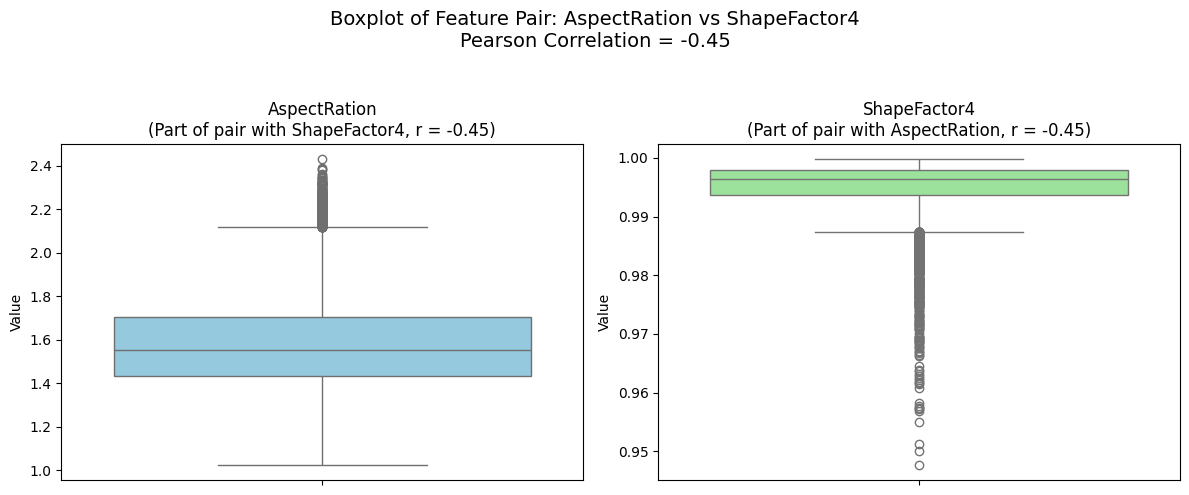

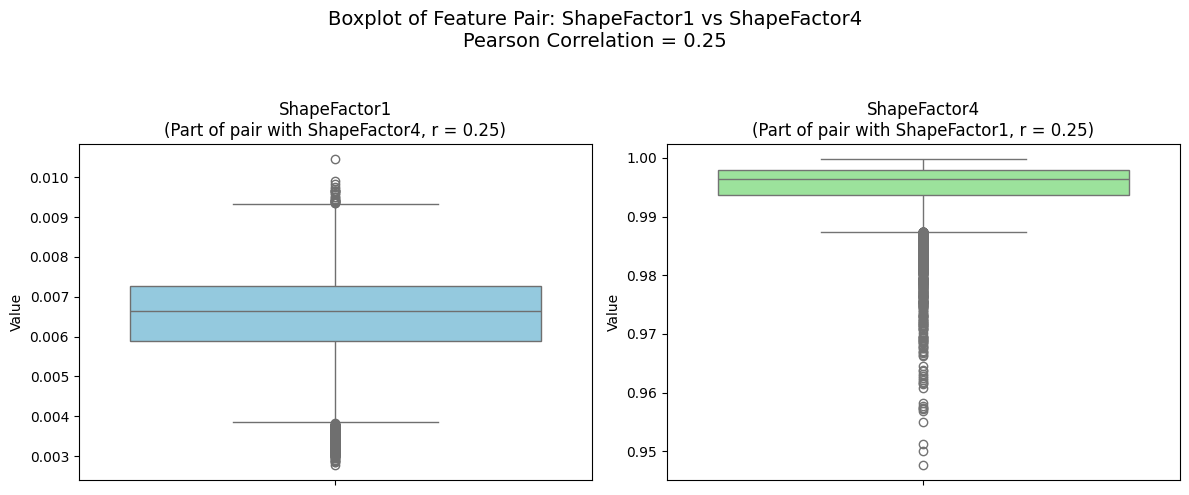

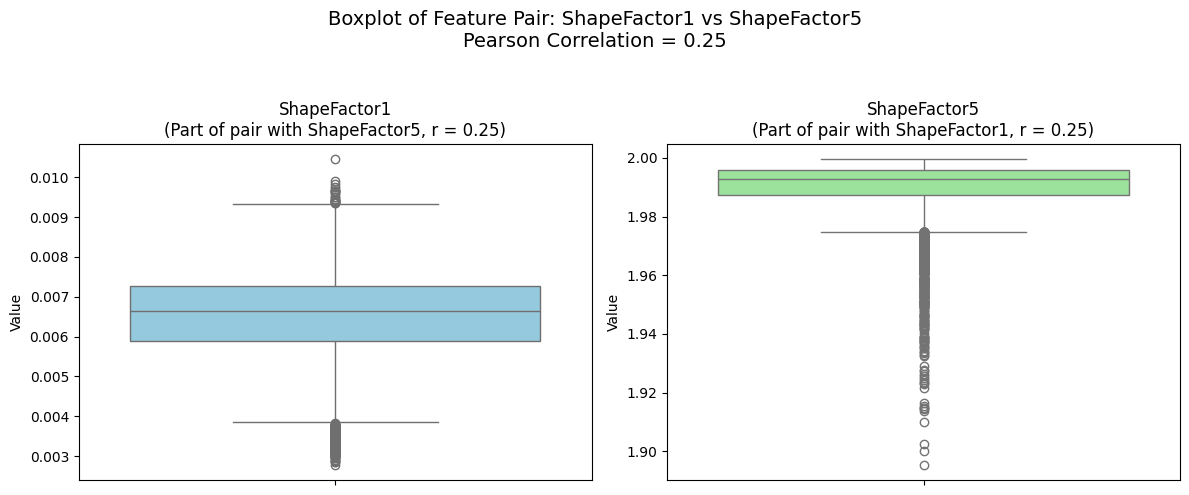

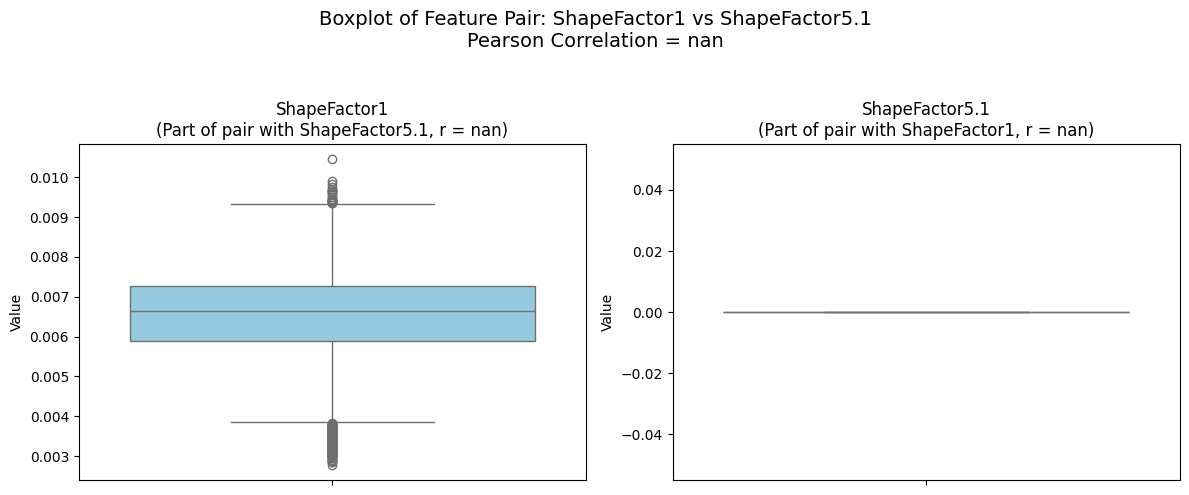

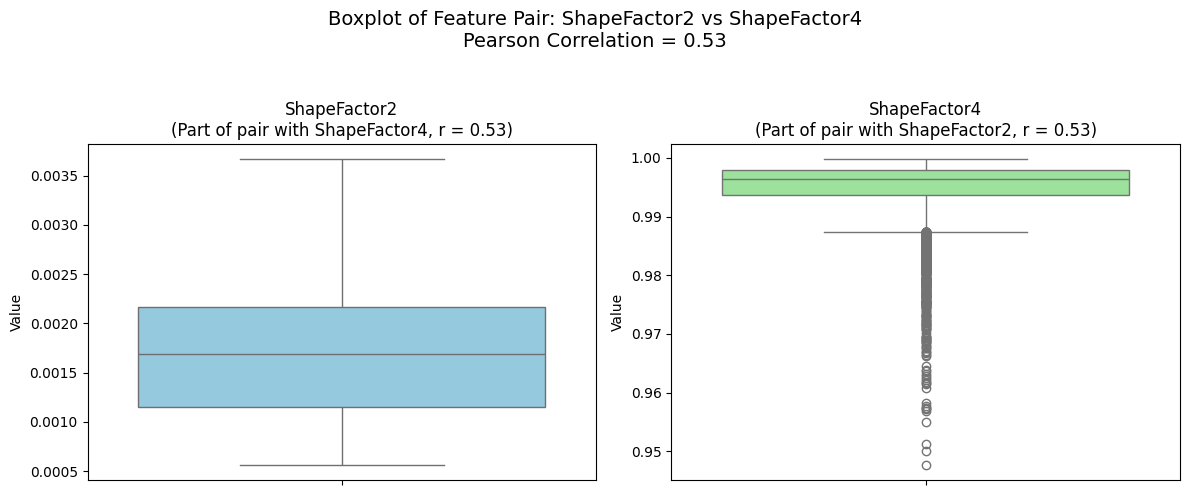

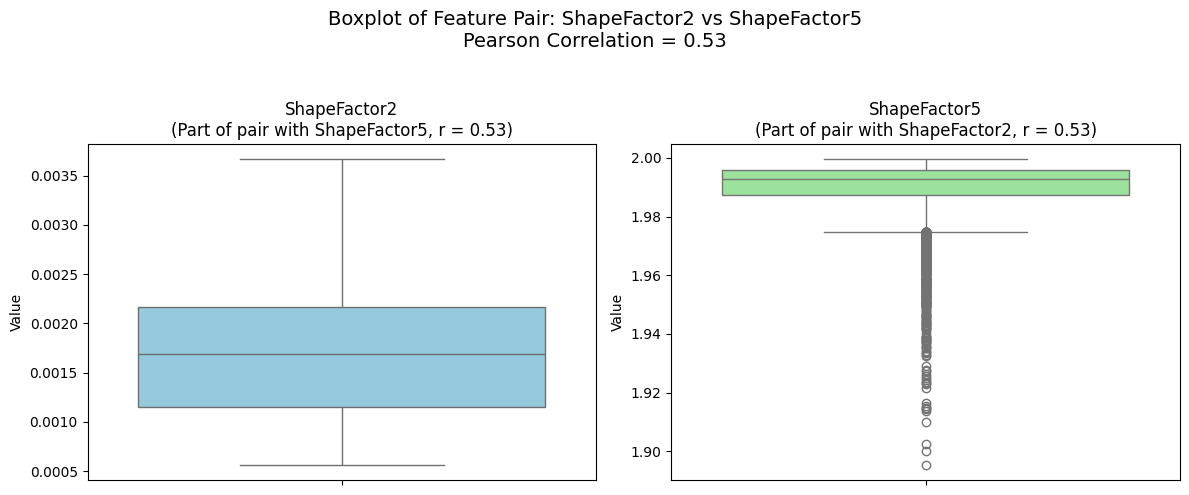

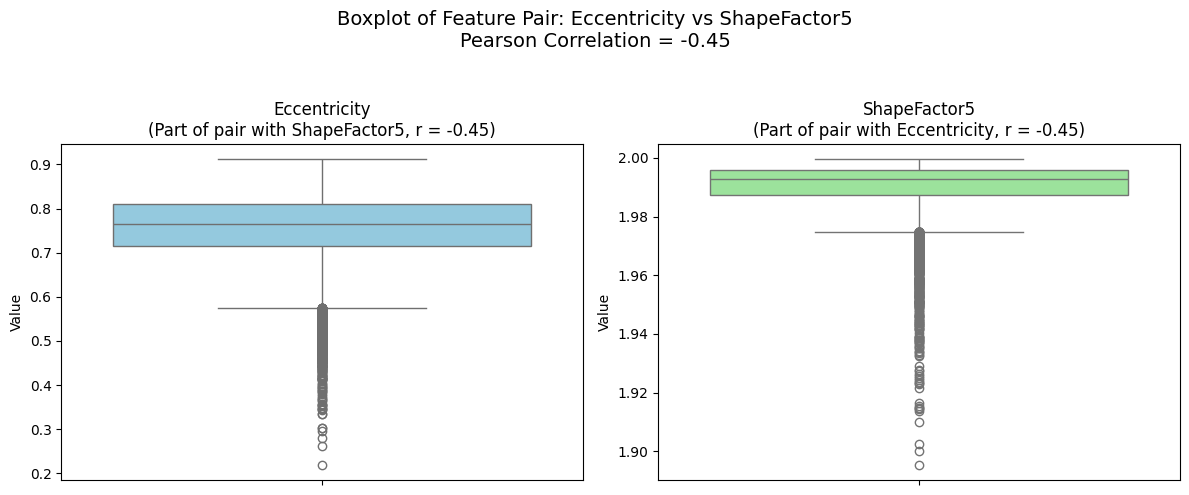

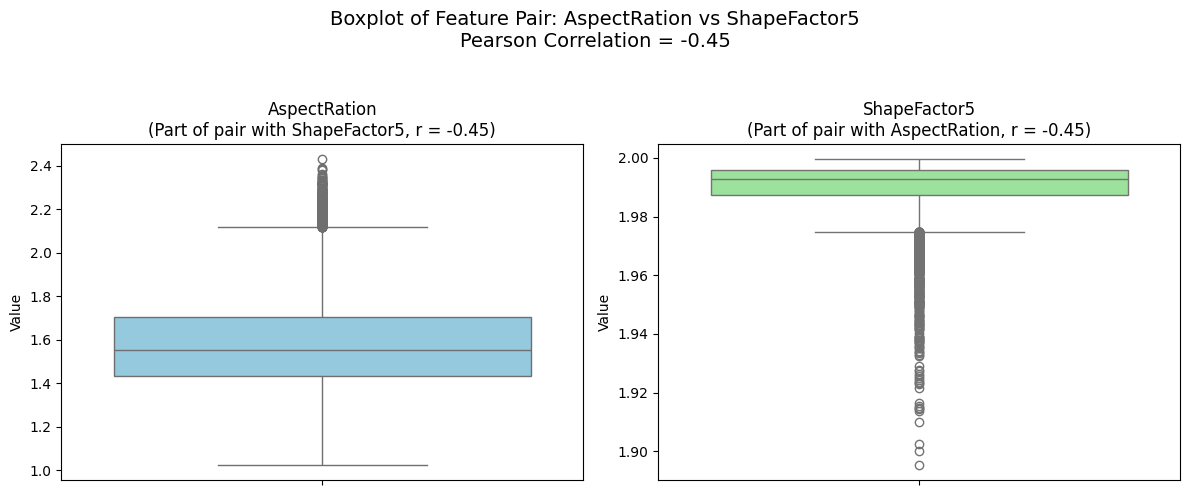

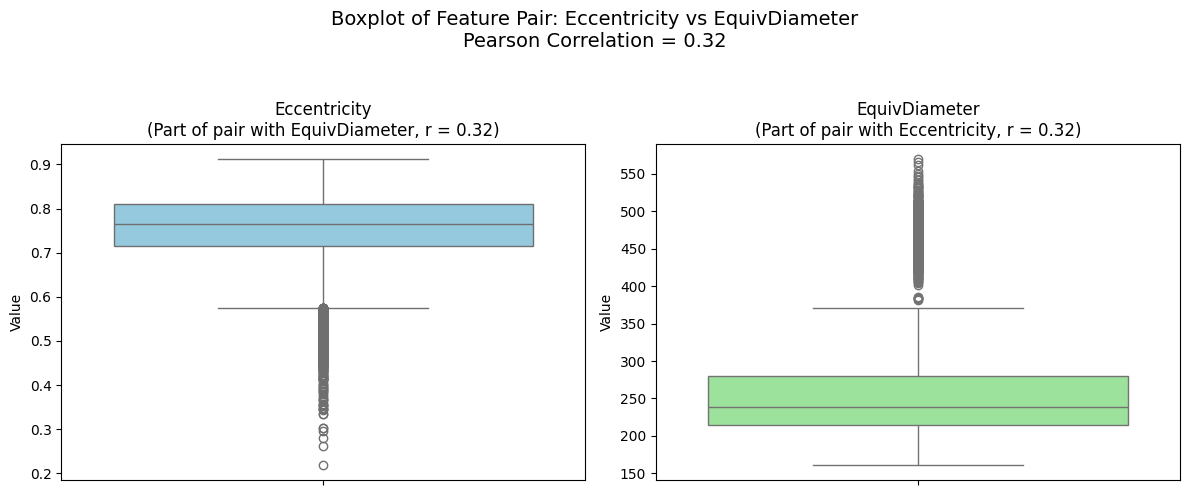

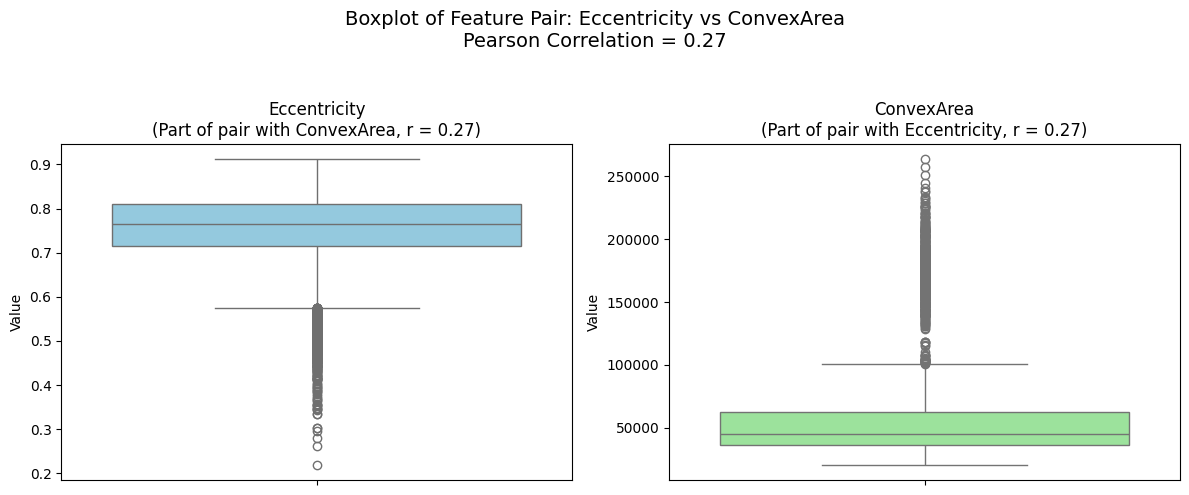

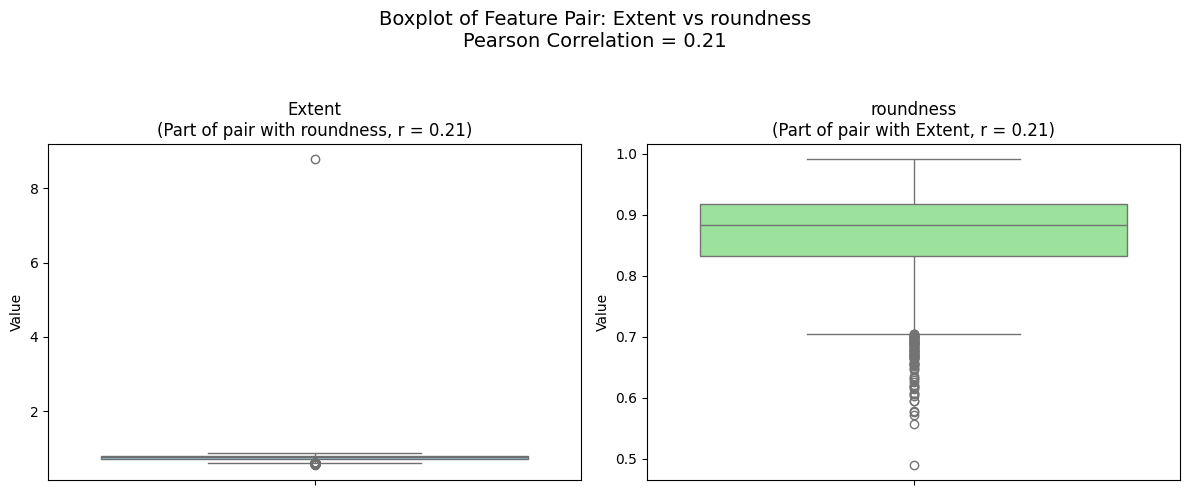

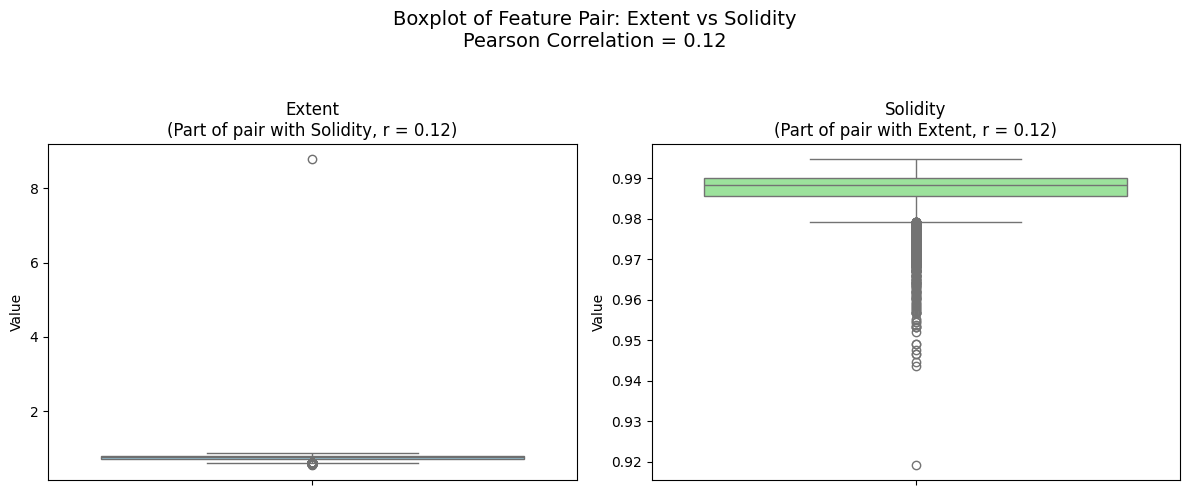

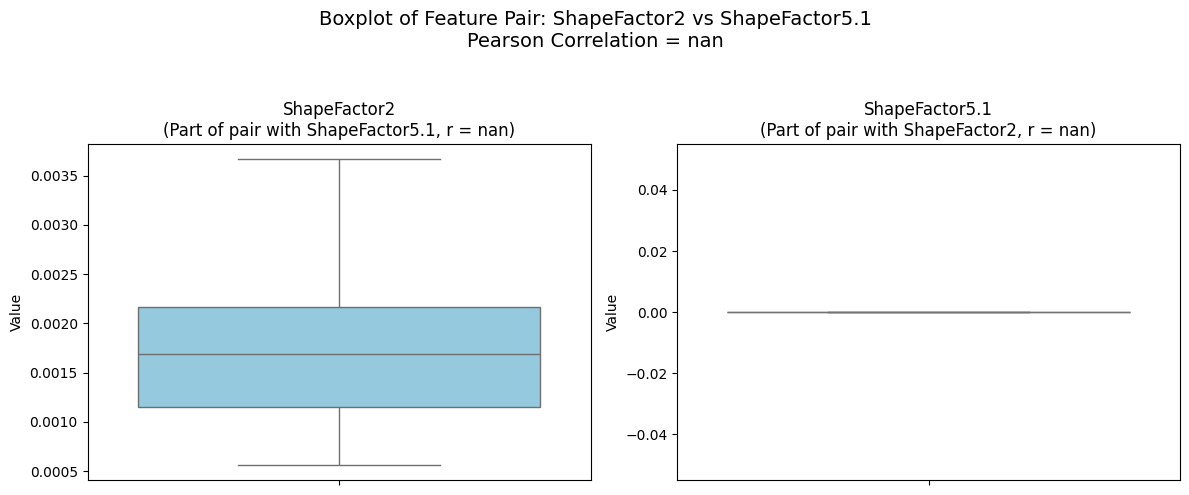

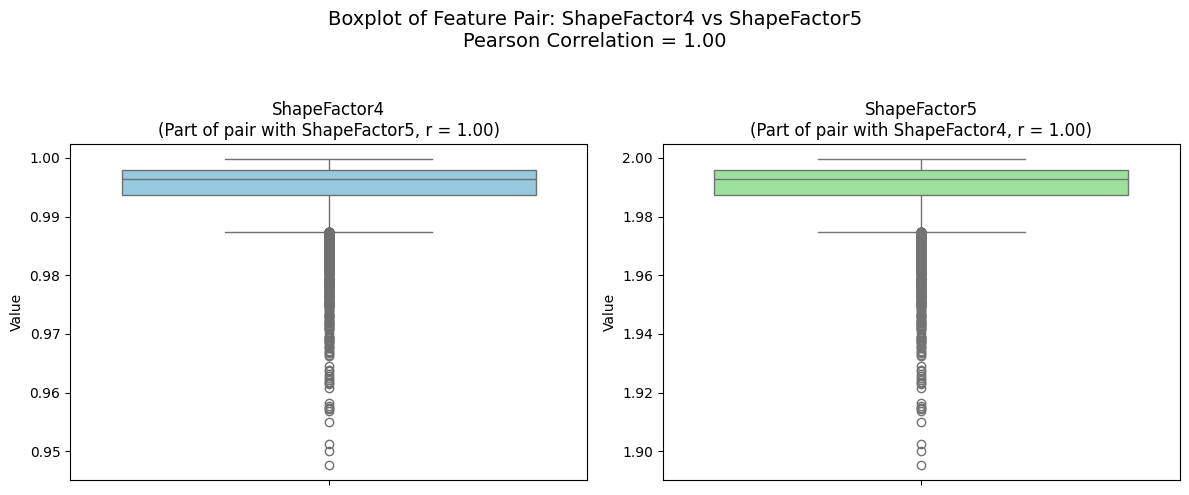

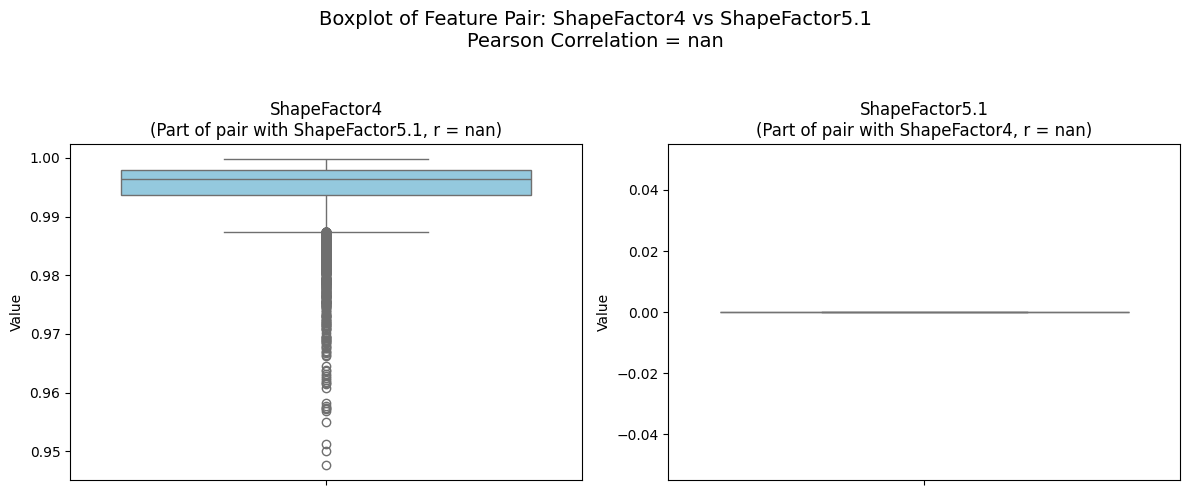

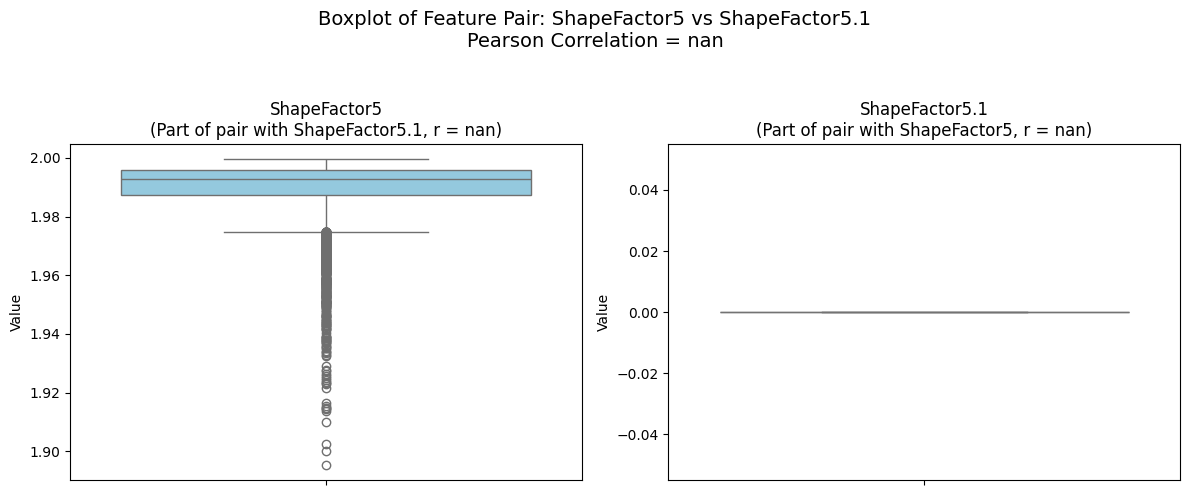

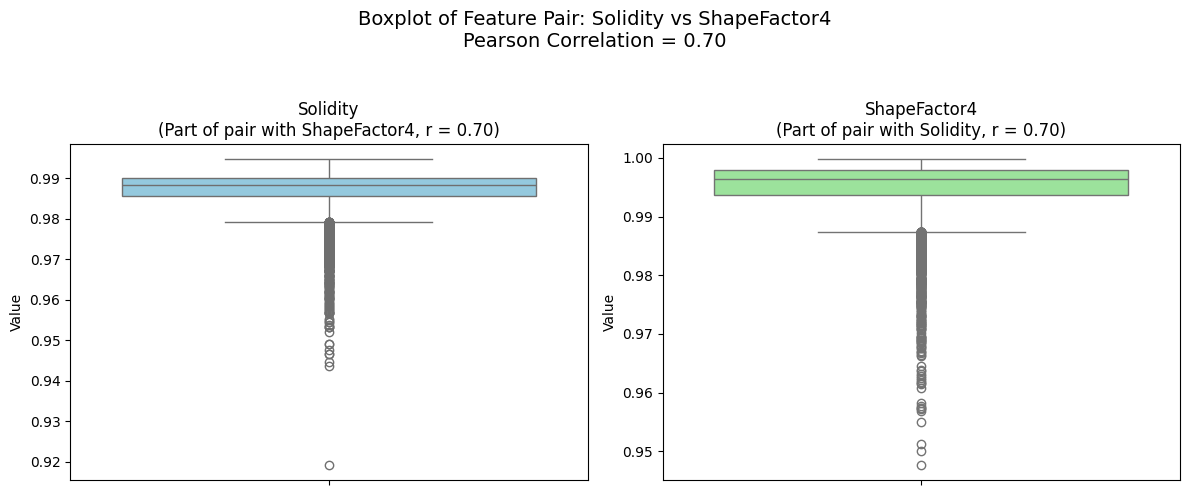

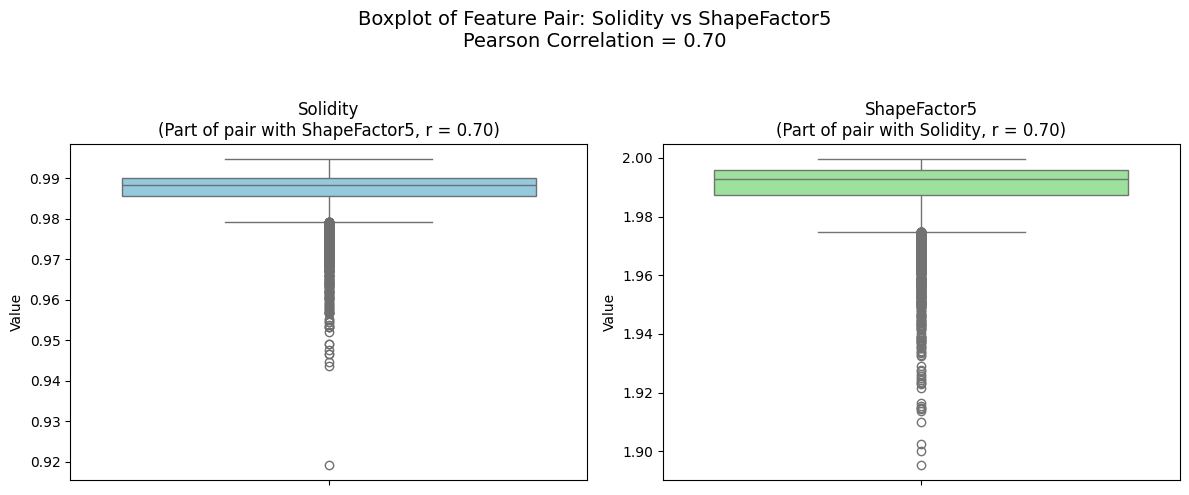

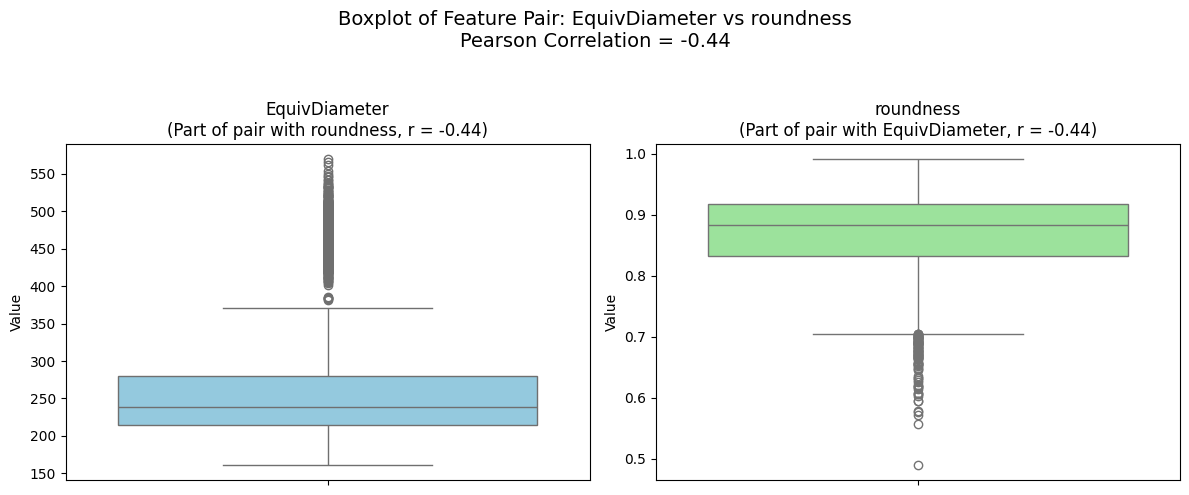

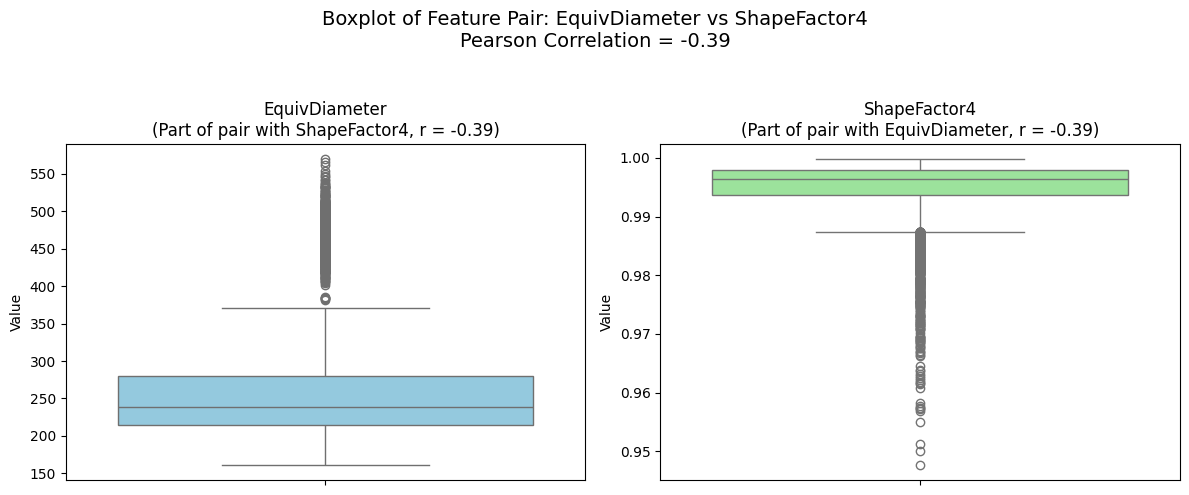

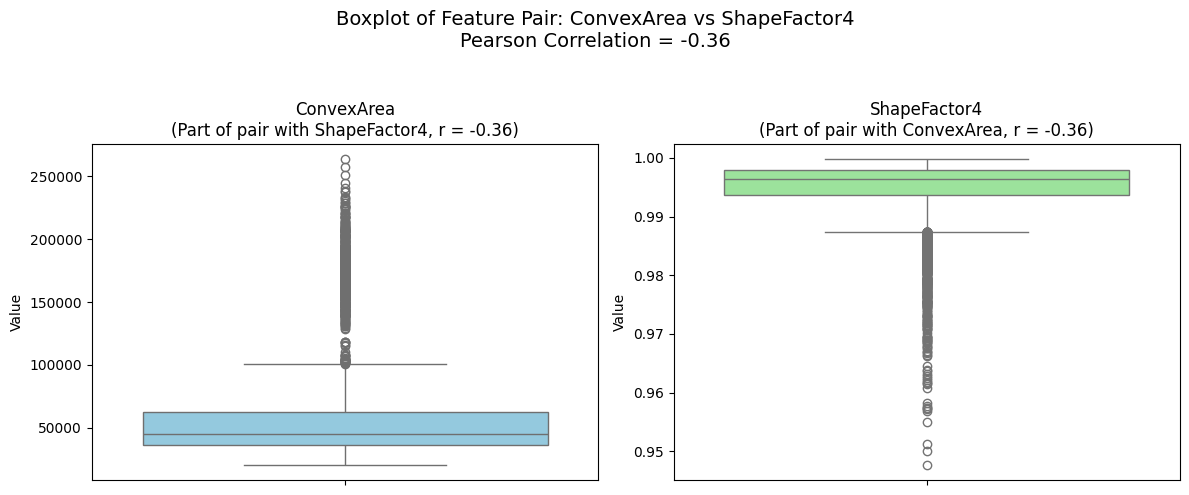

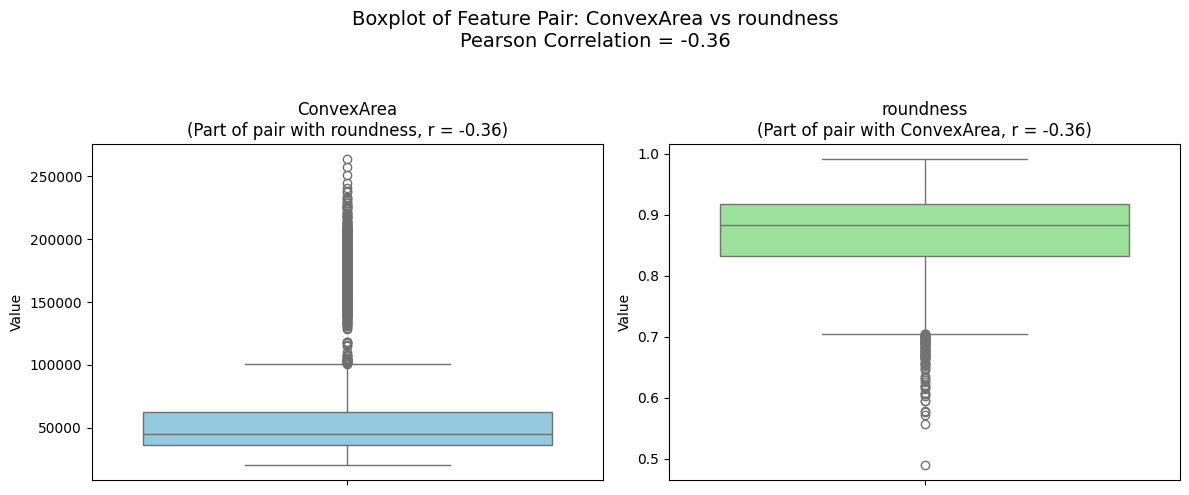

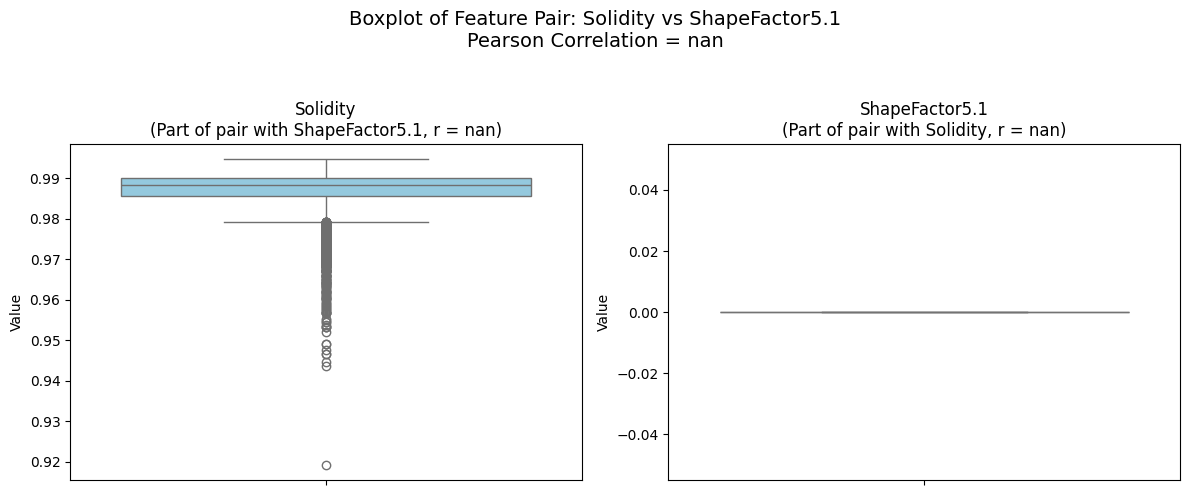

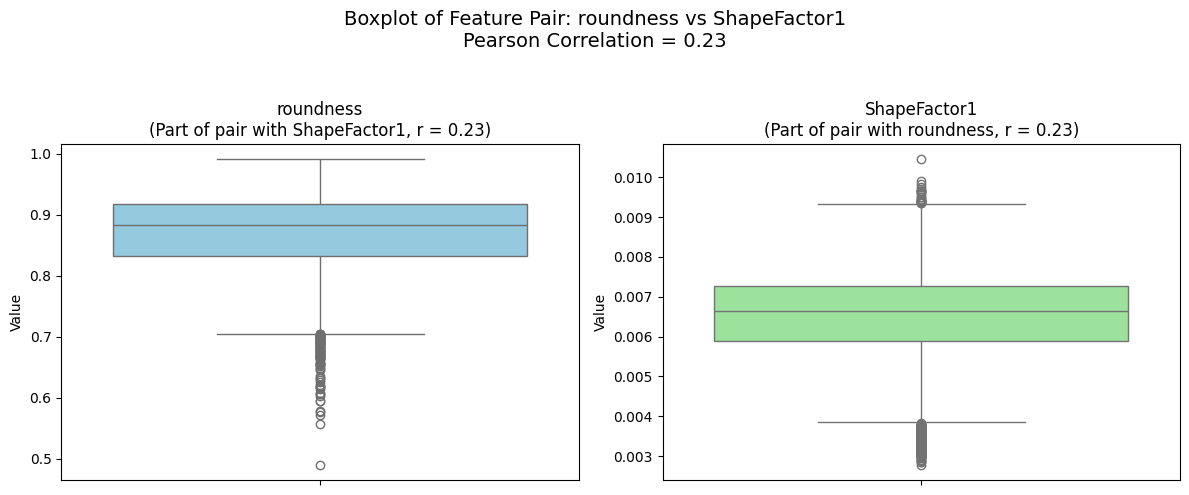

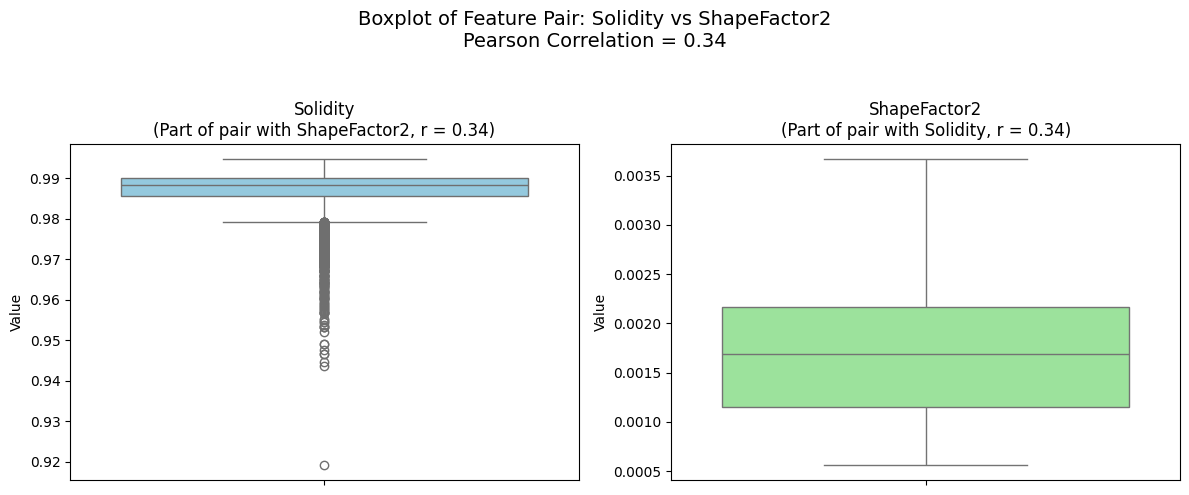

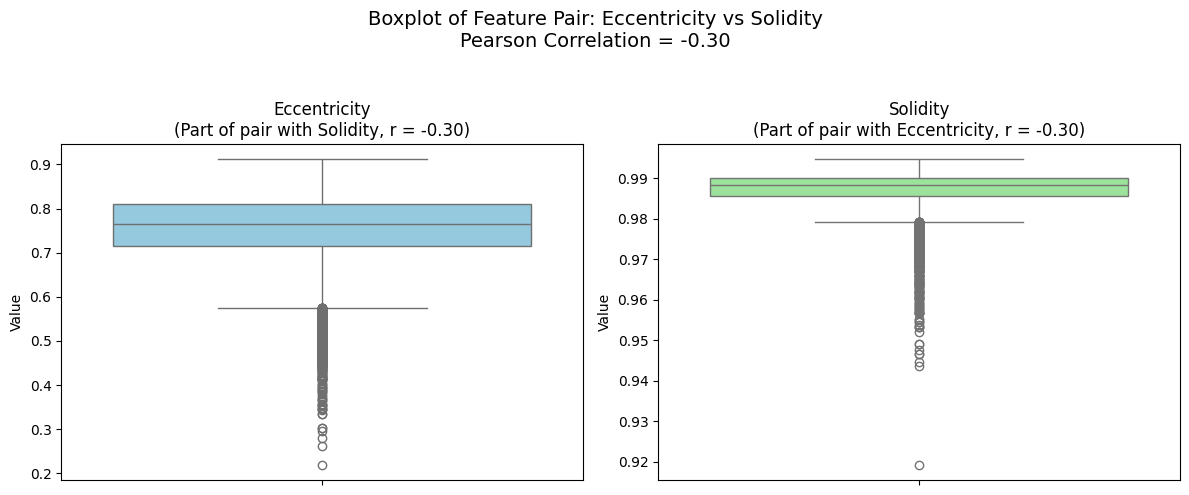

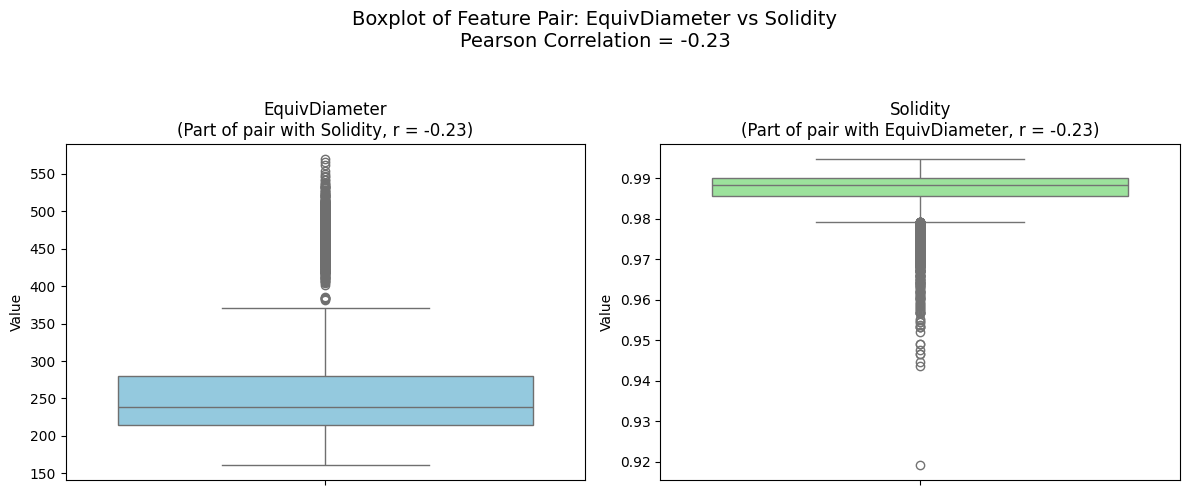

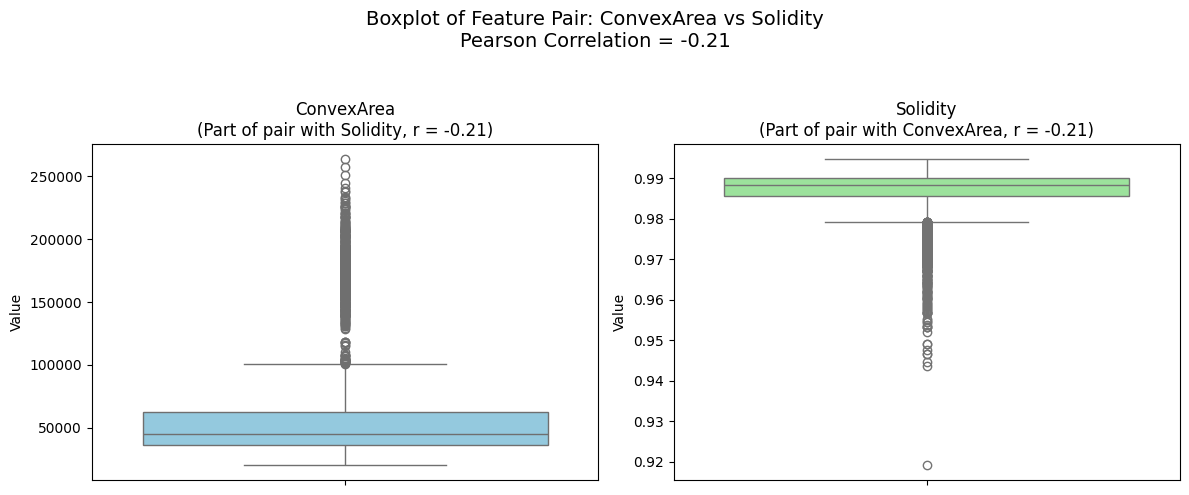

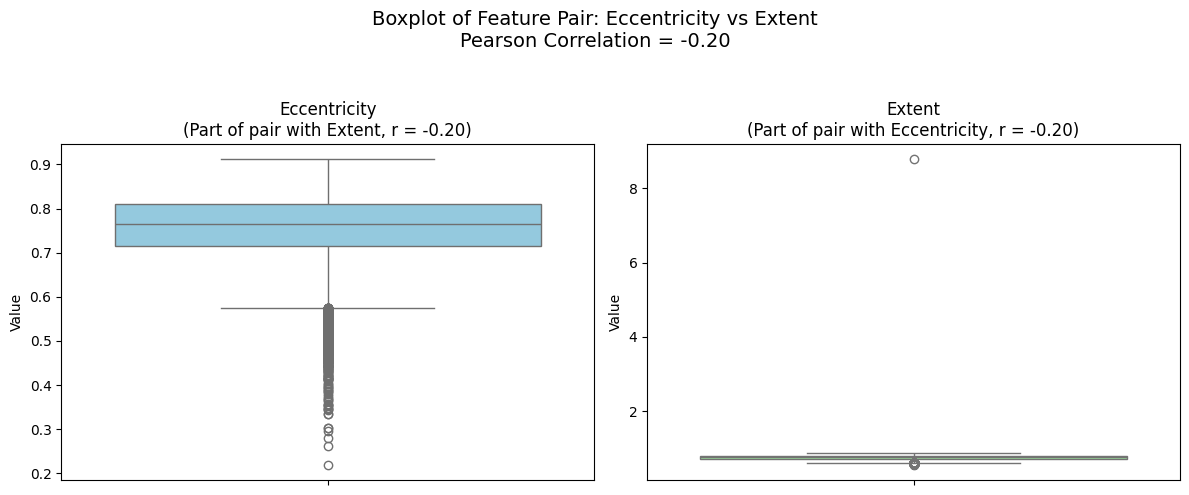

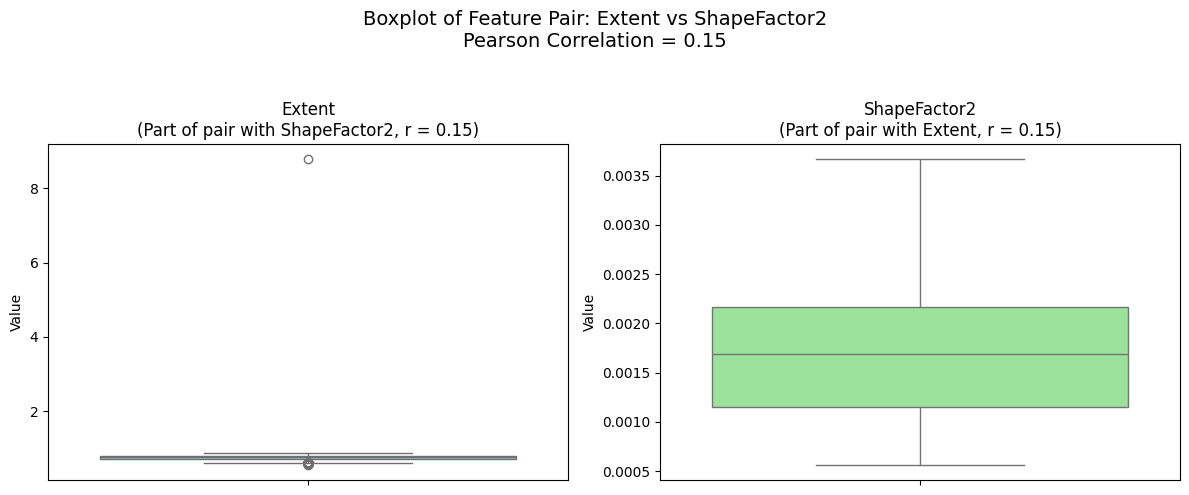

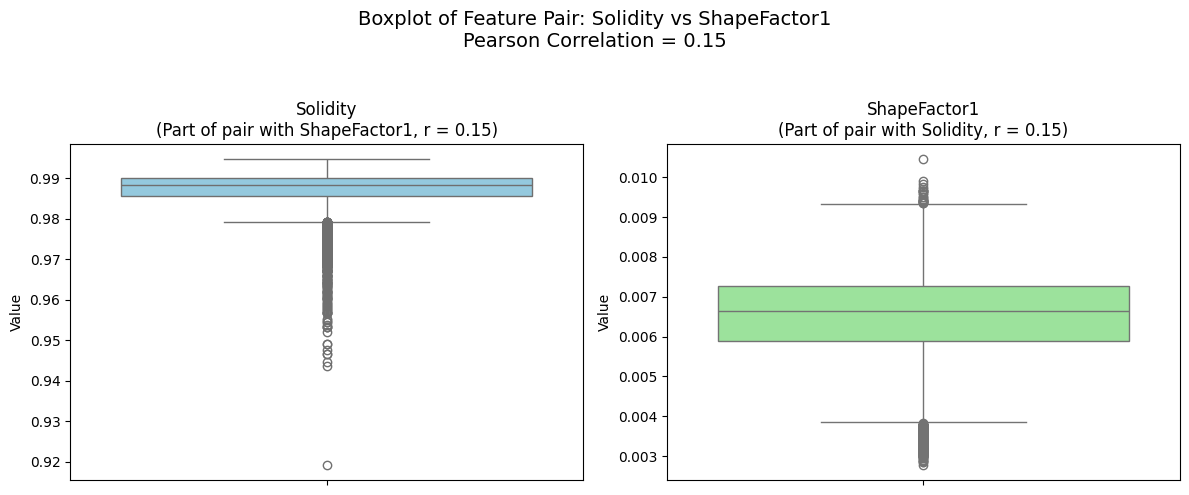

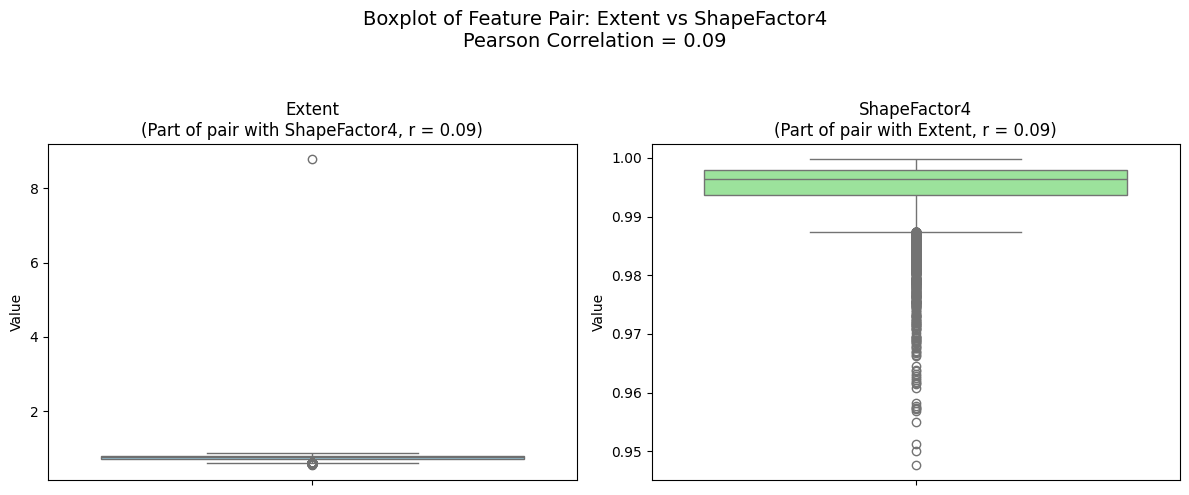

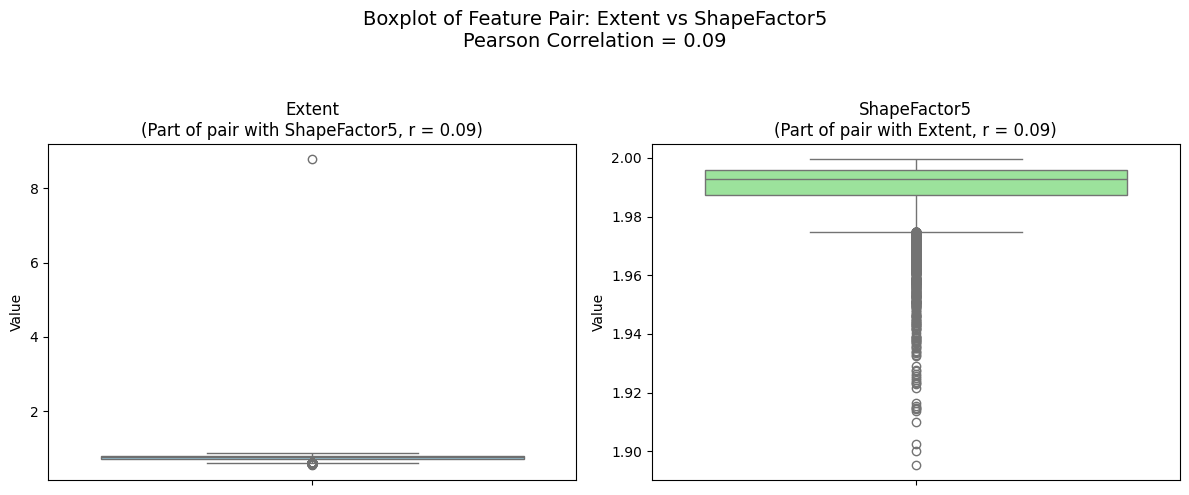

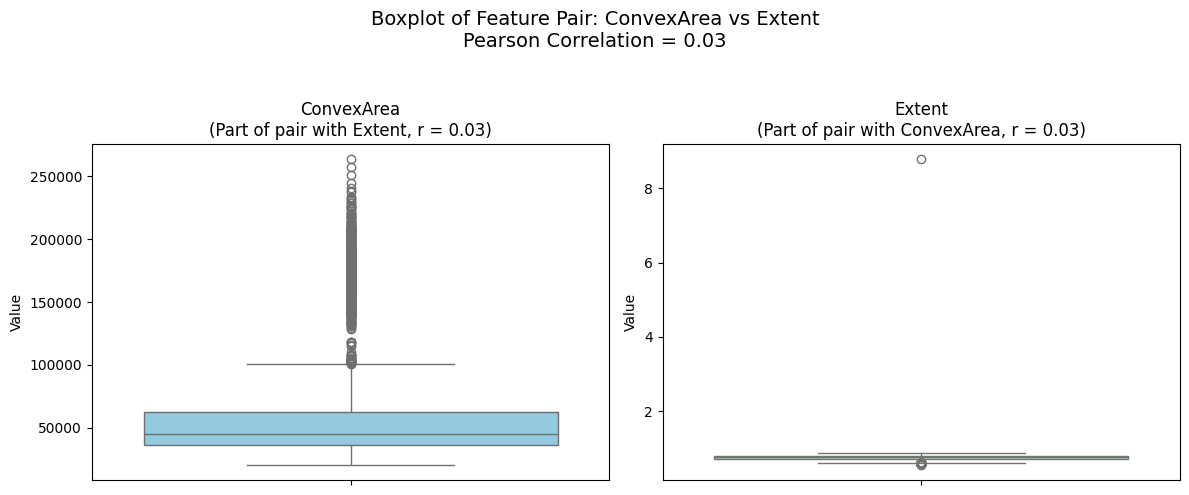

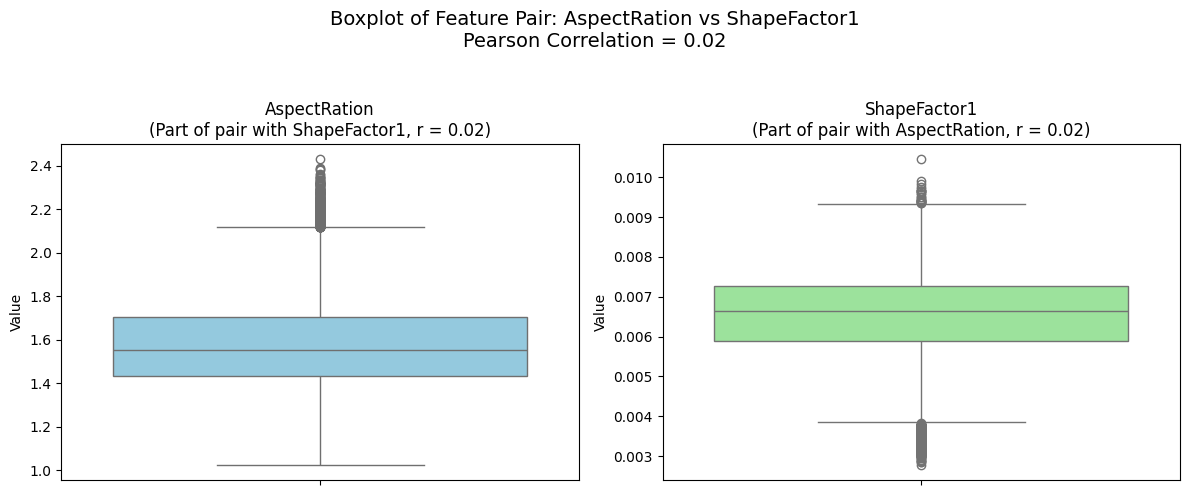

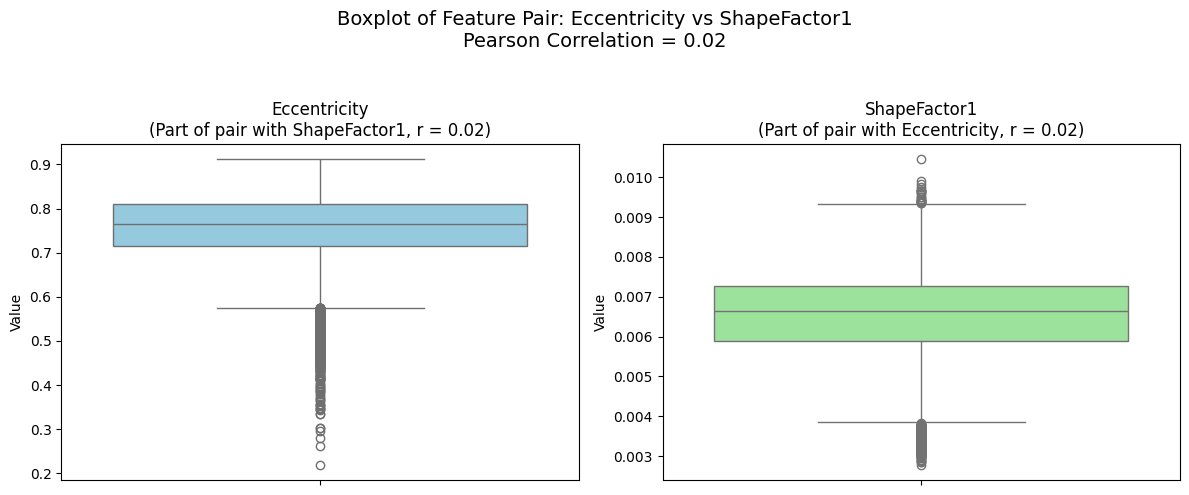

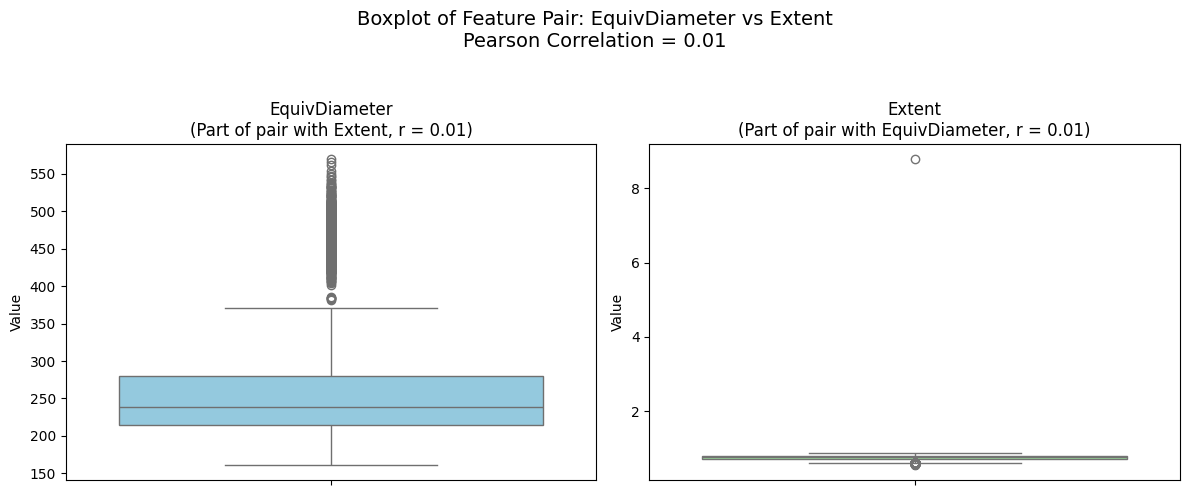

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

# Select only numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute Pearson correlation
corr_matrix = numeric_df.corr()

# Extract all unique feature pairs without duplication
feature_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        feat1 = corr_matrix.columns[i]
        feat2 = corr_matrix.columns[j]
        corr_val = corr_matrix.iloc[i, j]
        feature_pairs.append((feat1, feat2, corr_val))

# Sort pairs by highest to lowest correlation
feature_pairs = sorted(feature_pairs, key=lambda x: abs(x[2]), reverse=True)

# Display boxplot for each feature in the pair
for feat1, feat2, corr_val in feature_pairs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=numeric_df[feat1], ax=axes[0], color='skyblue')
    axes[0].set_title(f'{feat1}\n(Part of pair with {feat2}, r = {corr_val:.2f})')
    axes[0].set_ylabel('Value')
    axes[0].set_xlabel('')

    sns.boxplot(y=numeric_df[feat2], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{feat2}\n(Part of pair with {feat1}, r = {corr_val:.2f})')
    axes[1].set_ylabel('Value')
    axes[1].set_xlabel('')

    plt.suptitle(f'Boxplot of Feature Pair: {feat1} vs {feat2}\nPearson Correlation = {corr_val:.2f}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.94])
    plt.show()

Kiểm tra phân bố dữ liệu giữa các lớp


C:\Users\Nguyen Thi Tra My\AppData\Local\Temp\ipykernel_15080\694476040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Class'], palette="coolwarm")


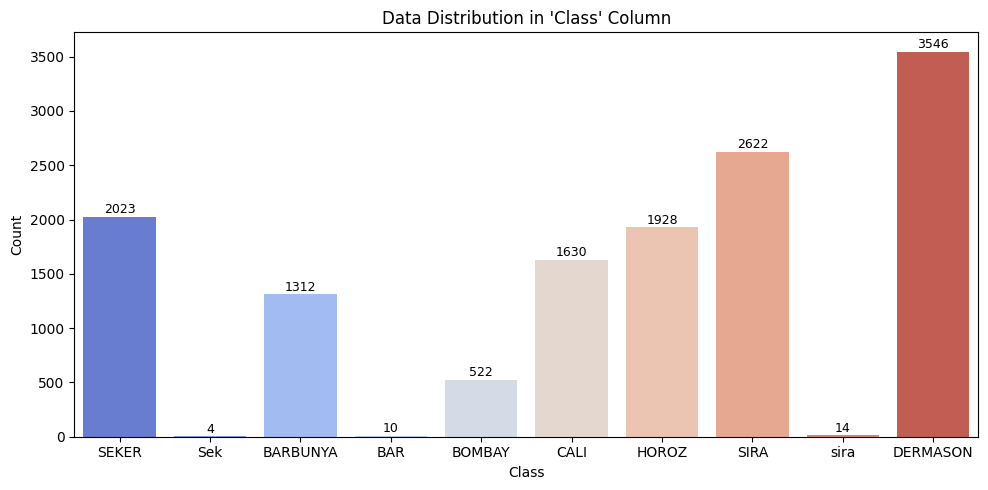

In [27]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df['Class'], palette="coolwarm")
plt.title("Data Distribution in 'Class' Column")
plt.xlabel("Class")
plt.ylabel("Count")

# Add value labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 5, int(height), 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [28]:
# Statistics: mean, median, standard deviation
stats_summary = df_unique[numeric_features].agg(['mean', 'median', 'std']).T
print("\nSummary Statistics for Each Feature:")
print(stats_summary)


Summary Statistics for Each Feature:
                         mean        median           std
Area             53048.284549  44652.000000  29324.095717
Perimeter          855.283459    794.941000    214.289696
MajorAxisLength    320.141867    296.883367     85.694186
MinorAxisLength    202.270714    192.431733     44.970091
AspectRation         1.583242      1.551124      0.246678
Eccentricity         0.750895      0.764441      0.092002
ConvexArea       53768.200206  45178.000000  29774.915817
EquivDiameter      253.064220    238.438026     59.177120
Extent               0.750318      0.759853      0.084552
Solidity             0.987142      0.988283      0.004660
roundness            0.873267      0.883137      0.059511
ShapeFactor1         0.006564      0.006646      0.001128
ShapeFactor2         0.001716      0.001694      0.000596
ShapeFactor4         0.995063      0.996386      0.004366
ShapeFactor5         1.990127      1.992772      0.008733
ShapeFactor5.1       0.000000     

In [29]:
missing_values = df.isnull().sum()
missing_values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             1
Solidity           1
roundness          4
Compactness        2
ShapeFactor1       2
ShapeFactor2       3
ShapeFactor3       1
ShapeFactor4       0
ShapeFactor5       0
Class              0
ShapeFactor5.1     0
Name               0
dtype: int64